# import and load data

/c/Users/junec/AppData/Local/Programs/Python/Python38/python
load & denoise real field data===========================
---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(ground_truth_denoised) 60
after remove uncorrect ground truth
len(ground_truth_denoised) 54


Elapsed time(hr)  Pressure(psia)  first_order_derivative  \
count      29813.000000    29813.000000            29813.000000   
mean        1949.504754     5858.252763               30.980488   
std         1071.285888     1201.608375              217.076860   
min            0.000000     2989.186167            -1177.363679   
25%         1223.614626     4920.227064              -26.315082   
50%         2055.749995     5958.685278                6.577672   
75%         2691.845828     6884.300893               50.575874   
max         4070.949737     7942.372157             1442.449150   

       second_order_derivative  
count             29813.000000  
mean              -3316.399705  
std               26067.263416  
min             -267661.267543  
25%                -150.940811  
50%                   0.048895  
75%                 129.782625  
max              199644.890976

Elapsed time(hr)  Liquid rate(STB/D)
count      10191.000000        10191.000000
mean        2210.383315       -16880.702745
std         1121.860526         4591.205914
min            0.433384       -22568.277381
25%         1345.039547       -19746.868884
50%         2248.487512       -18758.998204
75%         3074.228818       -15911.221687
max         4075.570423            1.166046

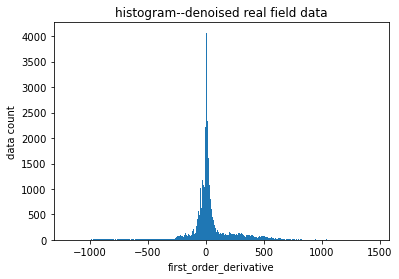

In [1]:
%run imports_N_loadDenoised.ipynb

# coarse filter

In [2]:
%run coarse_filter.ipynb

fliter derivatives which are larger than 6.577671754538749, smaller than -99.97038962759567
the length of filtered points: 17888


# detect all break points candidates

In [3]:
method="averageDerivative_FFOD"

In [4]:
deltaDerivative_tuning=0.1
# points=[index for index in range(len(pressure_measure))]
point_halfWindow=15
time_halfWindow=None
# point_halfWindow=None
# time_halfWindow=0.3
detect_useDerivative=DerivativeMethod(pressure_df,colum_names)
buildup_DRI, drawdown_DRI=detect_useDerivative.detect_breakpoints_deltaAvgFOD(points,
                                                                    deltaDerivative_tuning,
                                                                   point_halfWindow,
                                                                   time_halfWindow)
len(buildup_DRI),len(drawdown_DRI)

(4620, 982)

In [5]:
points=[buildup_DRI,drawdown_DRI]
time_step=0.5
%run detect_FirstFOD.ipynb
%run detect_MaxFOD.ipynb

methods\derivative_method.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.pressure_df["abs(first_order_derivative)"]=self.first_order_derivative.abs()


'len(buildUp_df): 4620,len(buildUp_first_FOD): 755'
'len(drawDown_df): 982,len(drawDown_first_FOD): 96'
===============output==================
First_FOD


methods\derivative_method.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.pressure_df["abs(first_order_derivative)"]=self.first_order_derivative.abs()


'len(buildUp_df): 4620,len(buildUp_max_FOD): 755'
'len(drawDown_df): 982,len(drawDown_max_FOD): 96'
===============output==================
Max_FOD


# spilit periods and find multi-rate break points

In [6]:
%run store_transients.ipynb

====detected_shutIns 36
====filtered_shutIns 31
====len(flowingPeriods) 32
====finally detect buildUp:171,drawDown:31


# plot flowing & shut-in periods

'buildup:31, drawdown:31'
---initializing...
---plotting...


findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


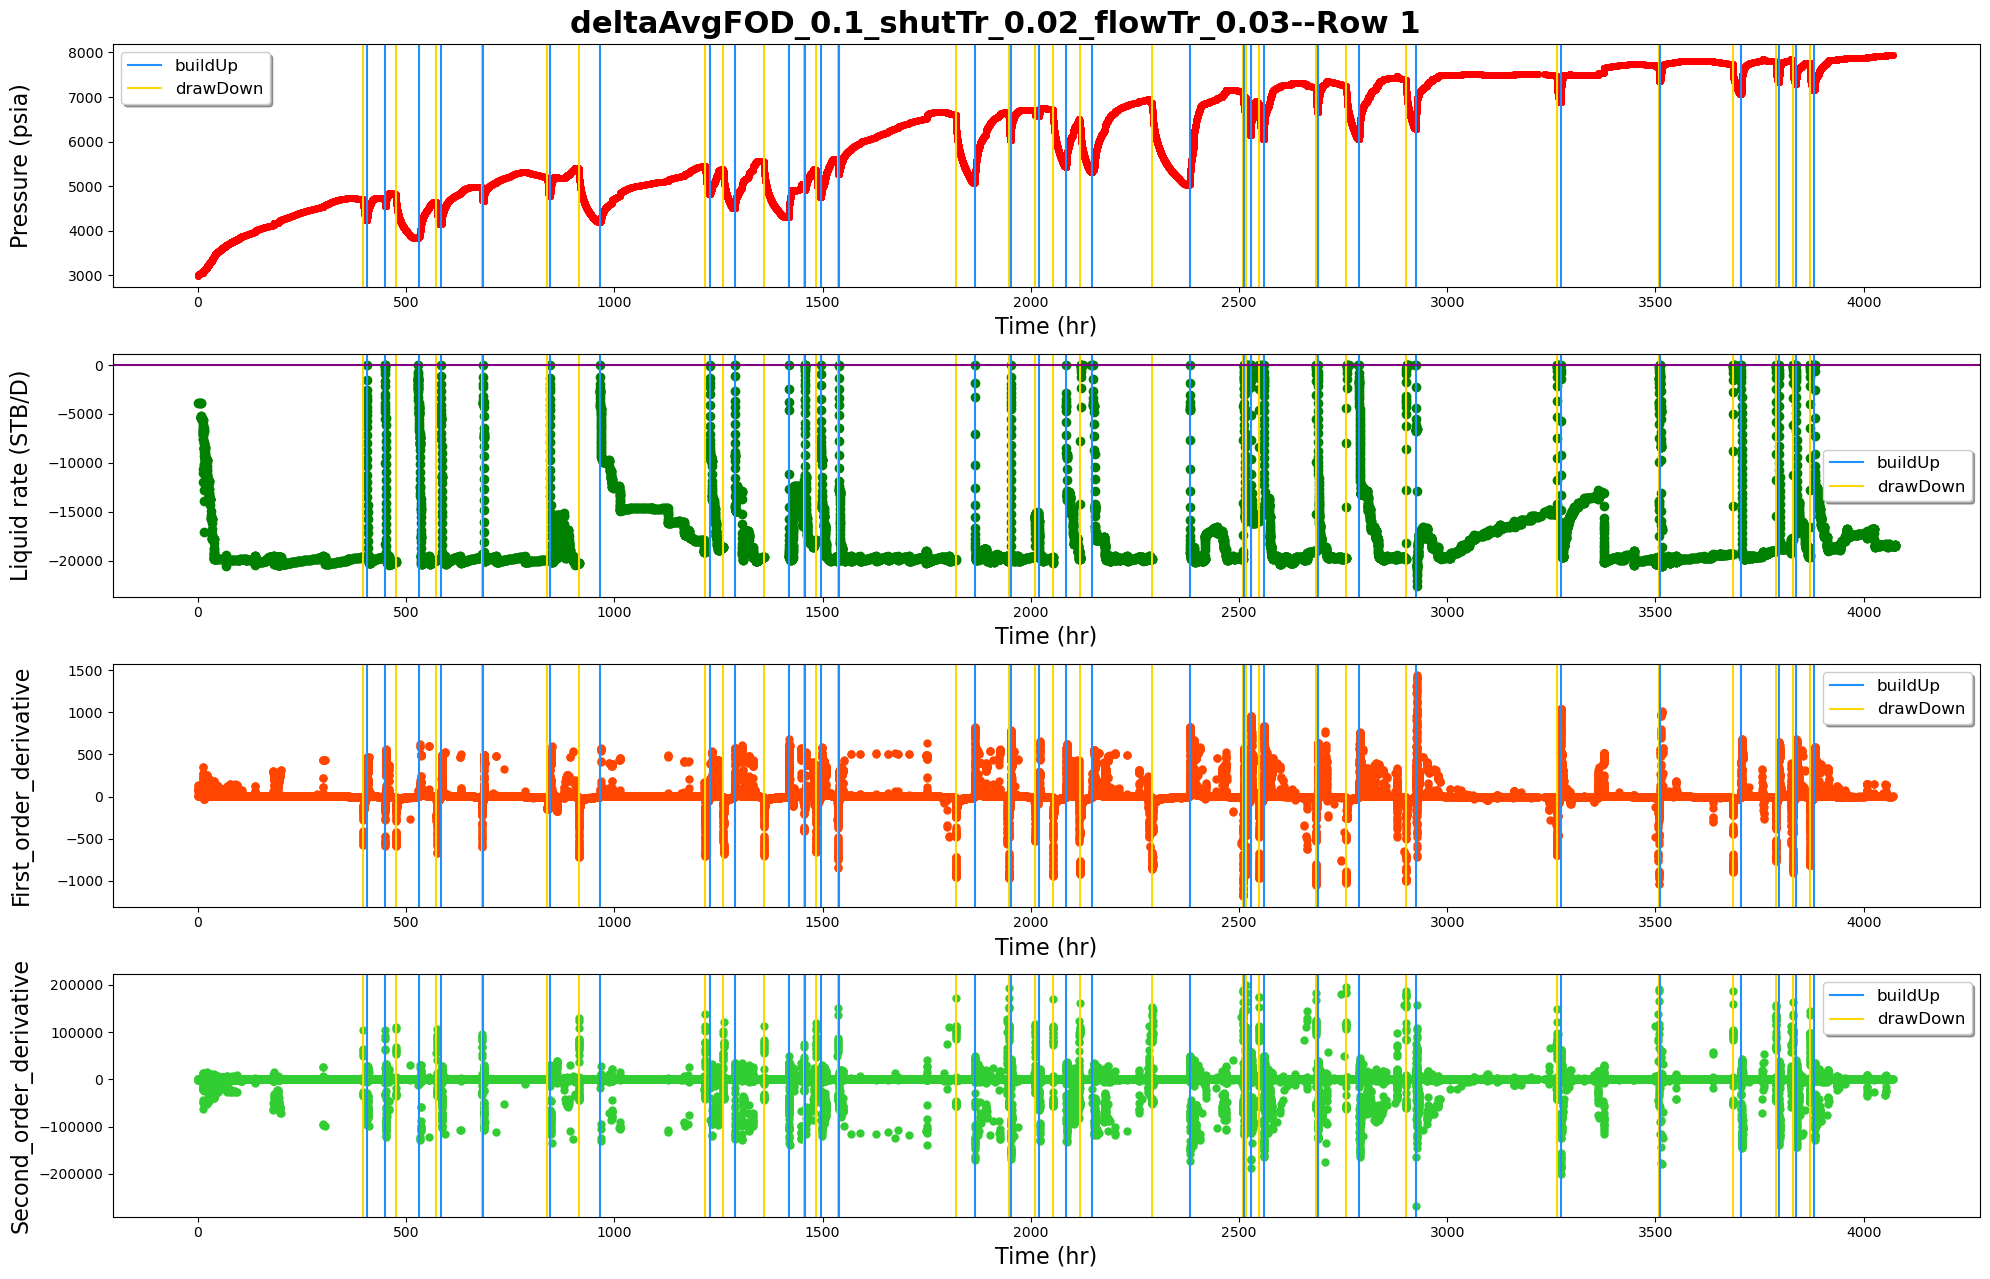

save whole....
detected 62 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[]


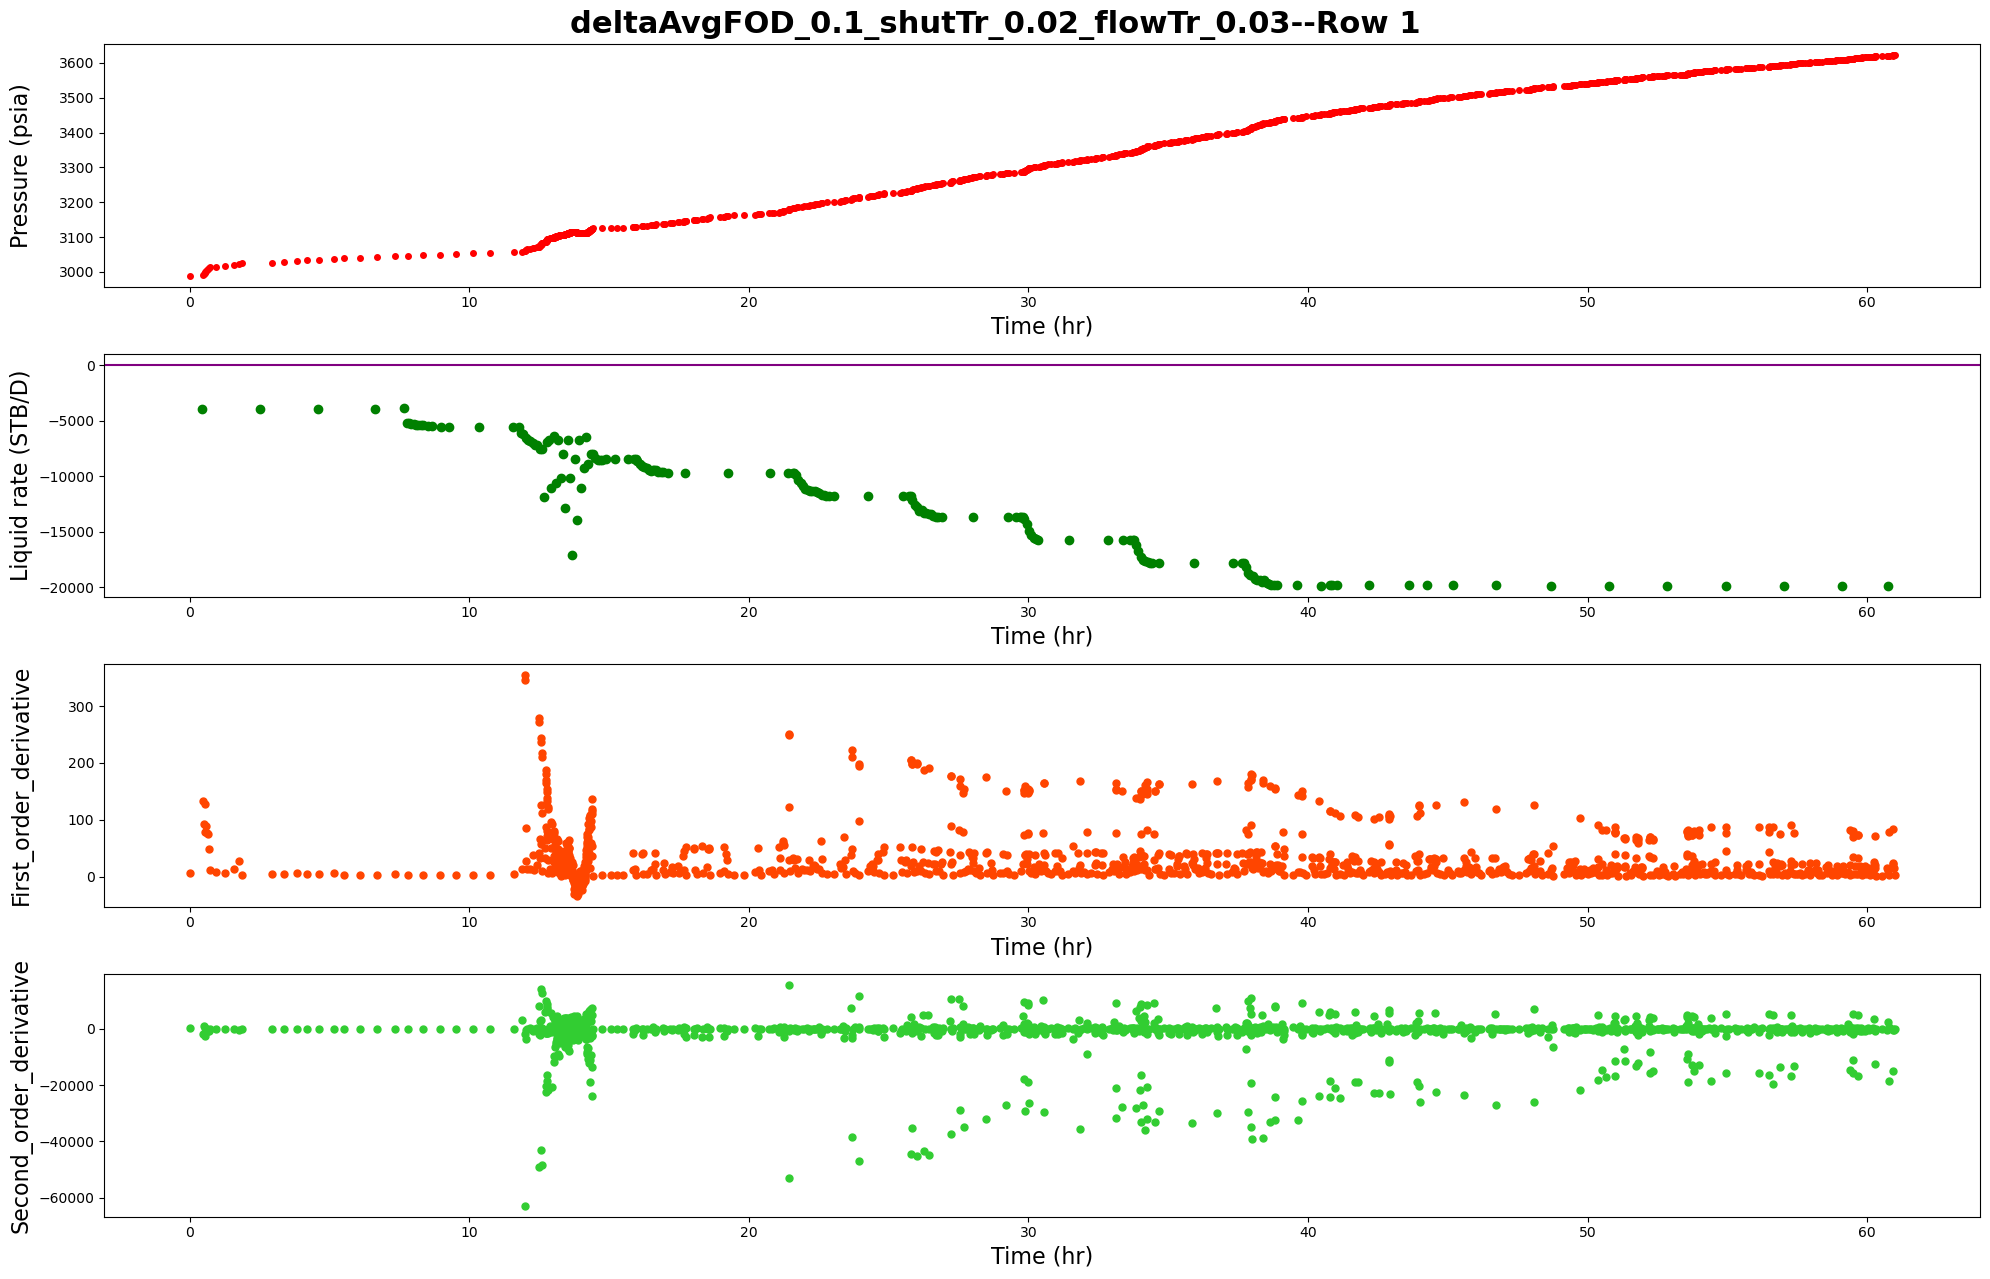

------row 2-----detected points:[2248]


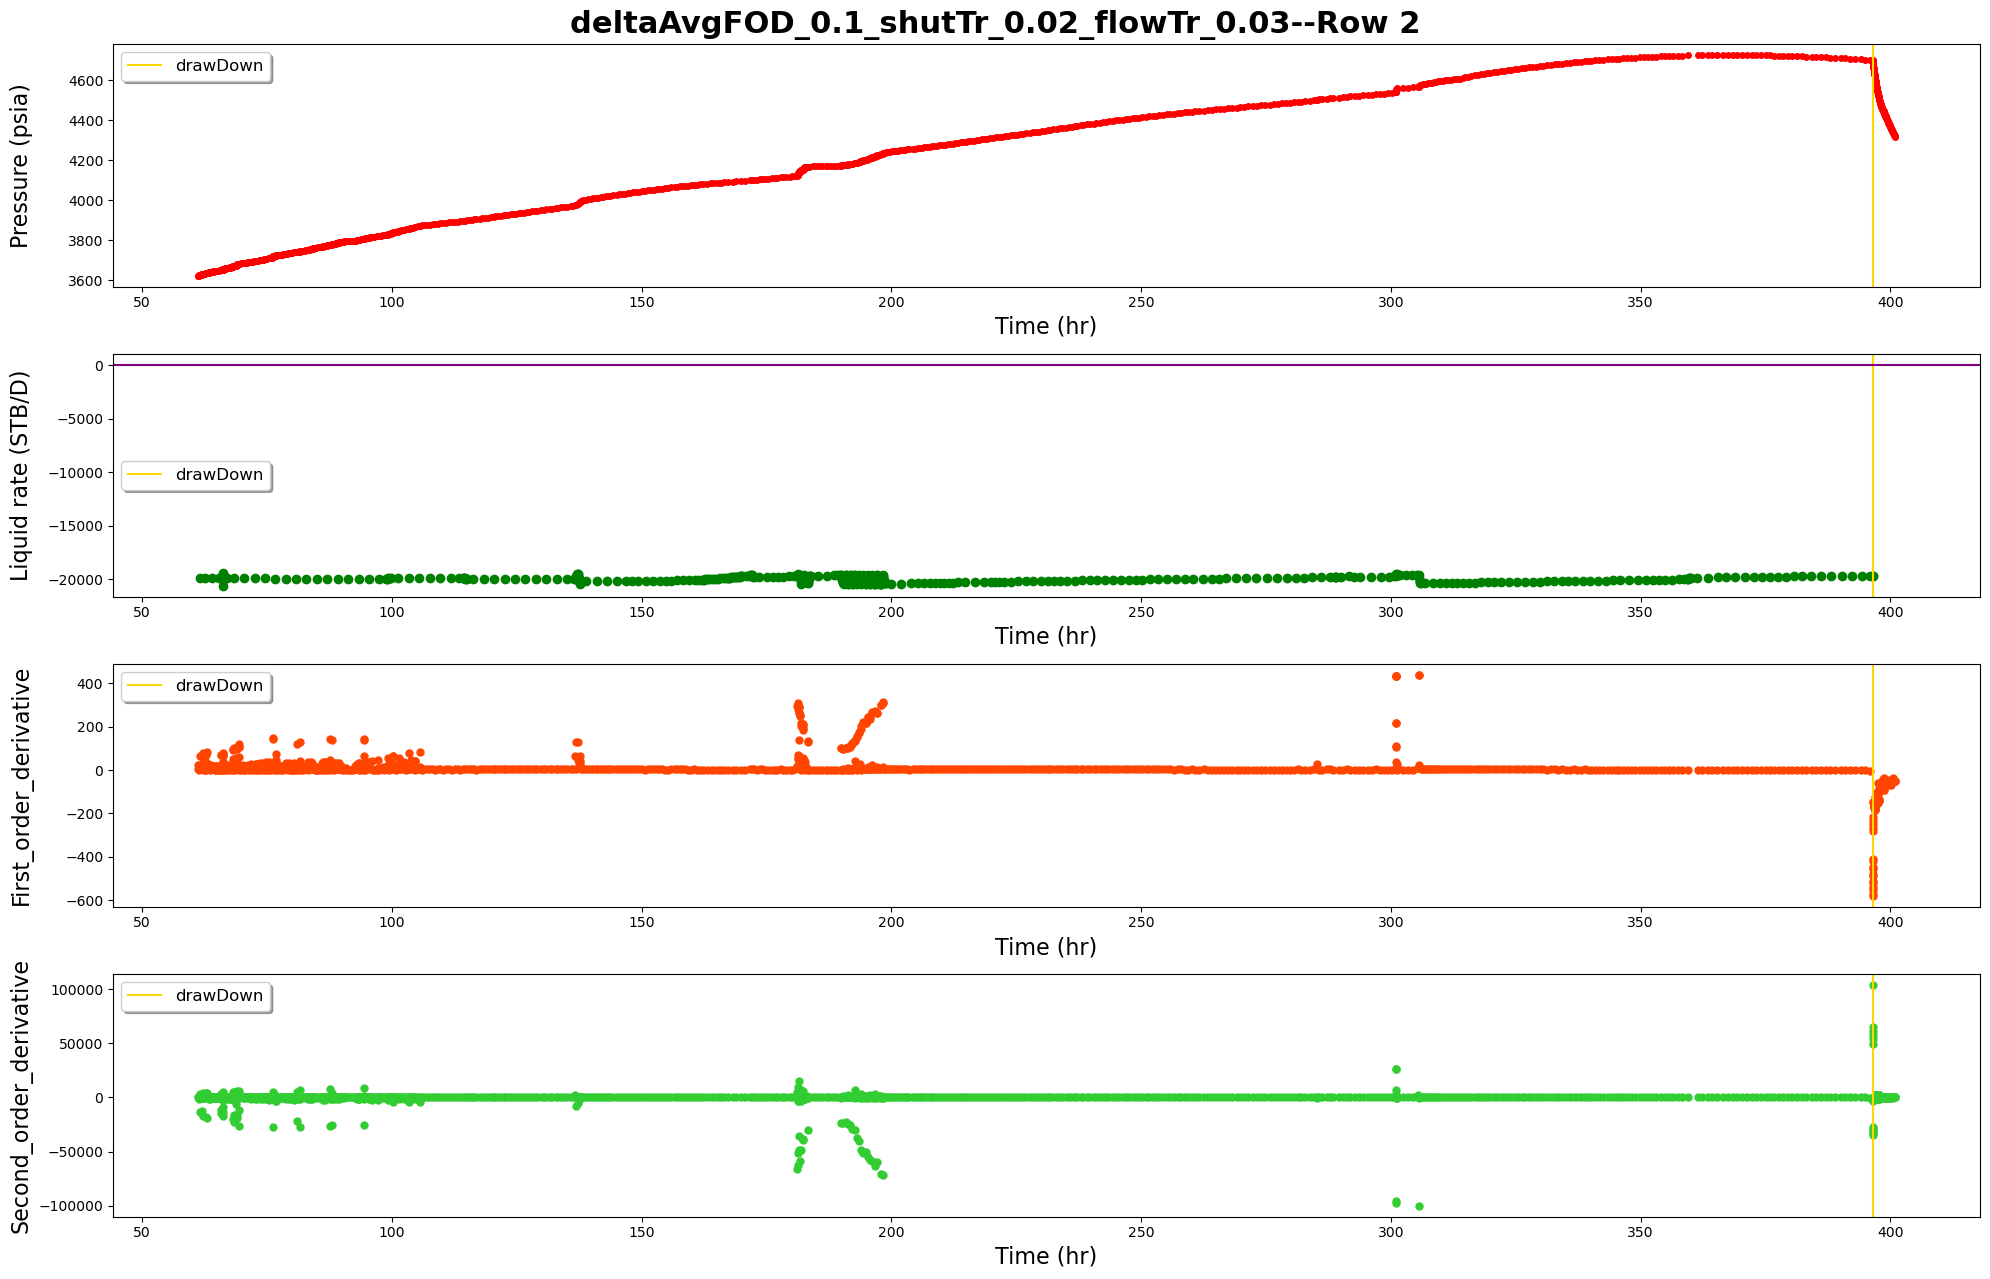

------row 3-----detected points:[2467, 2804, 2876, 3095, 3590]


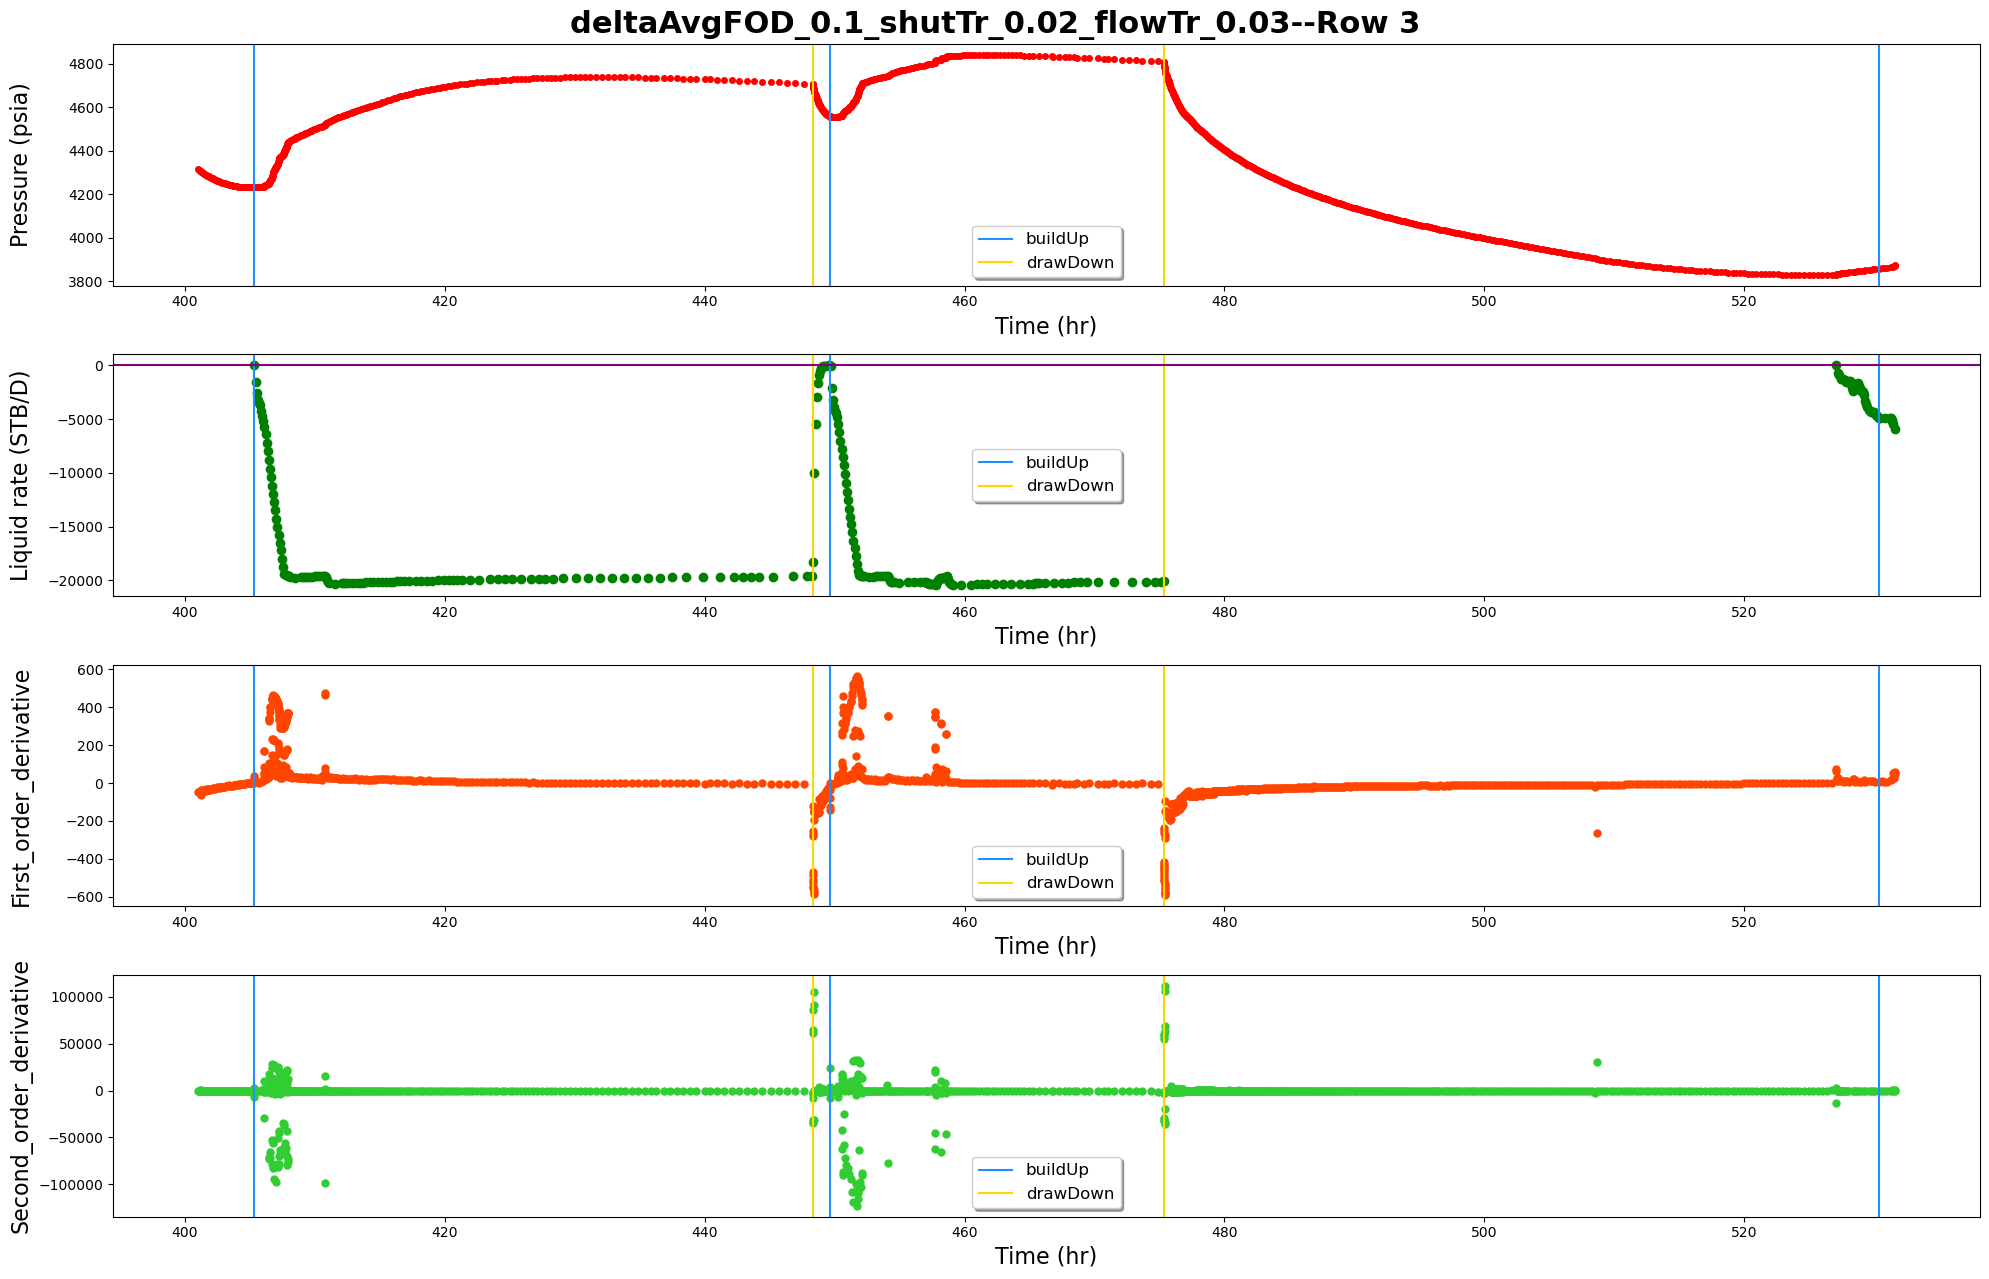

------row 4-----detected points:[3988, 4228, 4750]


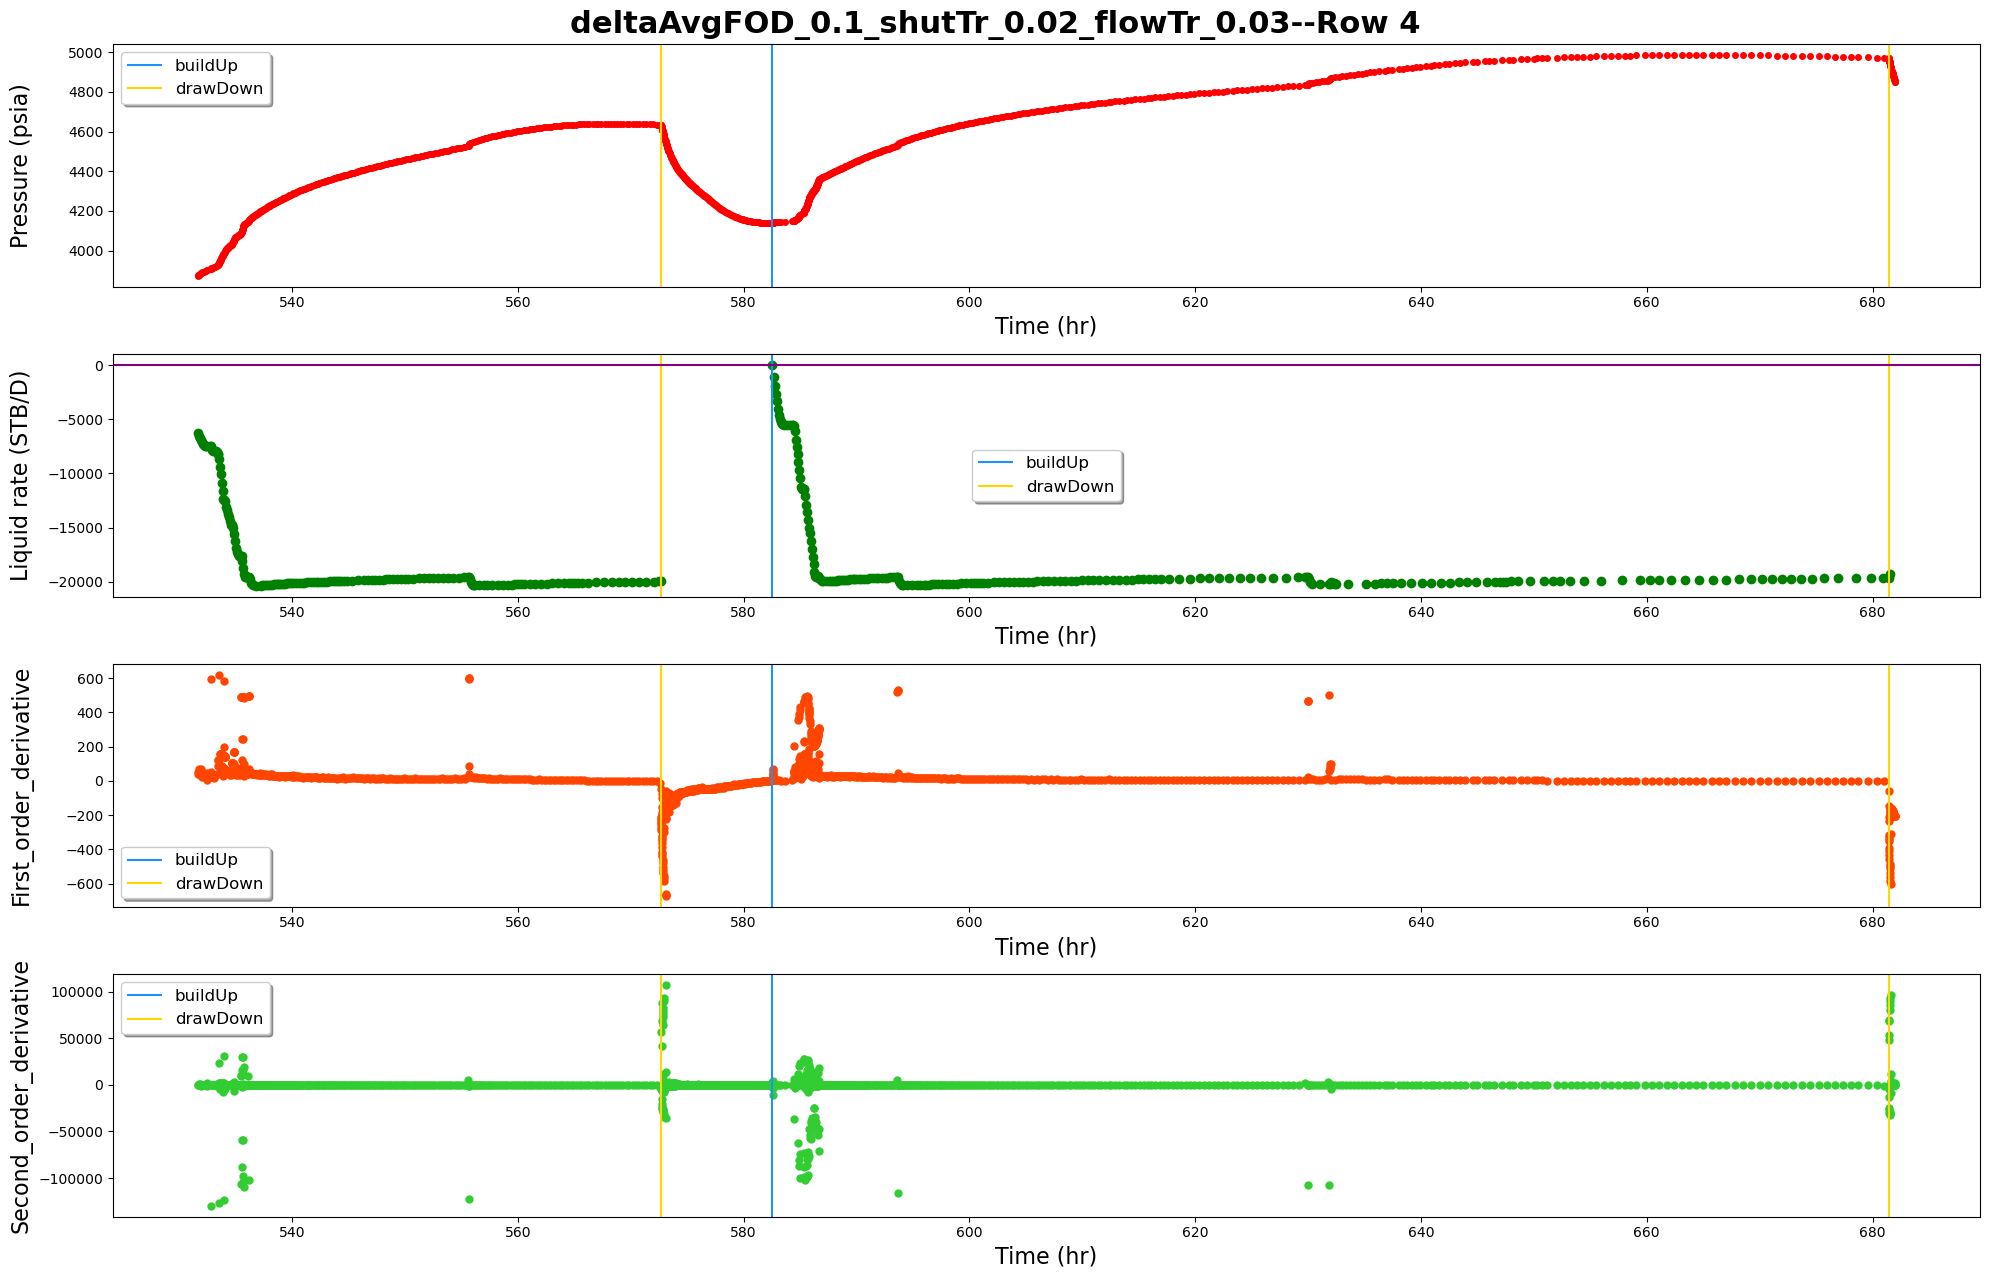

------row 5-----detected points:[4890, 5304, 5436, 5985]


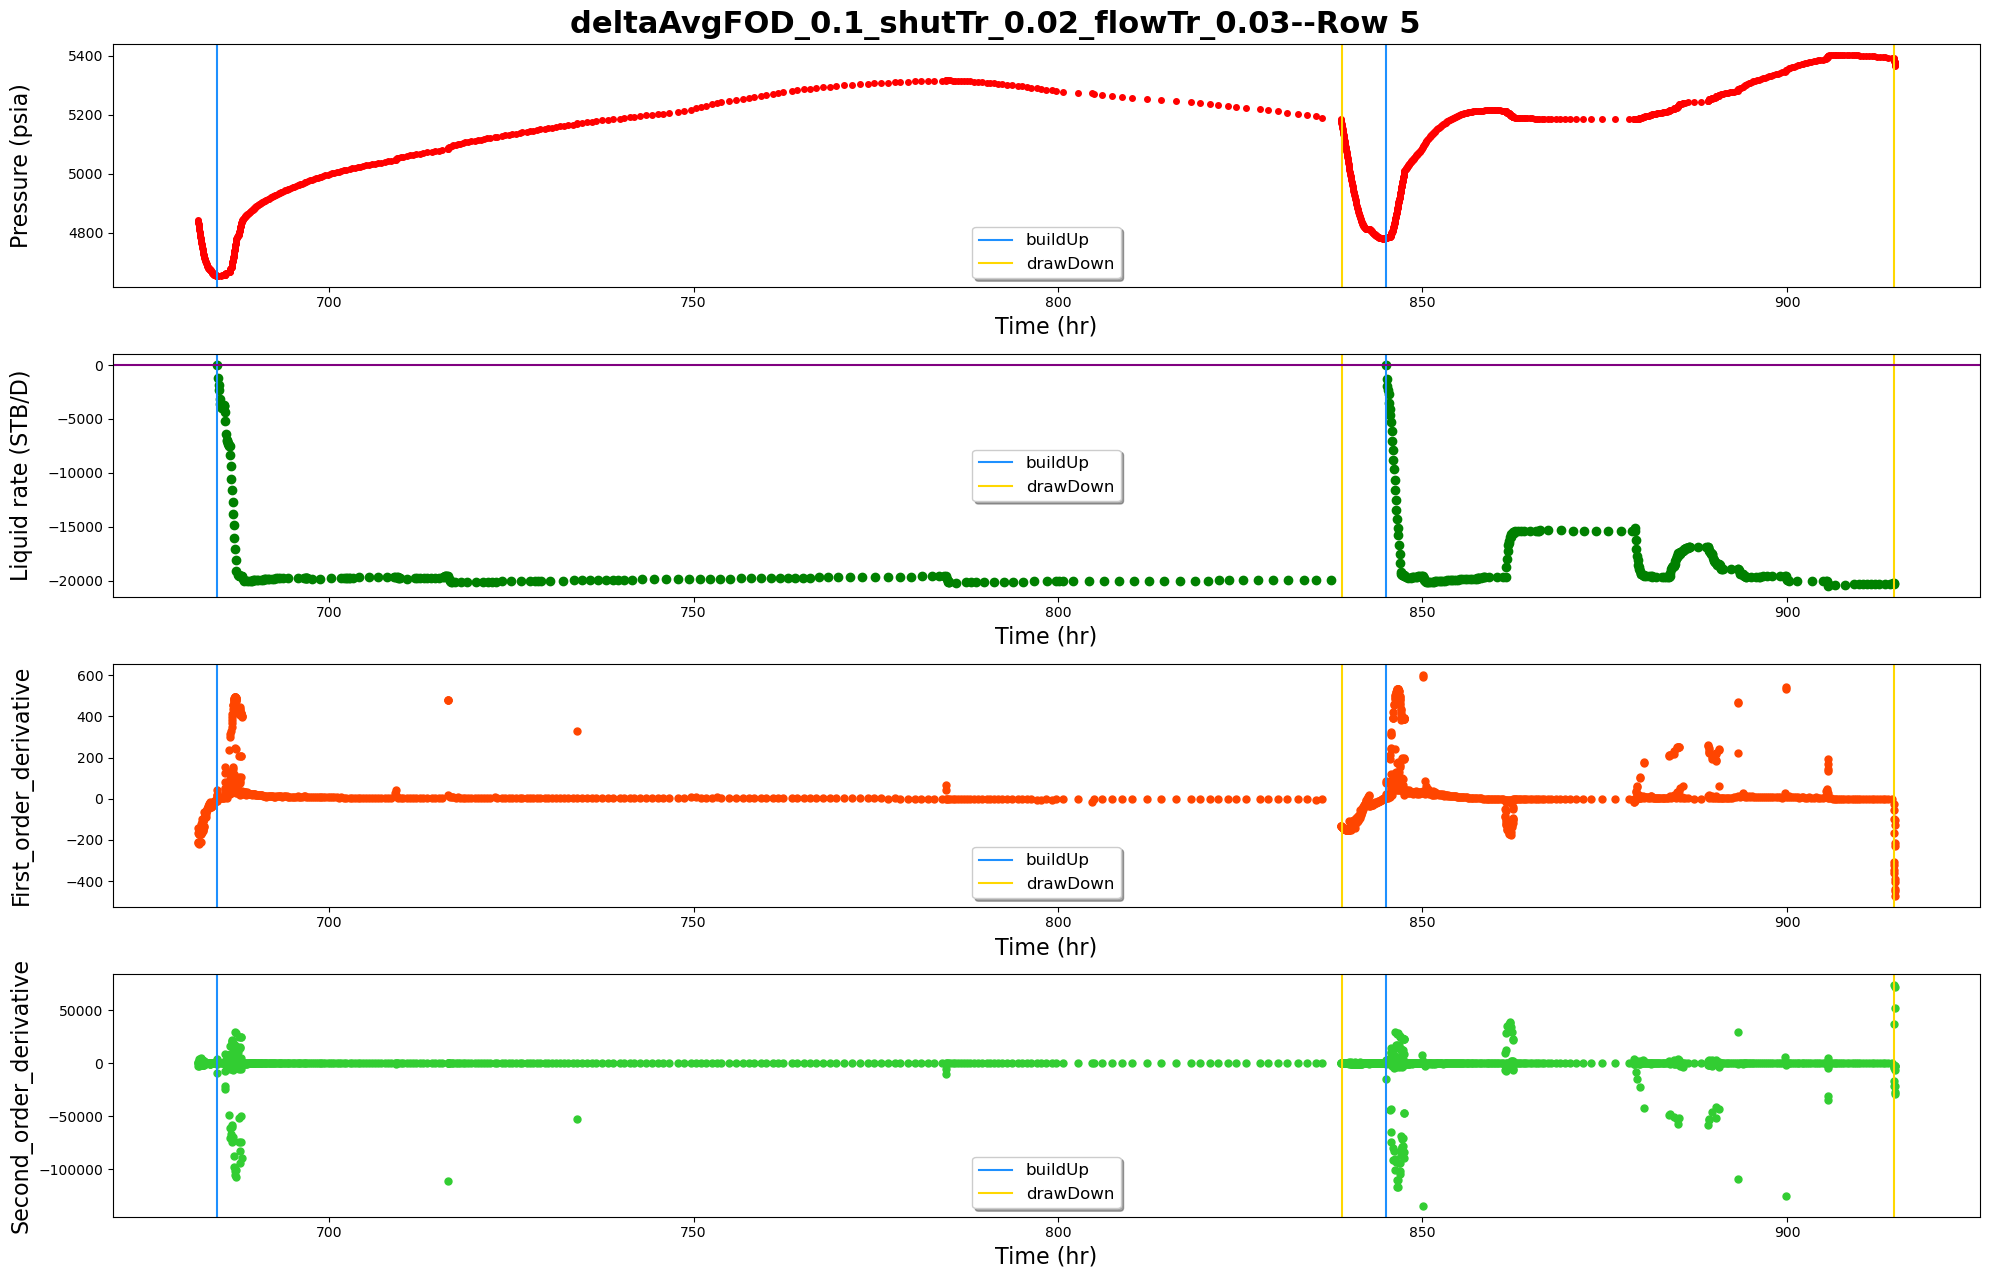

------row 6-----detected points:[6543]


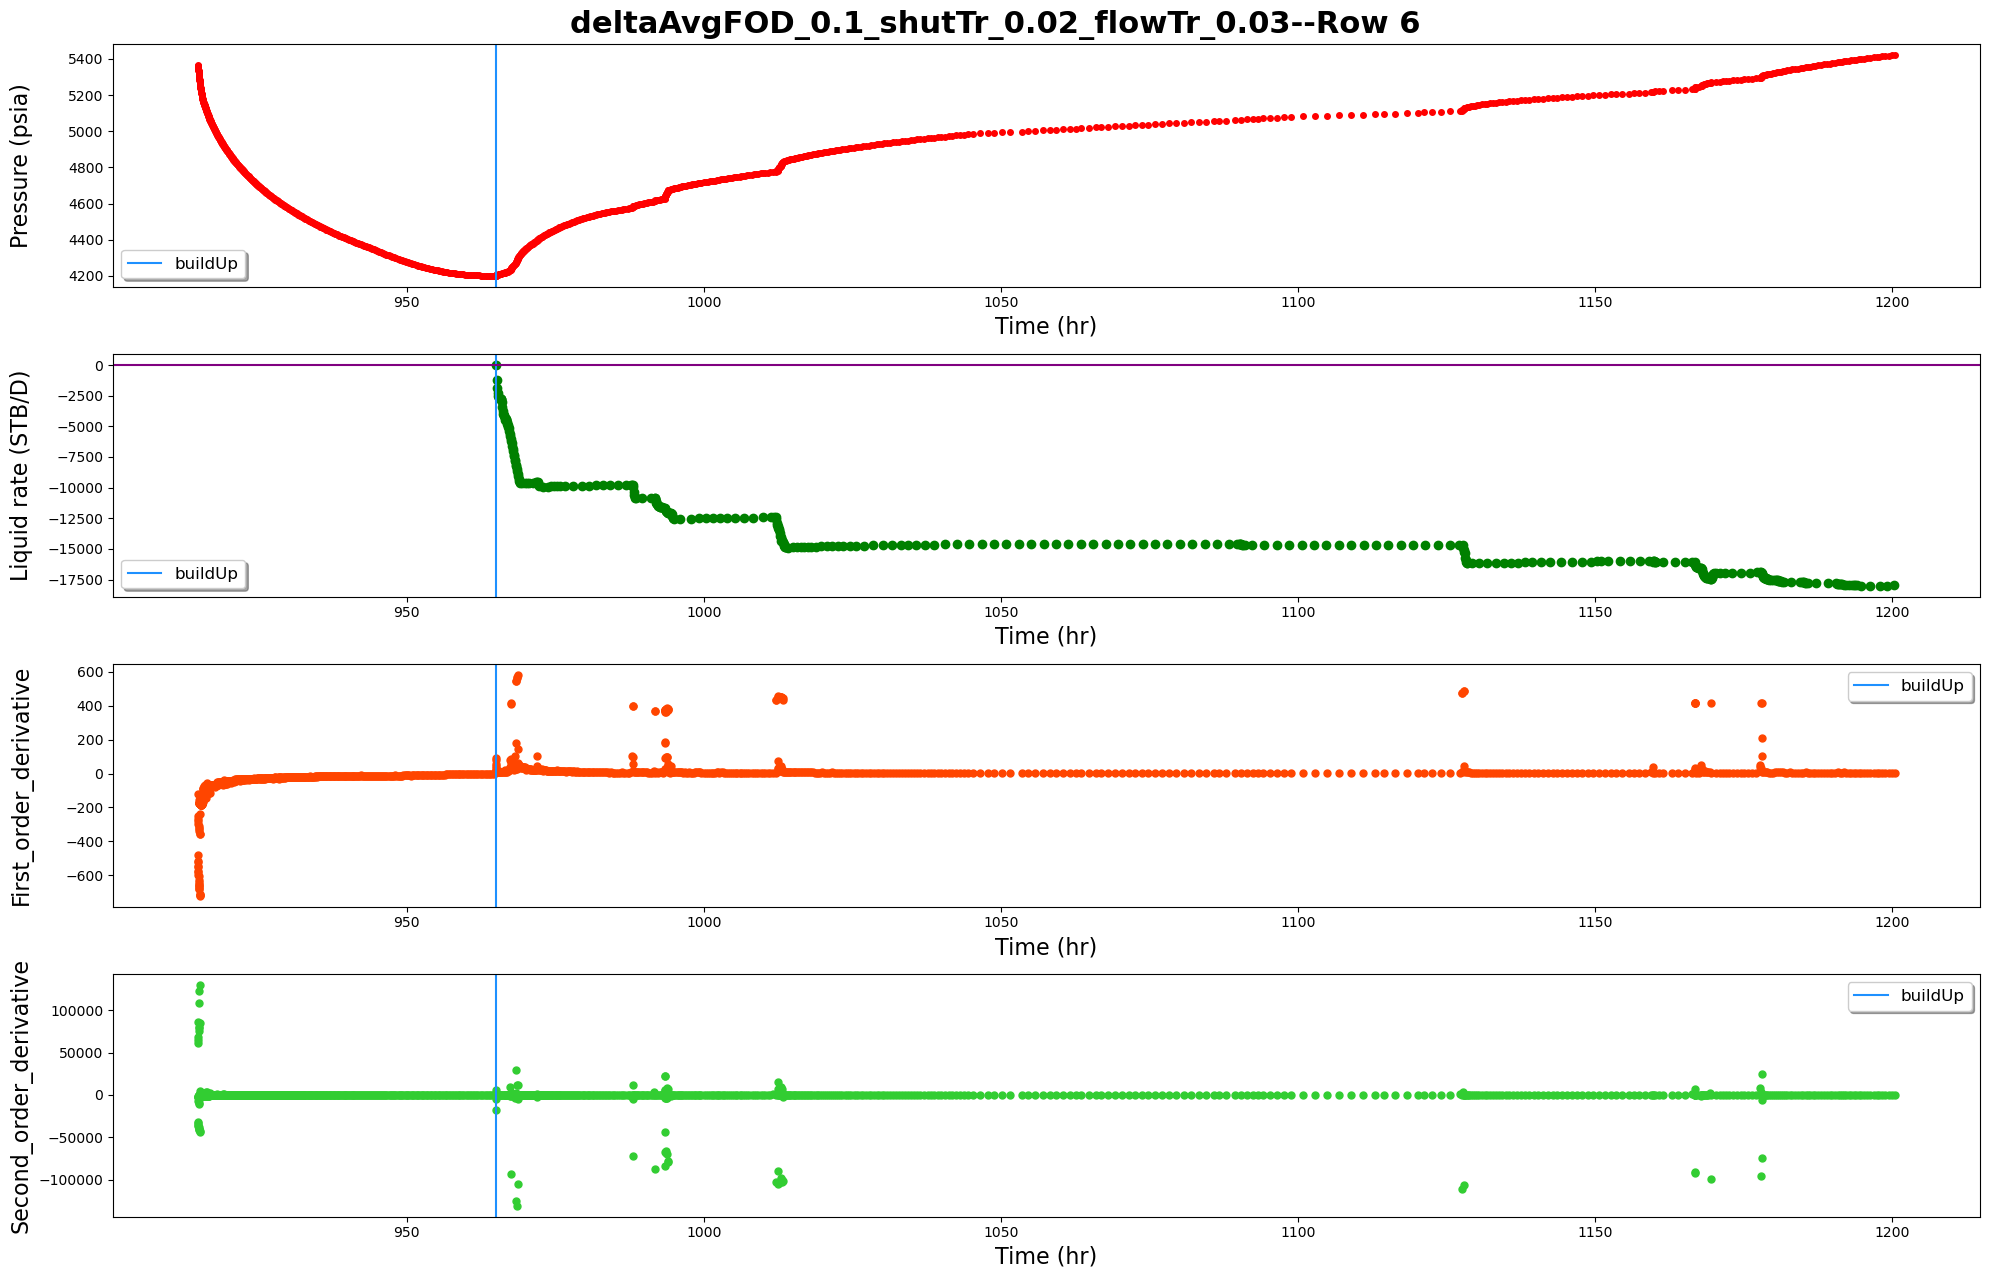

------row 7-----detected points:[7284, 7544, 7945, 8361]


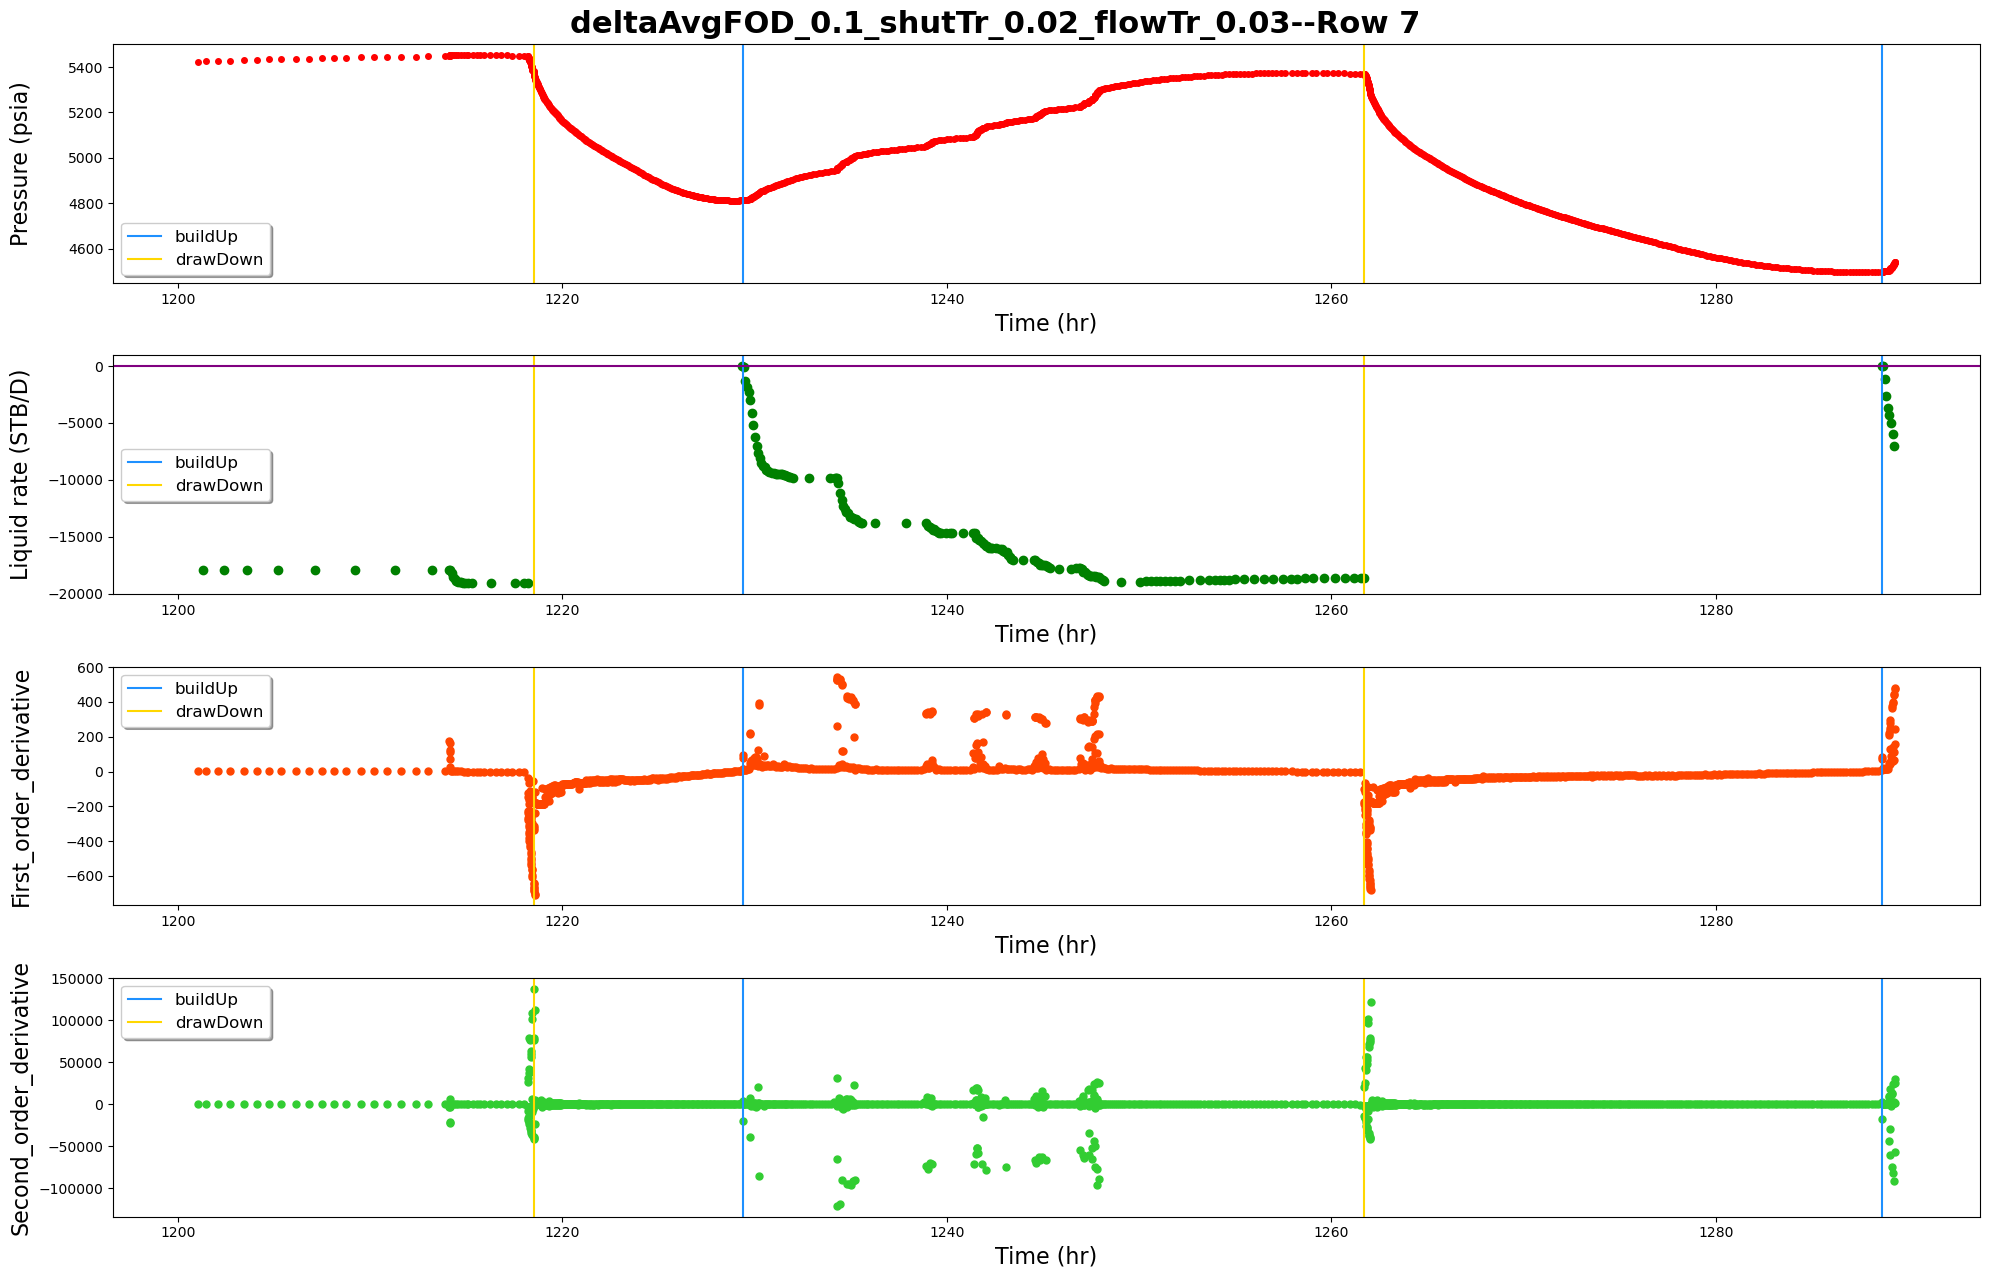

------row 8-----detected points:[9024]


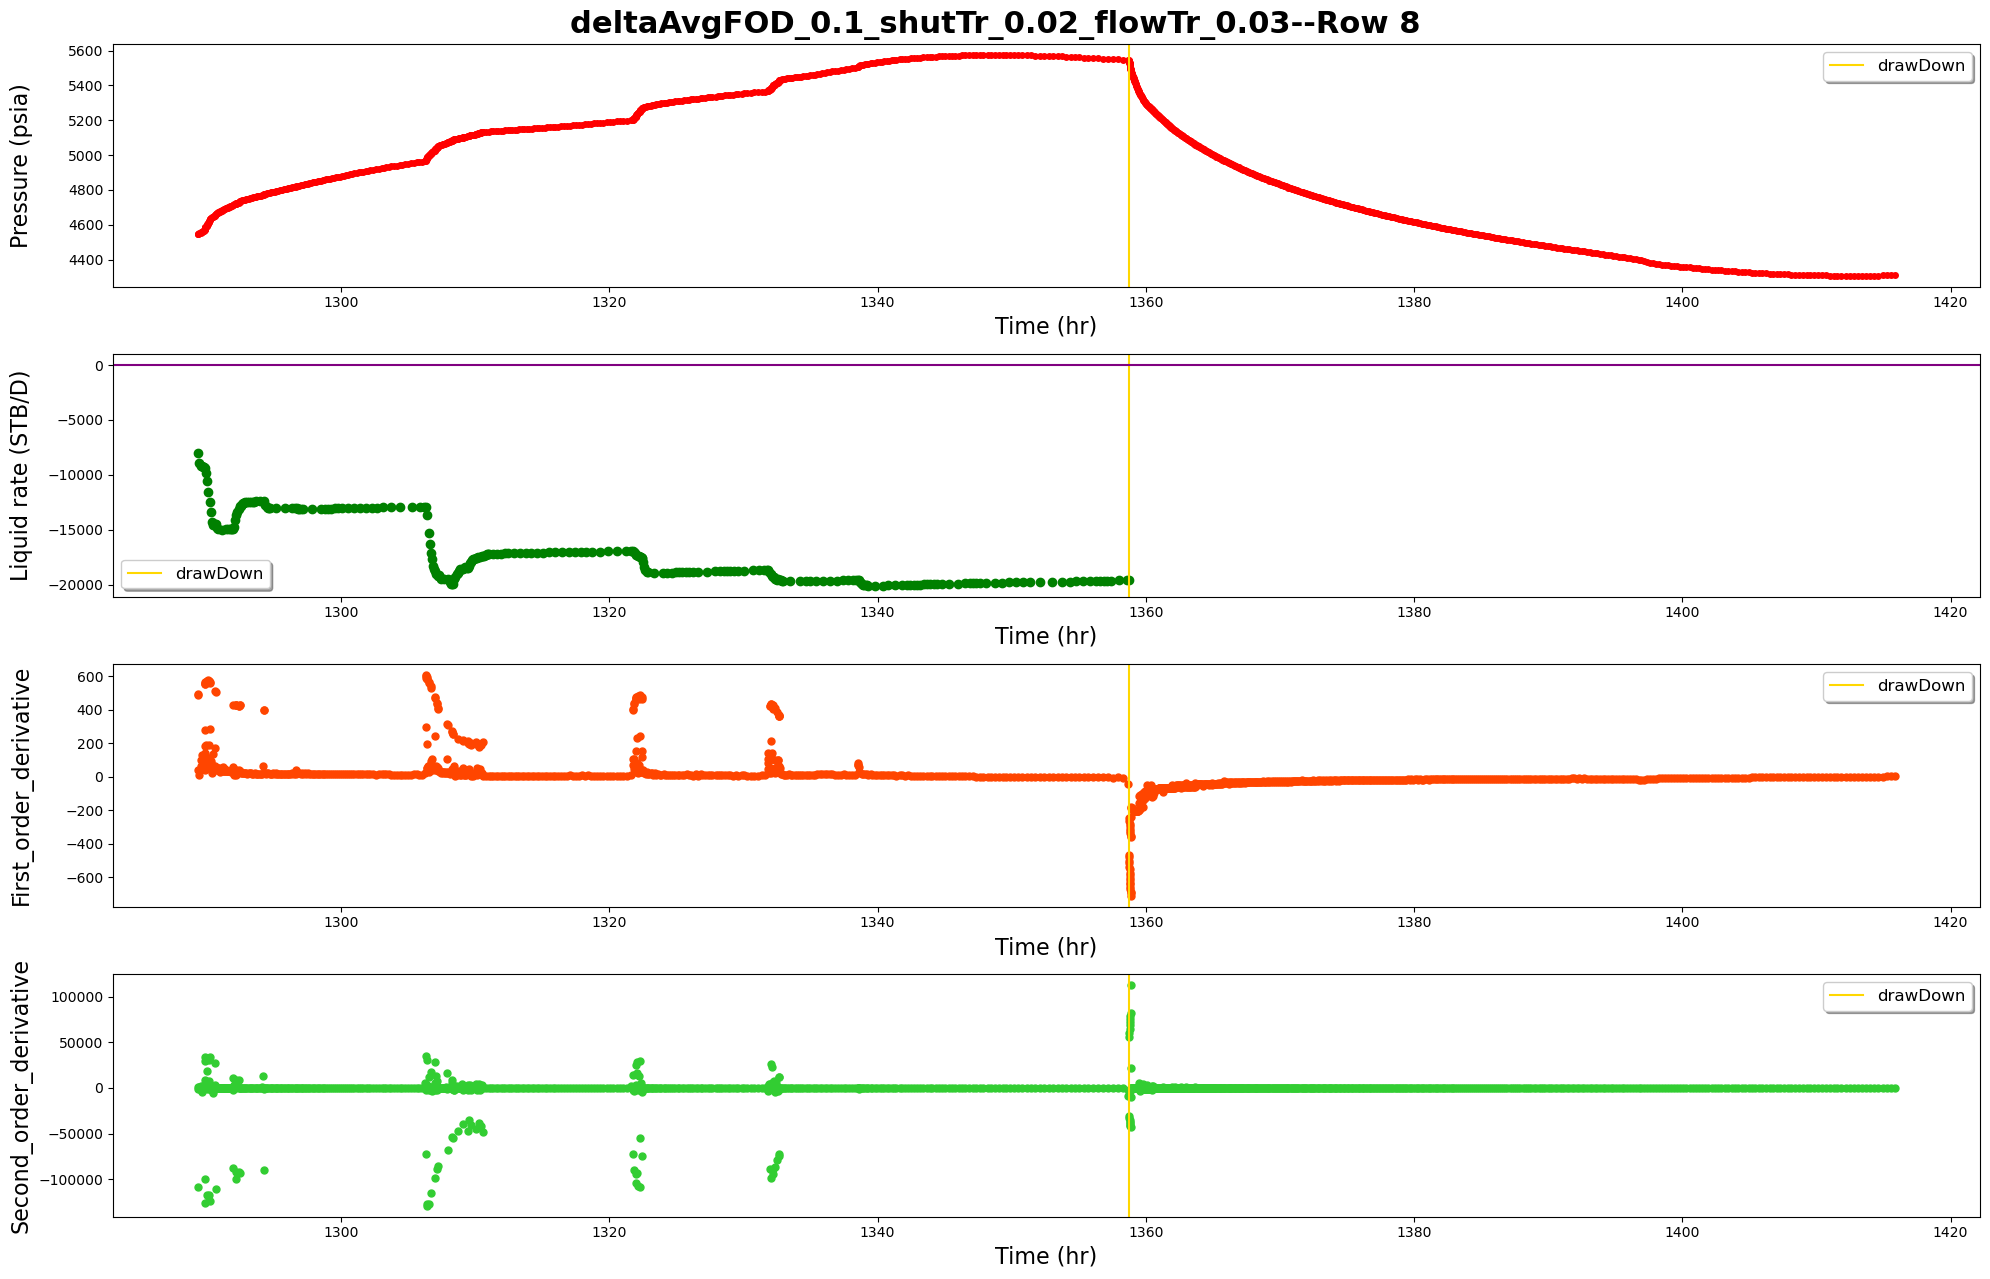

------row 9-----detected points:[9606, 10149, 10224, 10527]


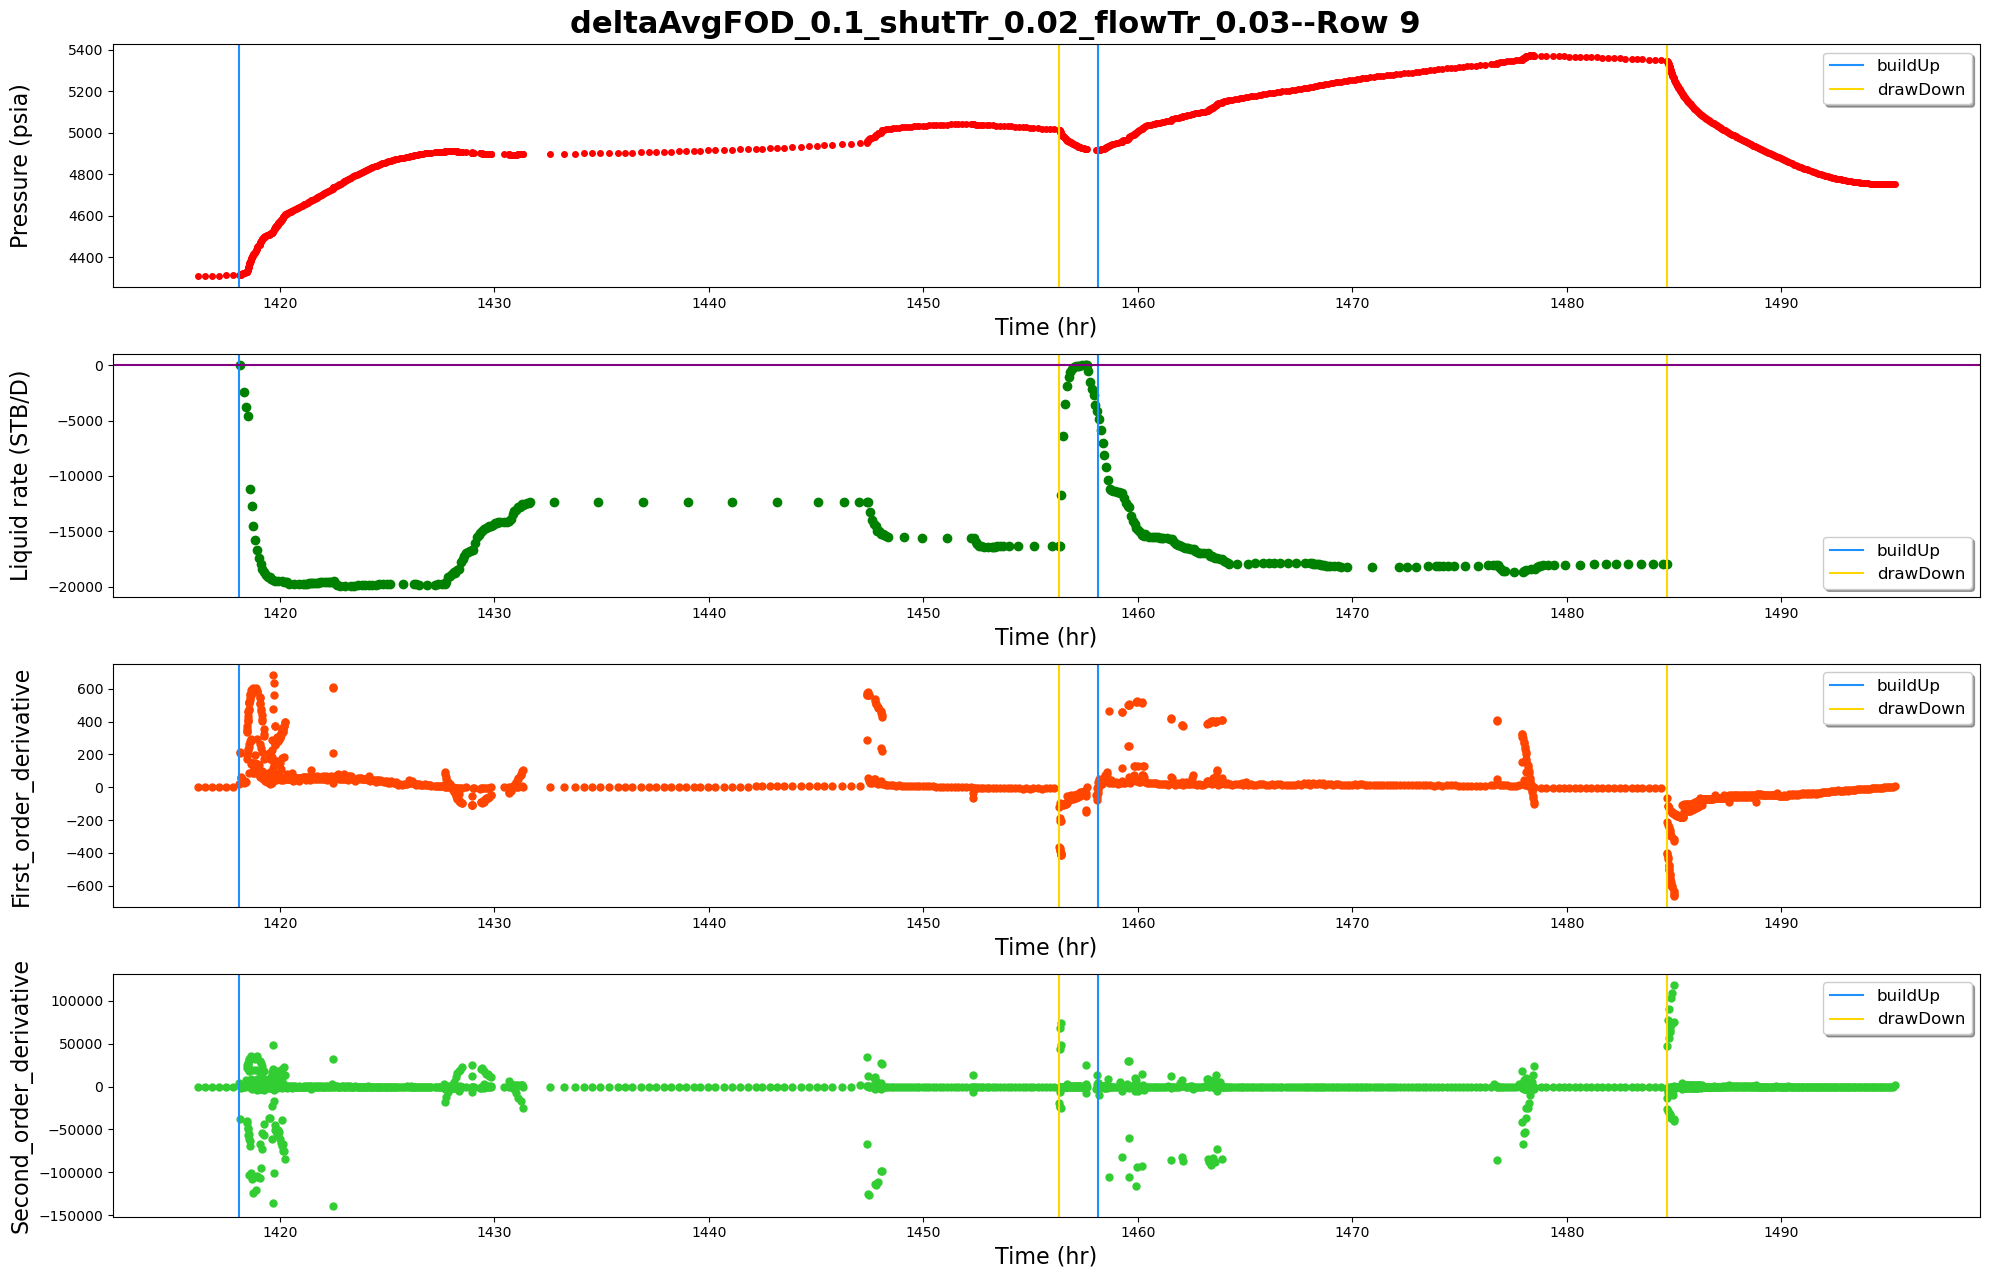

------row 10-----detected points:[10800, 11340, 11480]


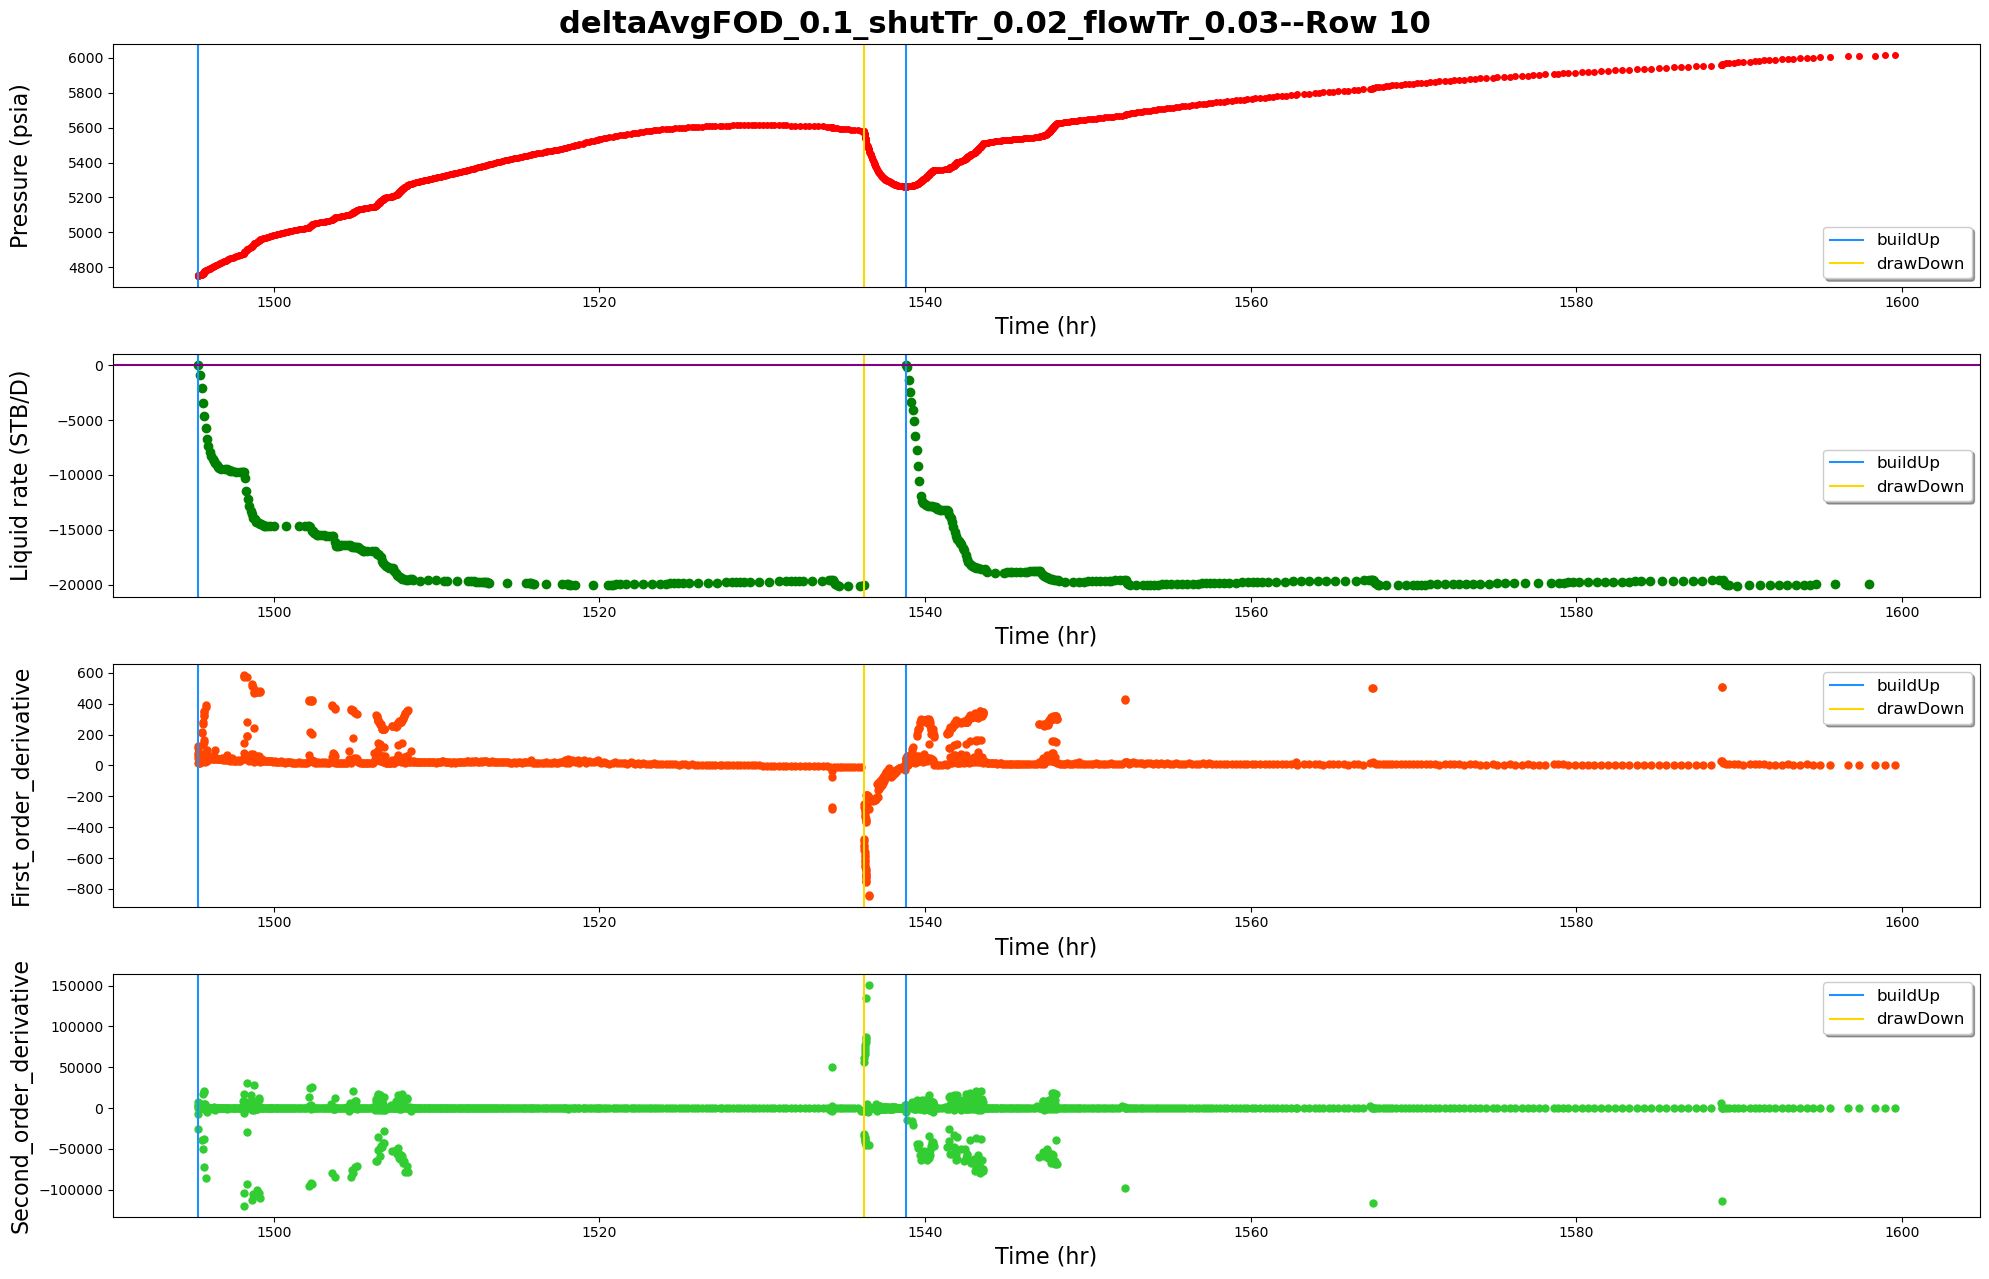

------row 11-----detected points:[12362, 13038]


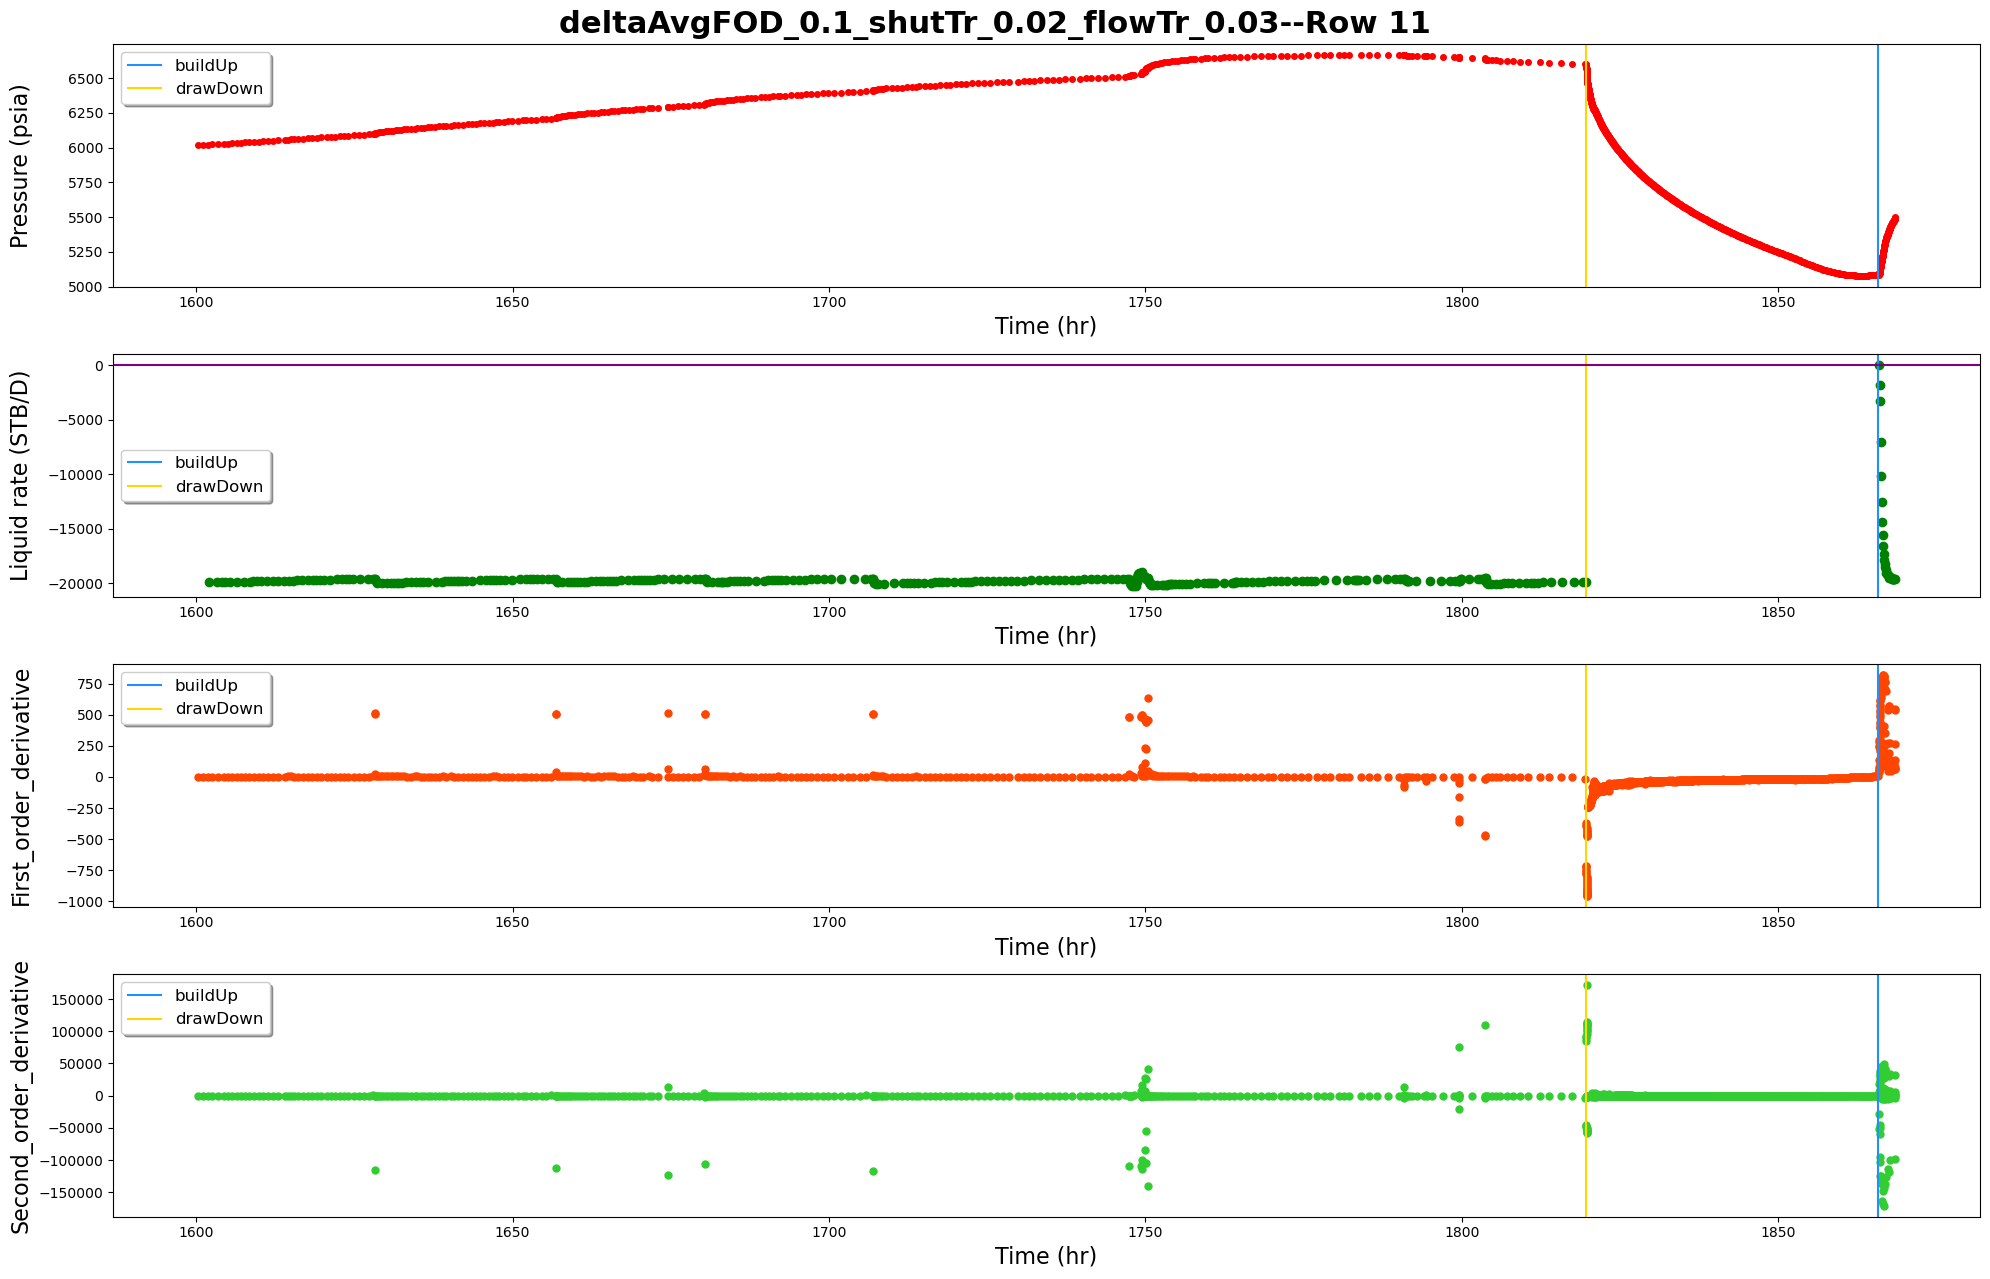

------row 12-----detected points:[13867, 14085]


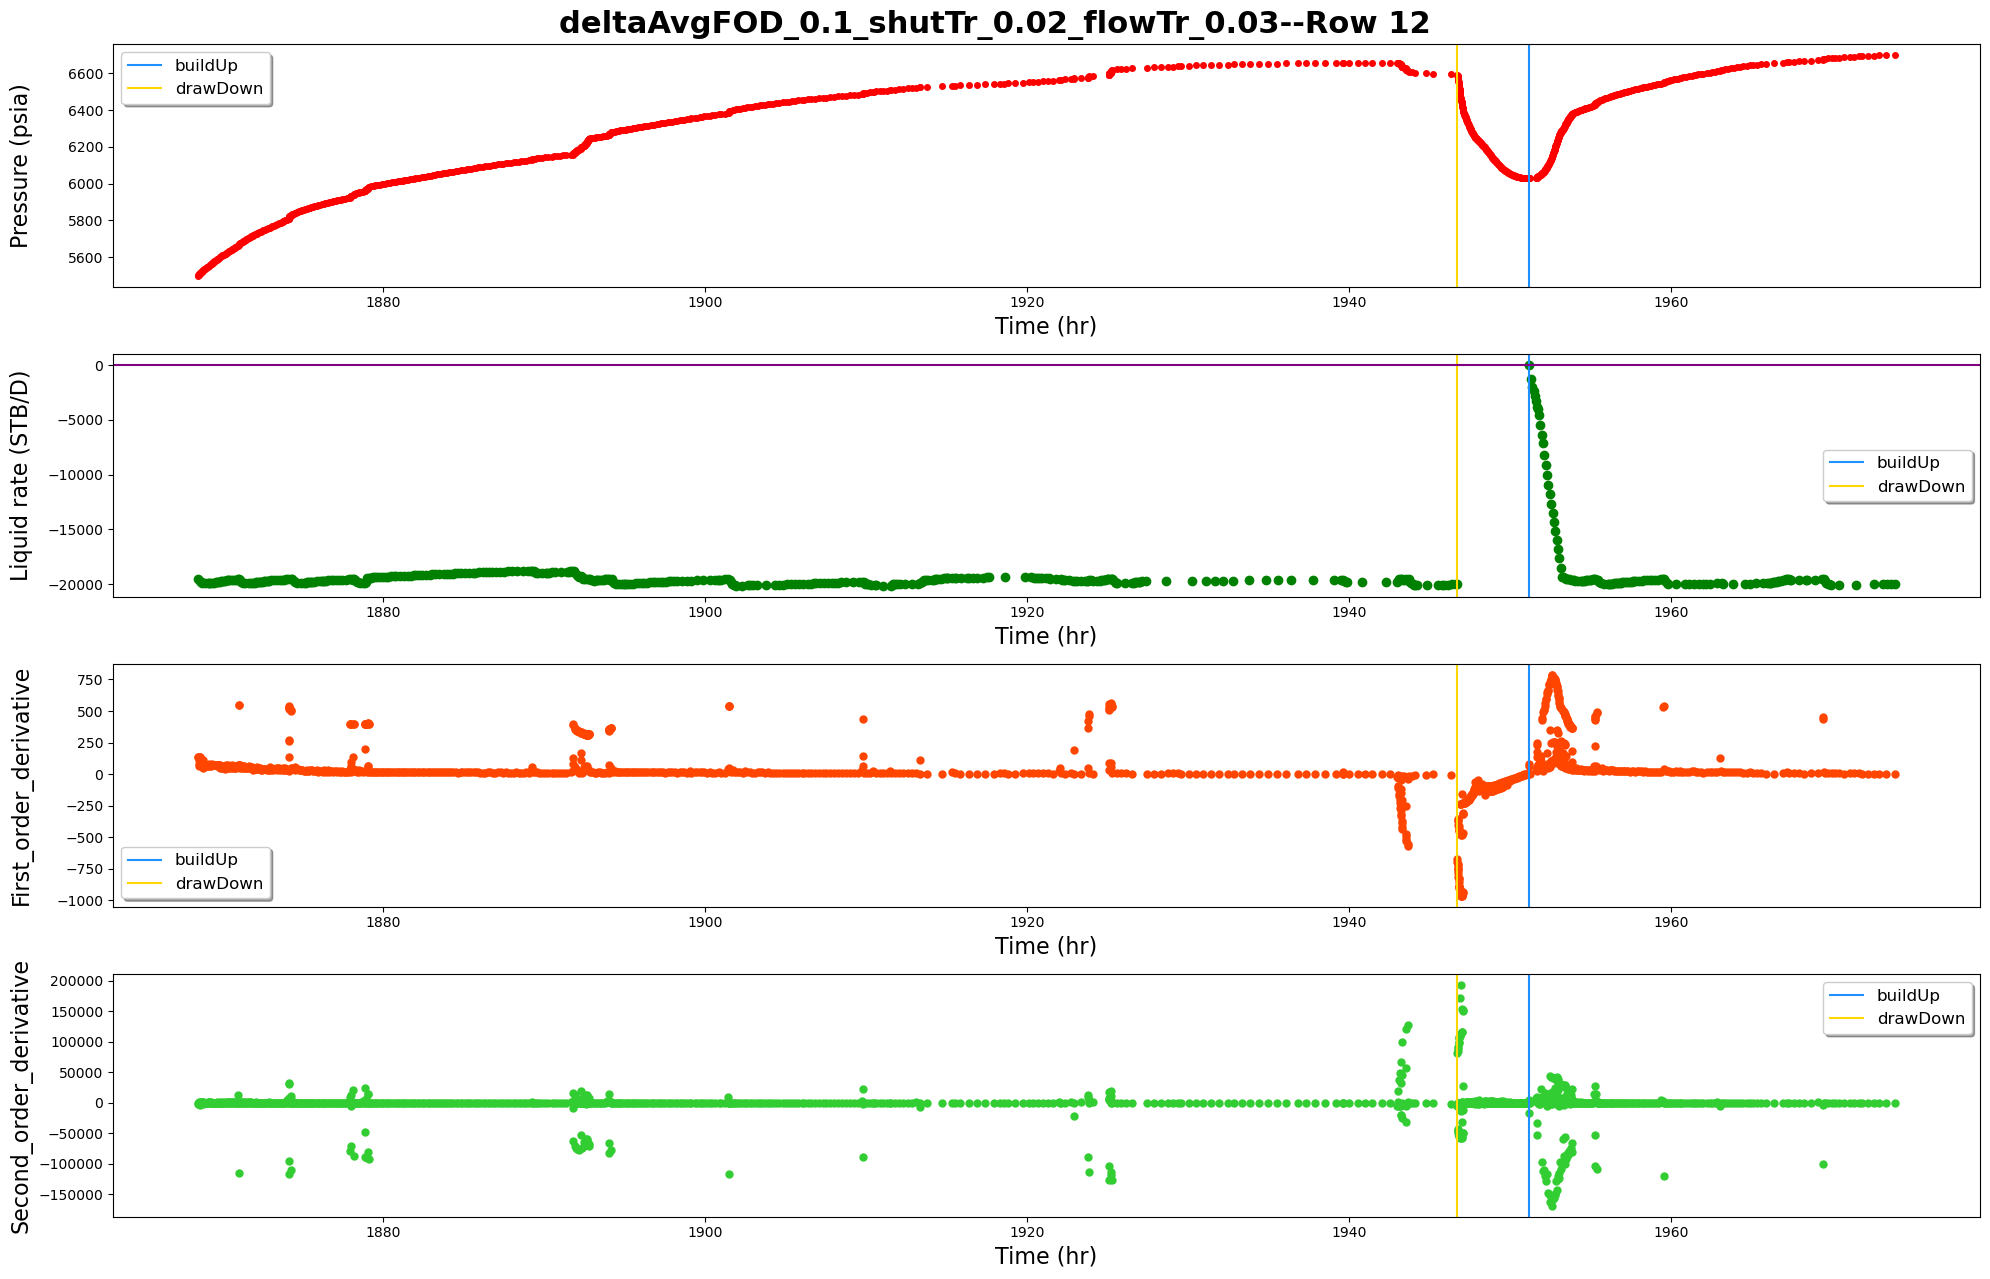

------row 13-----detected points:[14471, 14564, 14774, 15335]


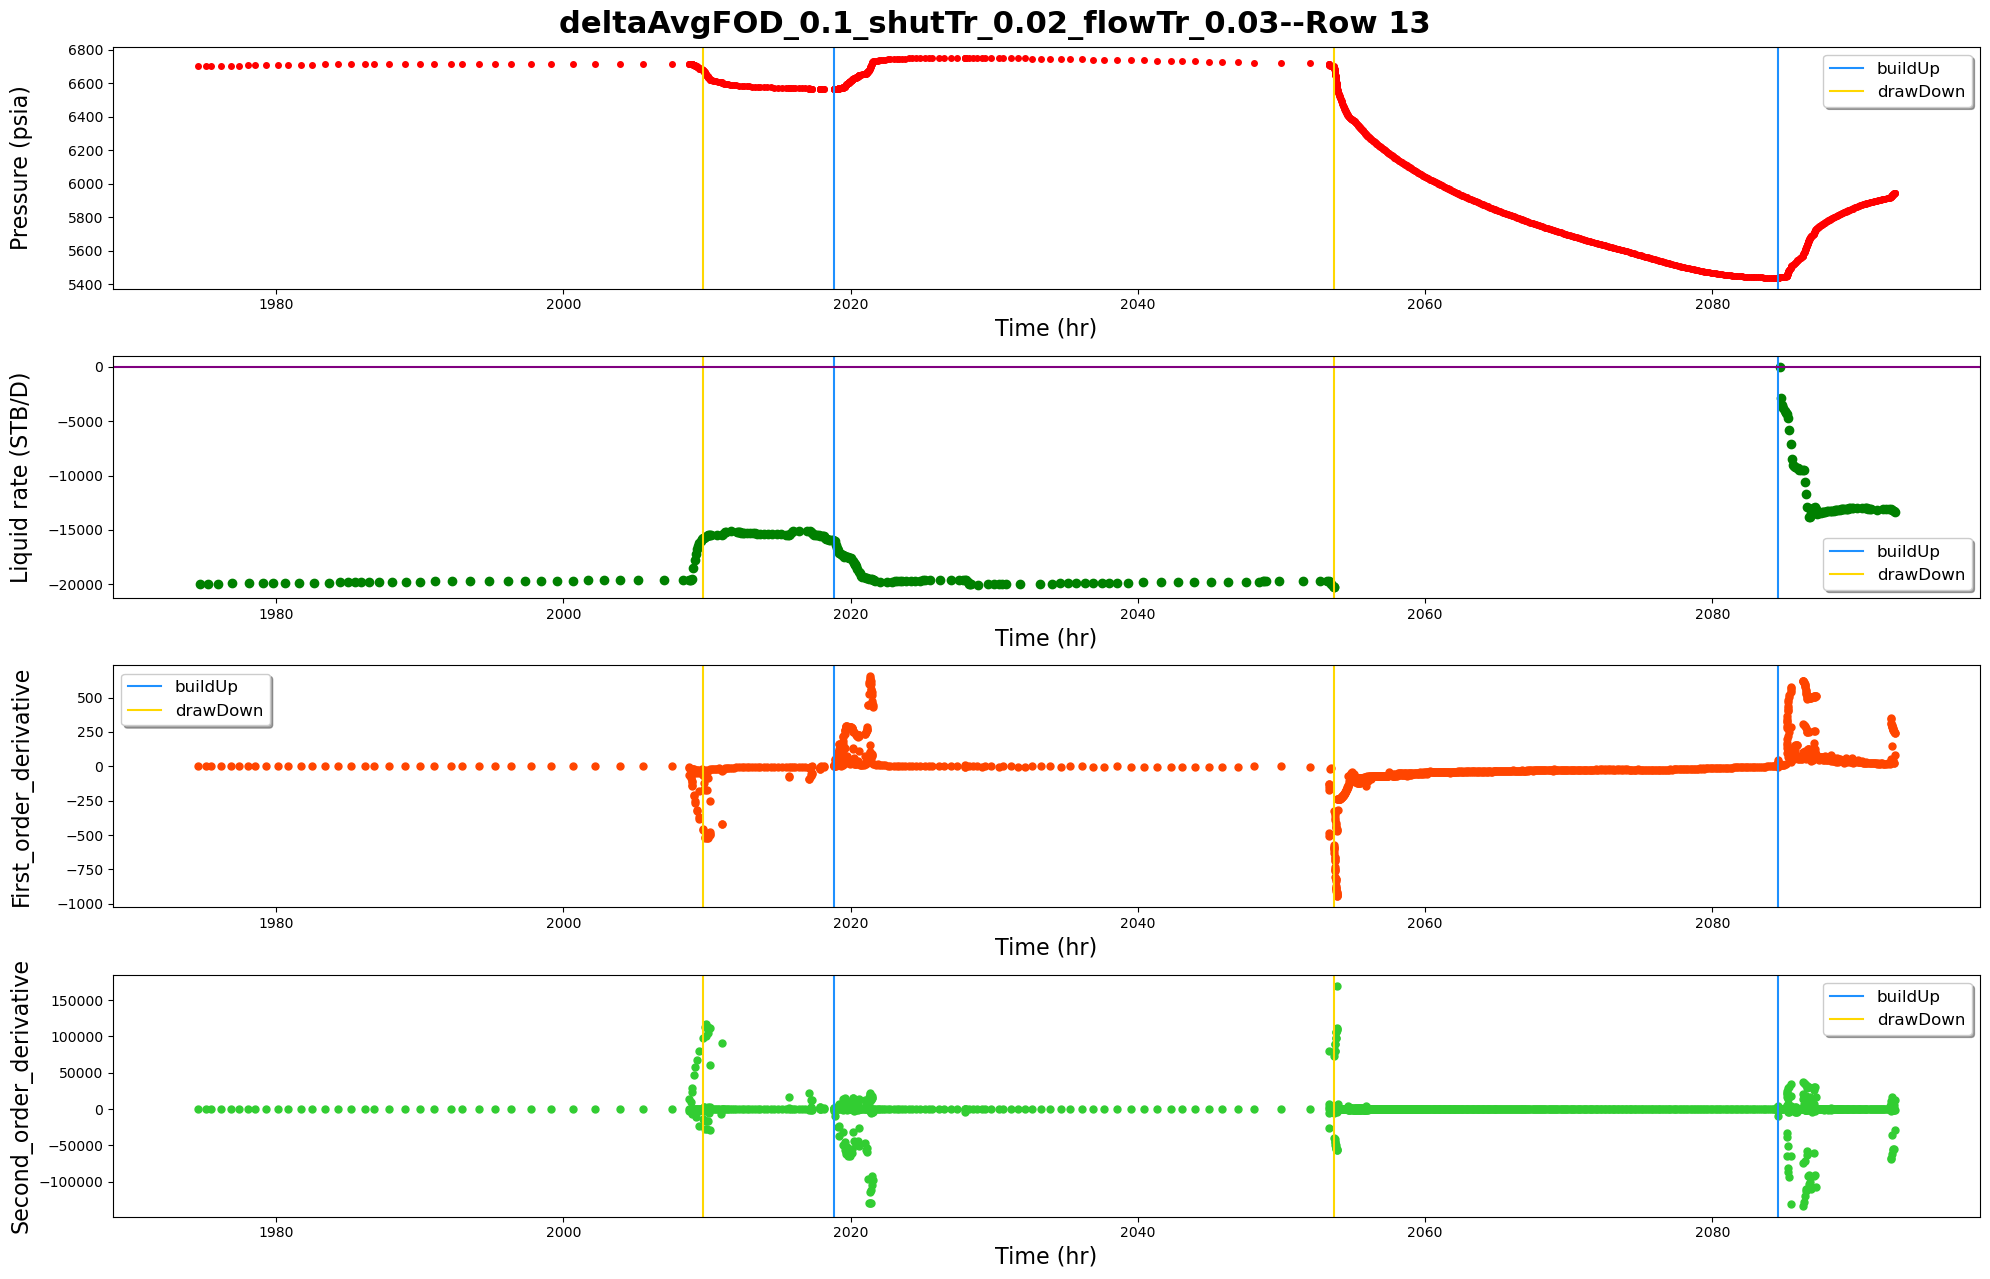

------row 14-----detected points:[16096, 16580]


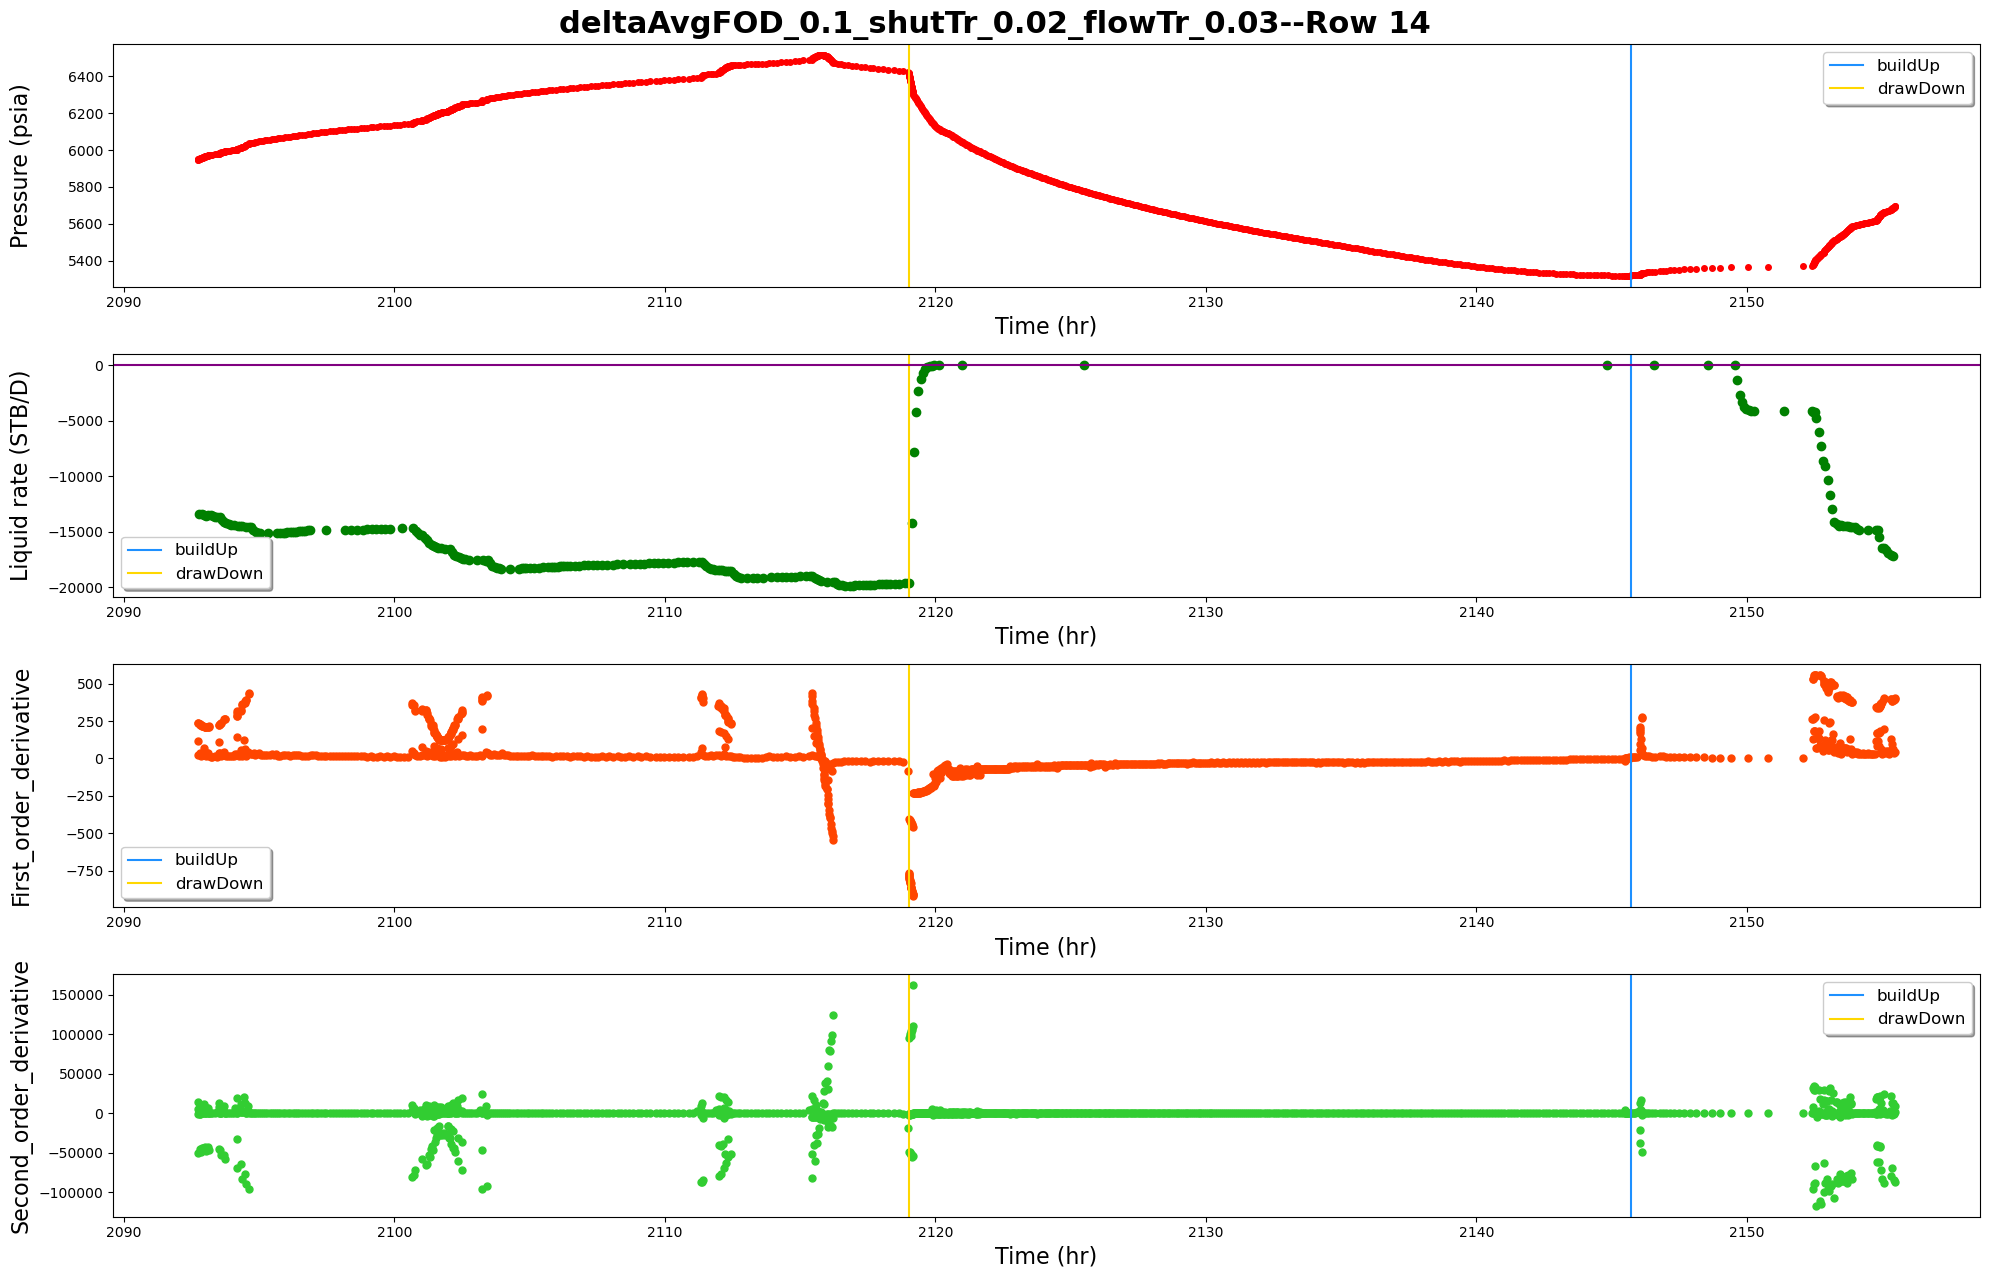

------row 15-----detected points:[17589]


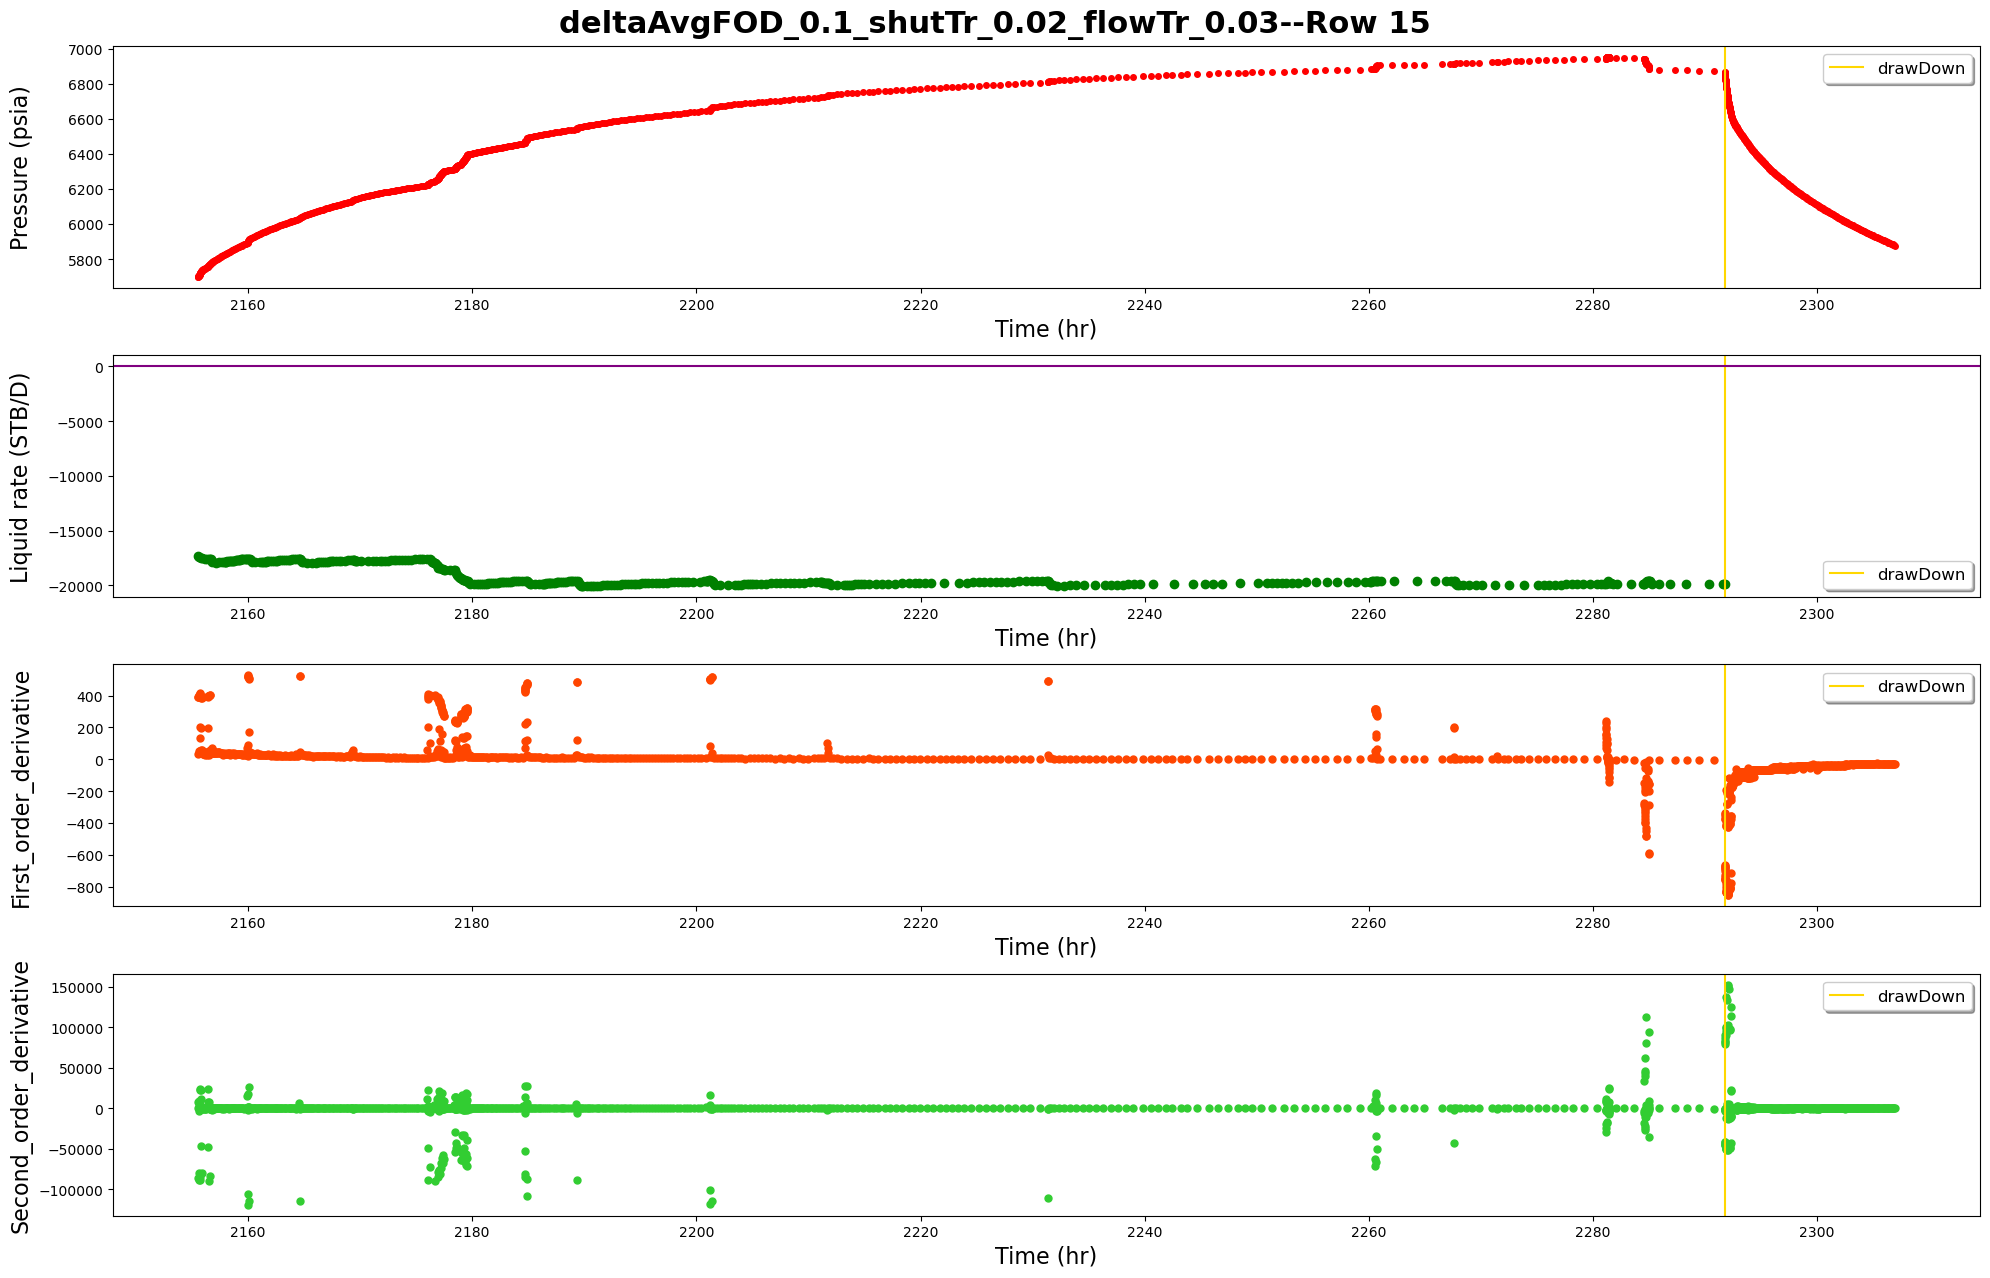

------row 16-----detected points:[18433]


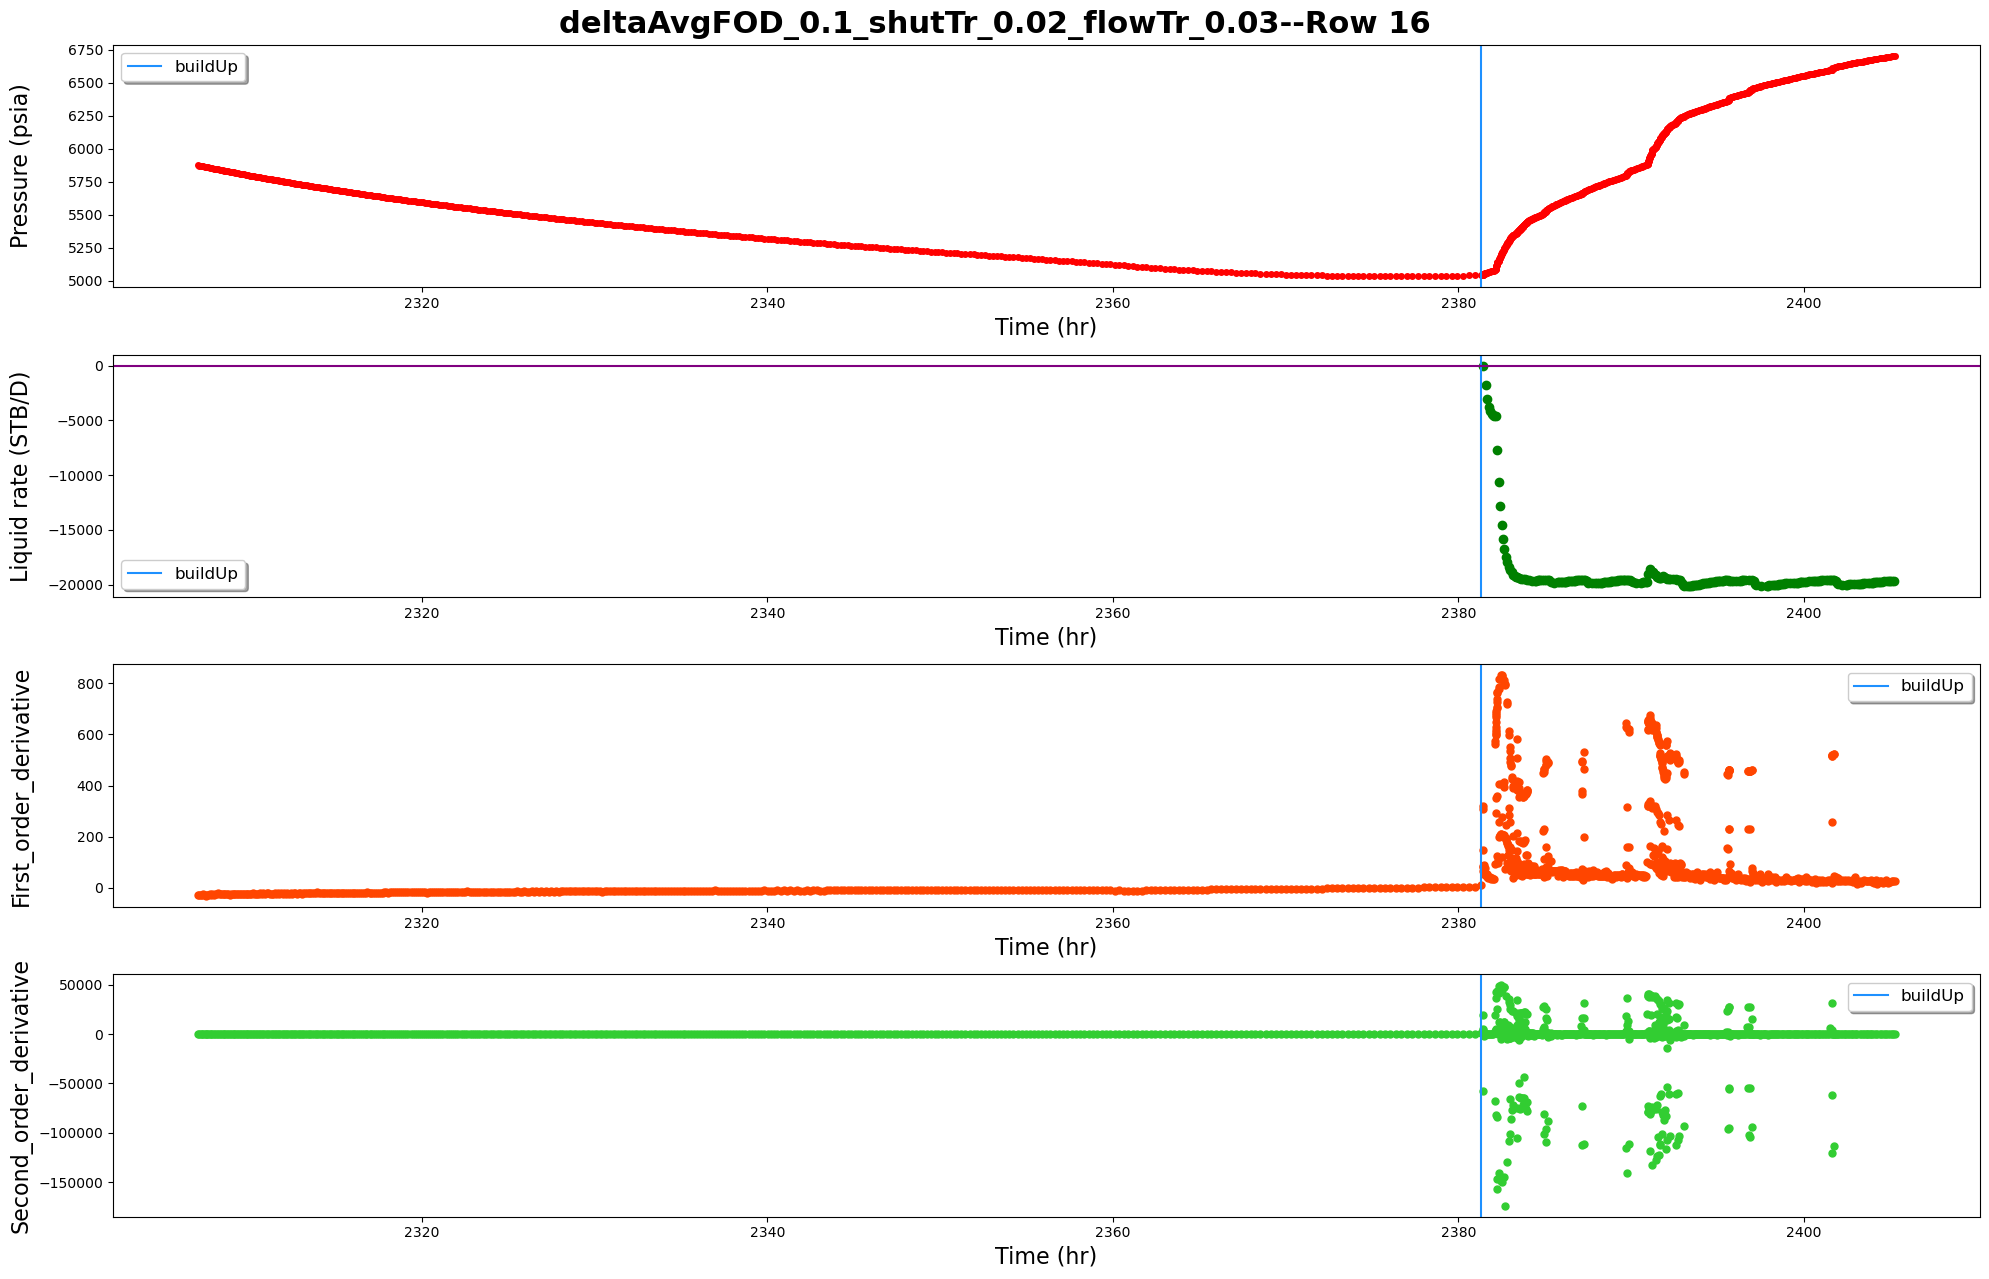

------row 17-----detected points:[19642, 19761, 20013, 20335]


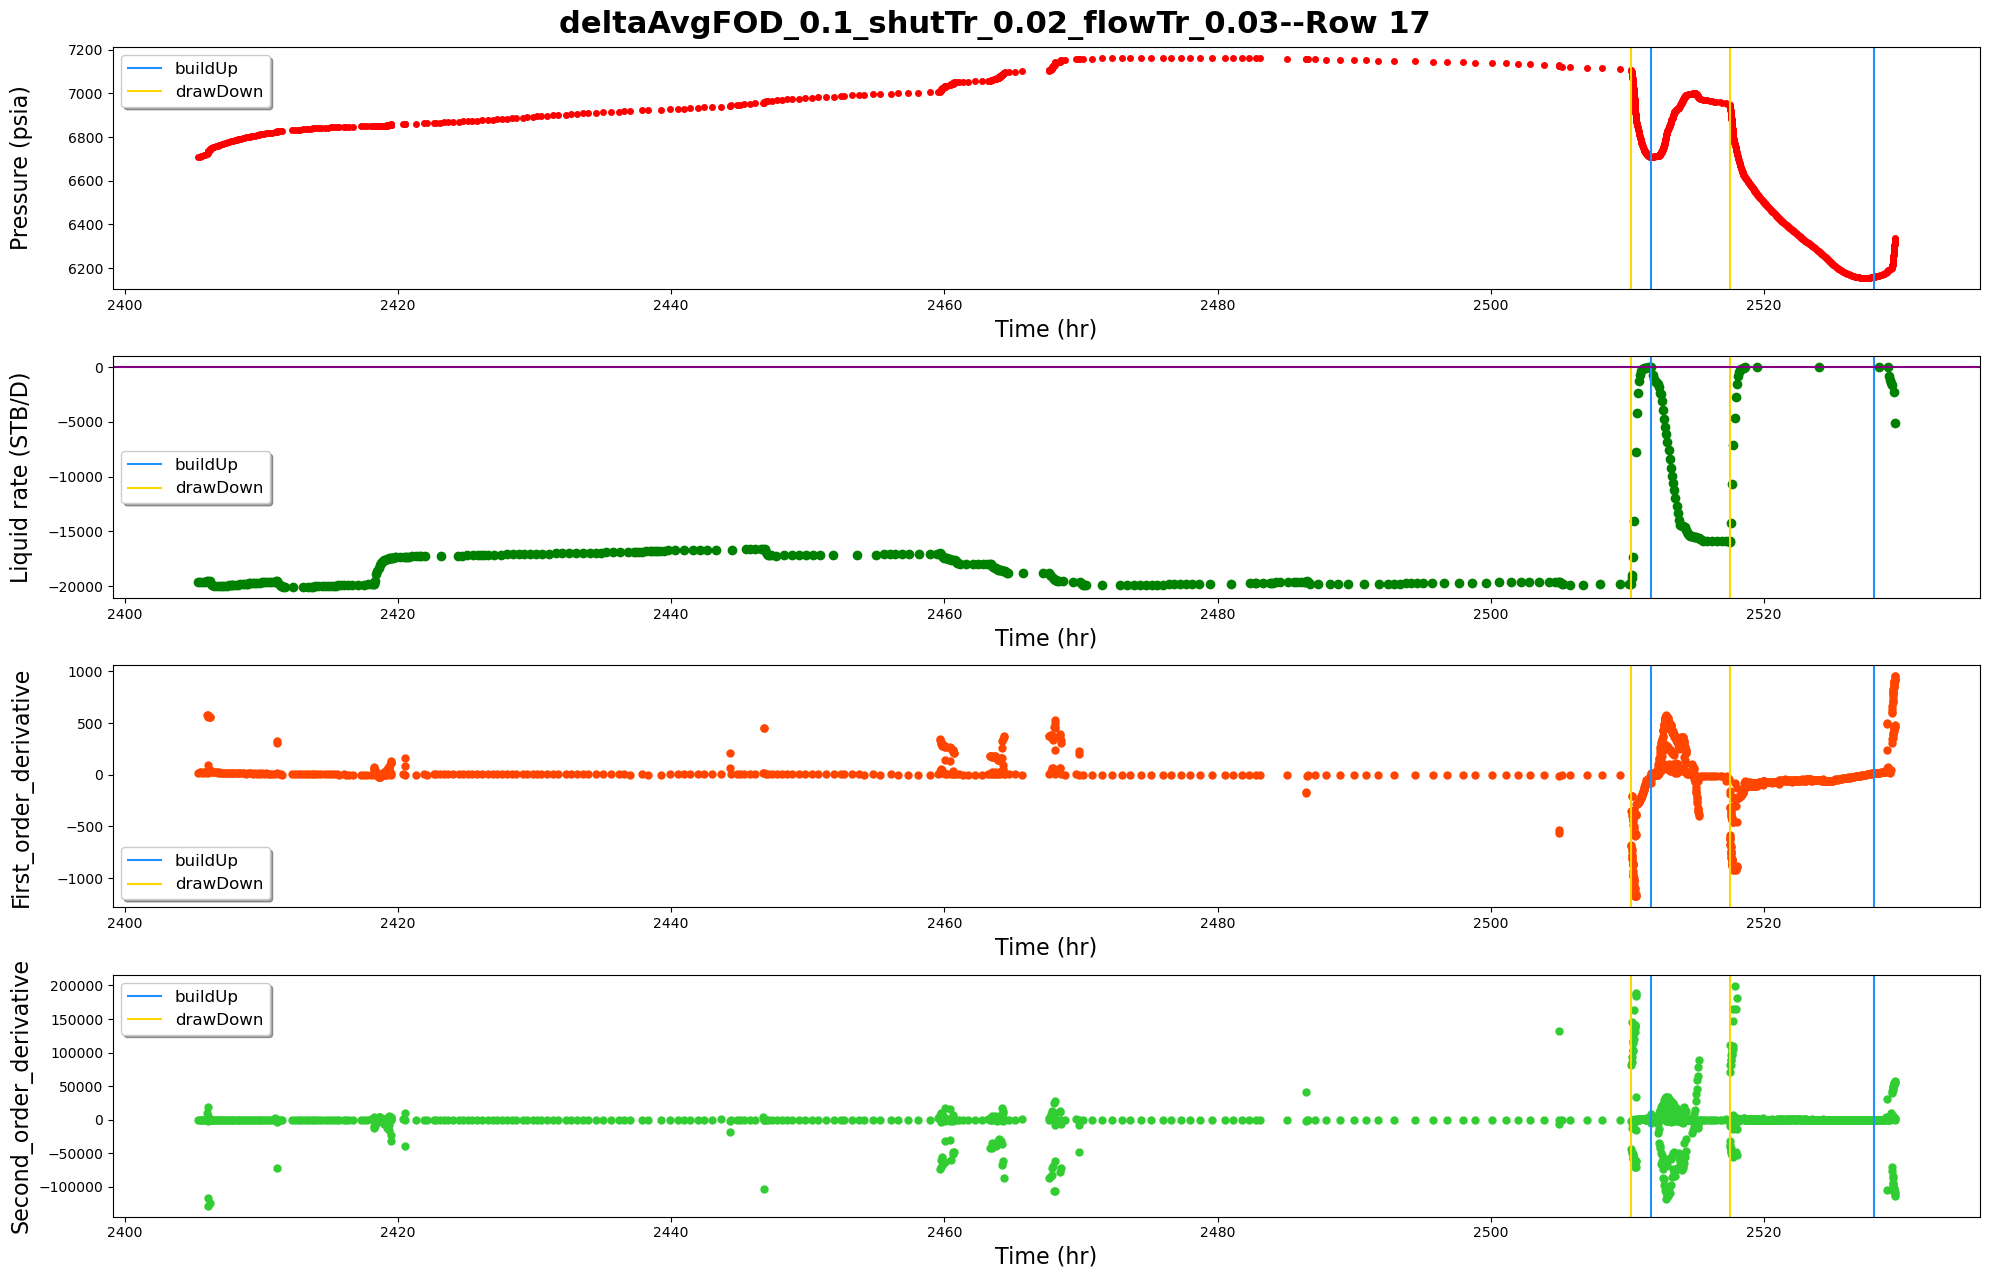

------row 18-----detected points:[20700, 21026]


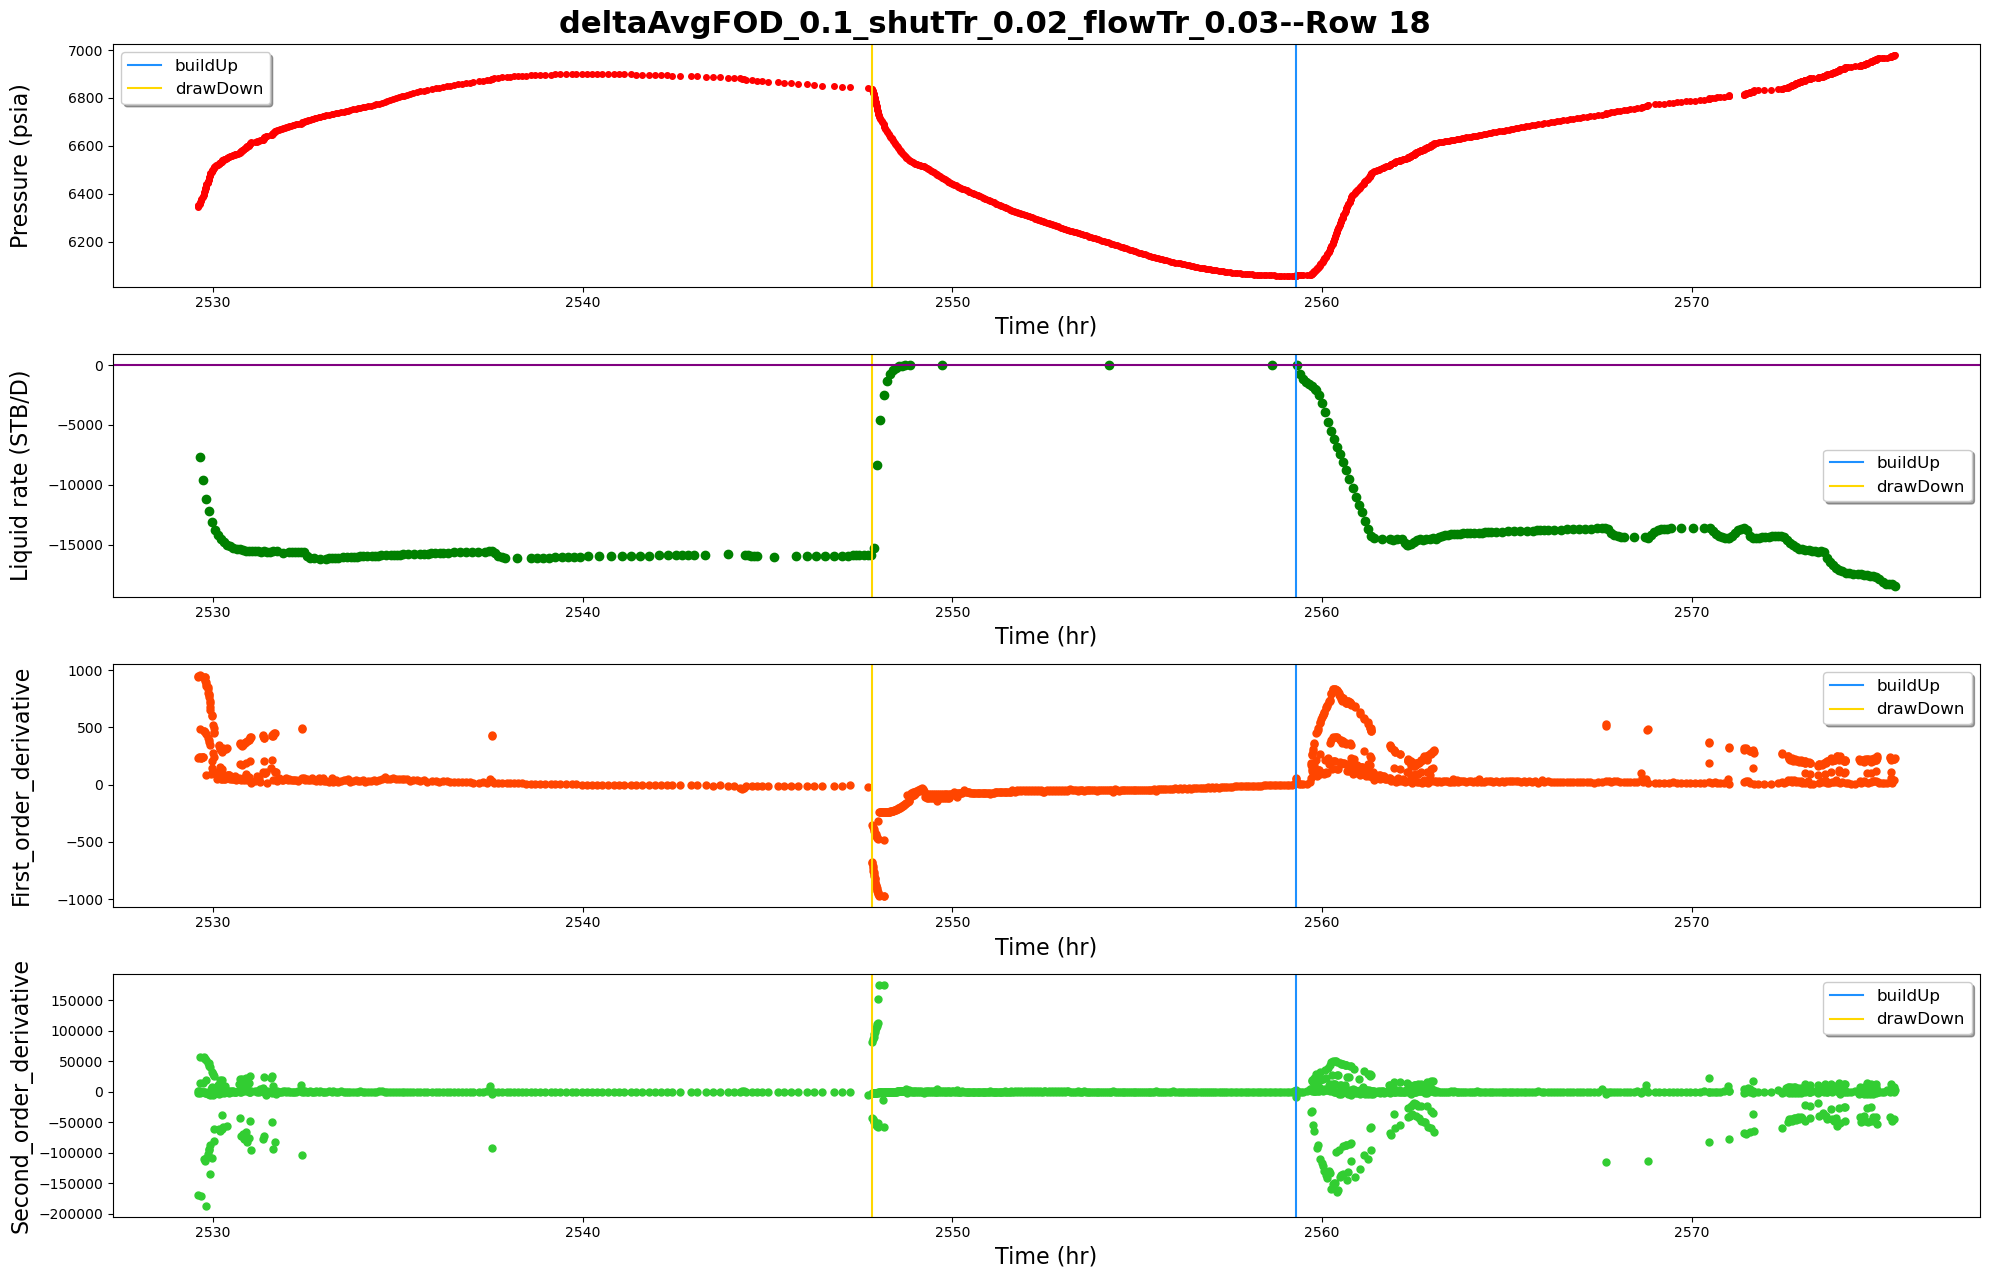

------row 19-----detected points:[21974, 22181, 22709]


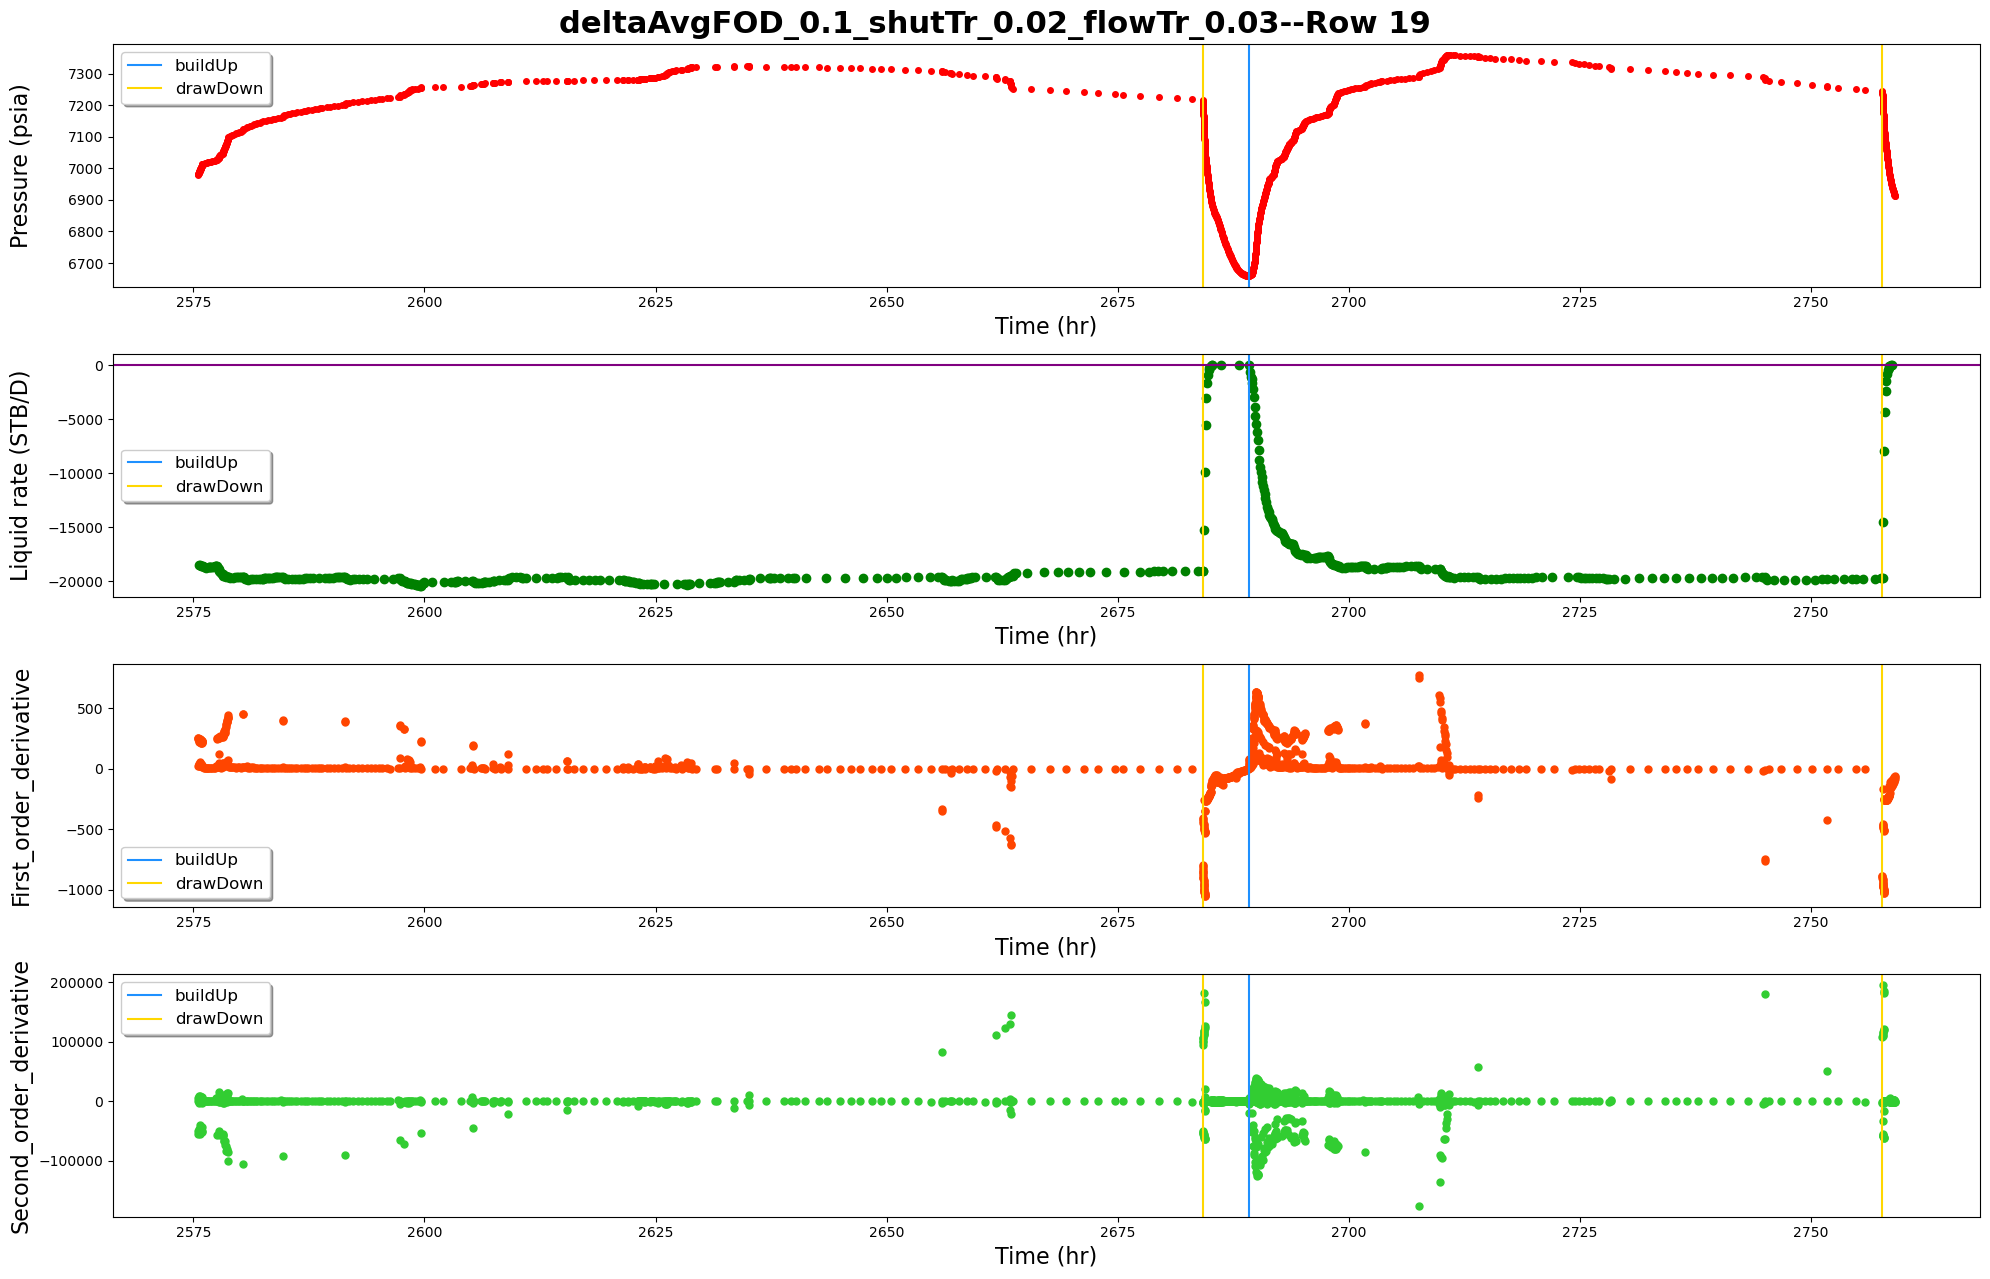

------row 20-----detected points:[23219]


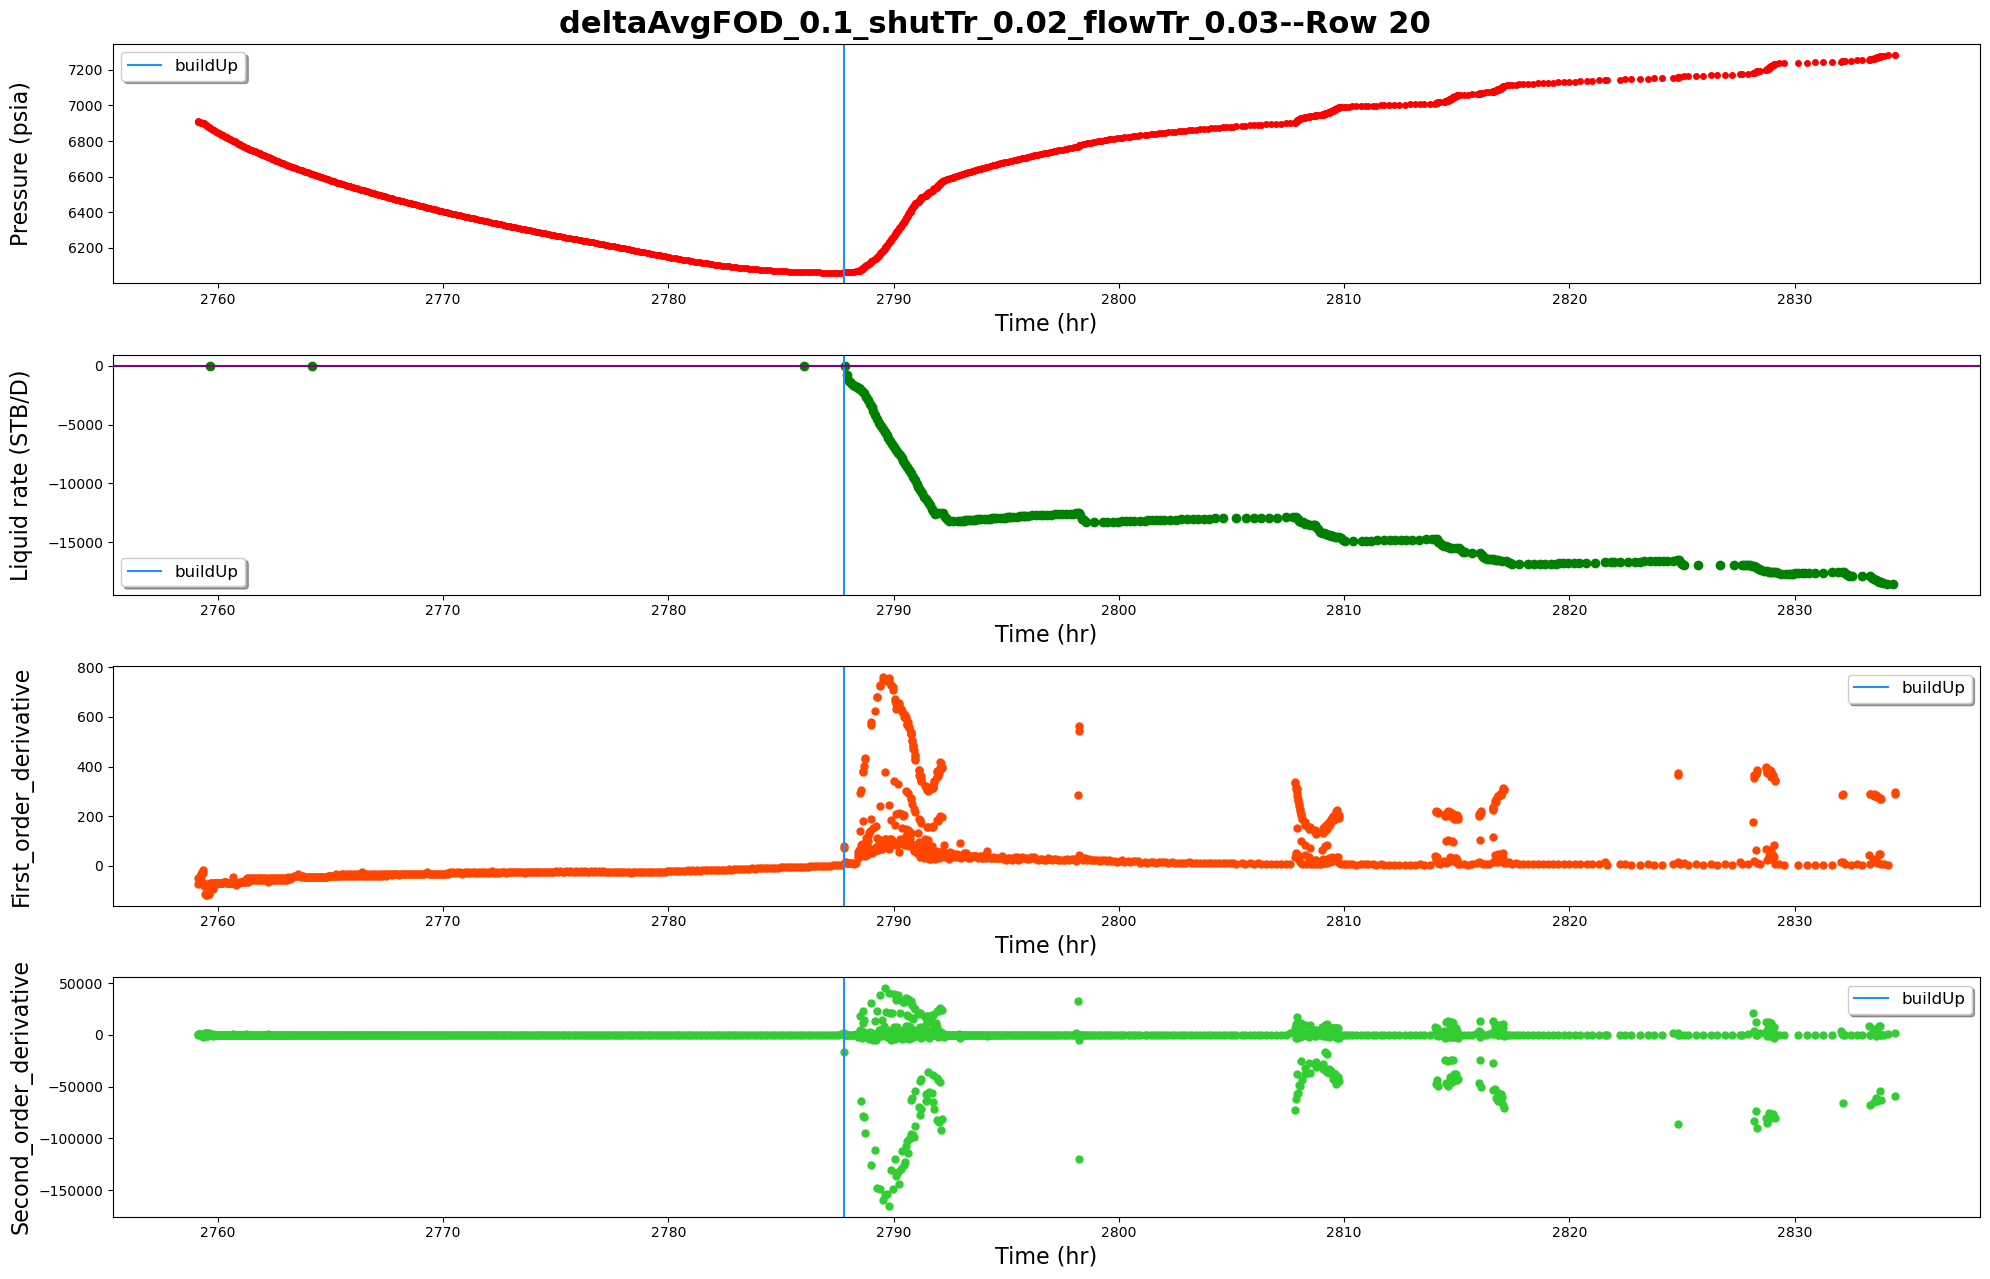

------row 21-----detected points:[24215, 24675]


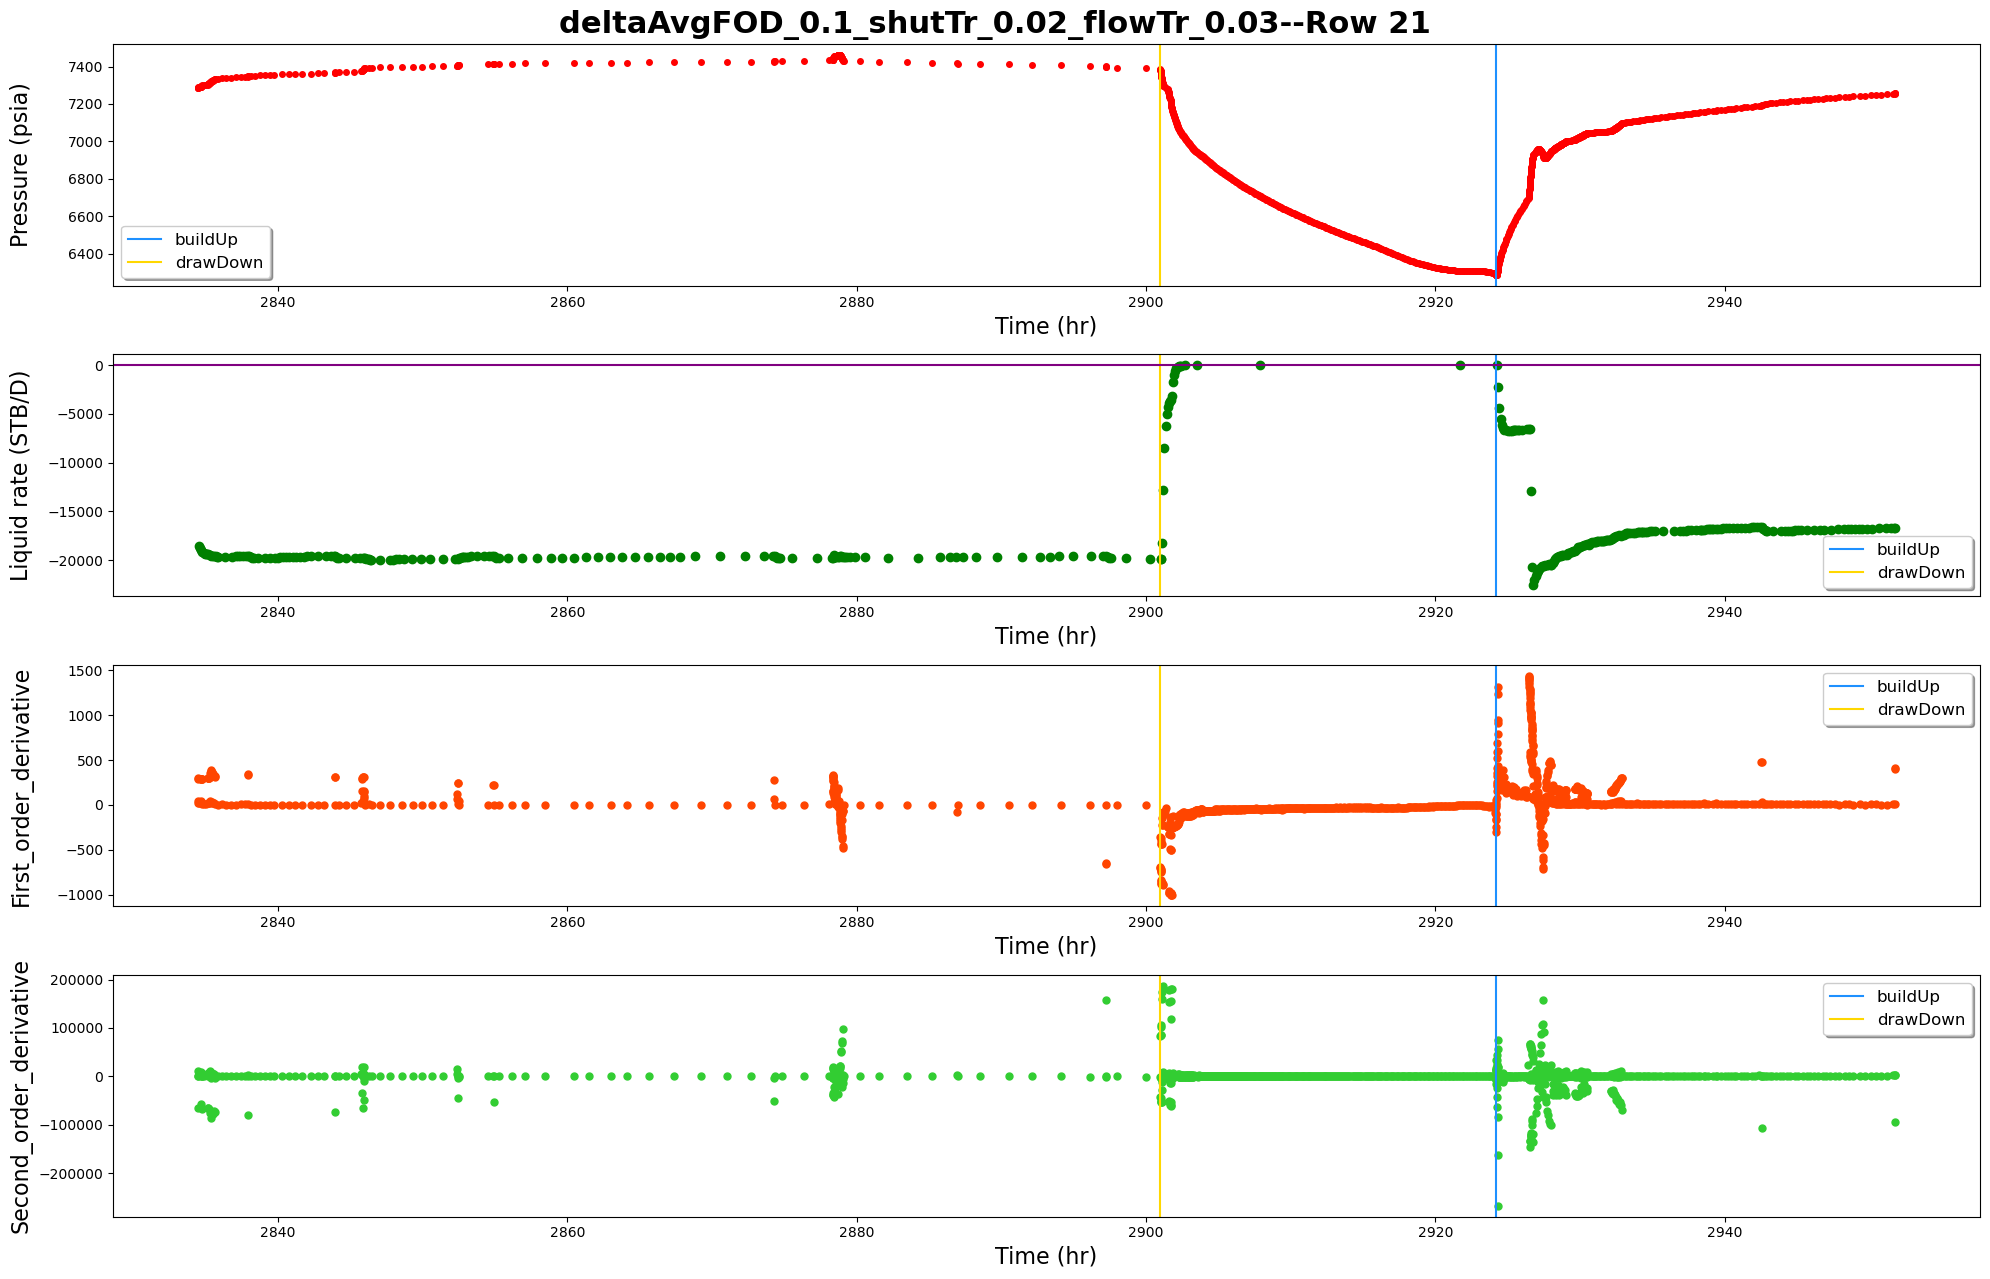

------row 22-----detected points:[25750, 25991]


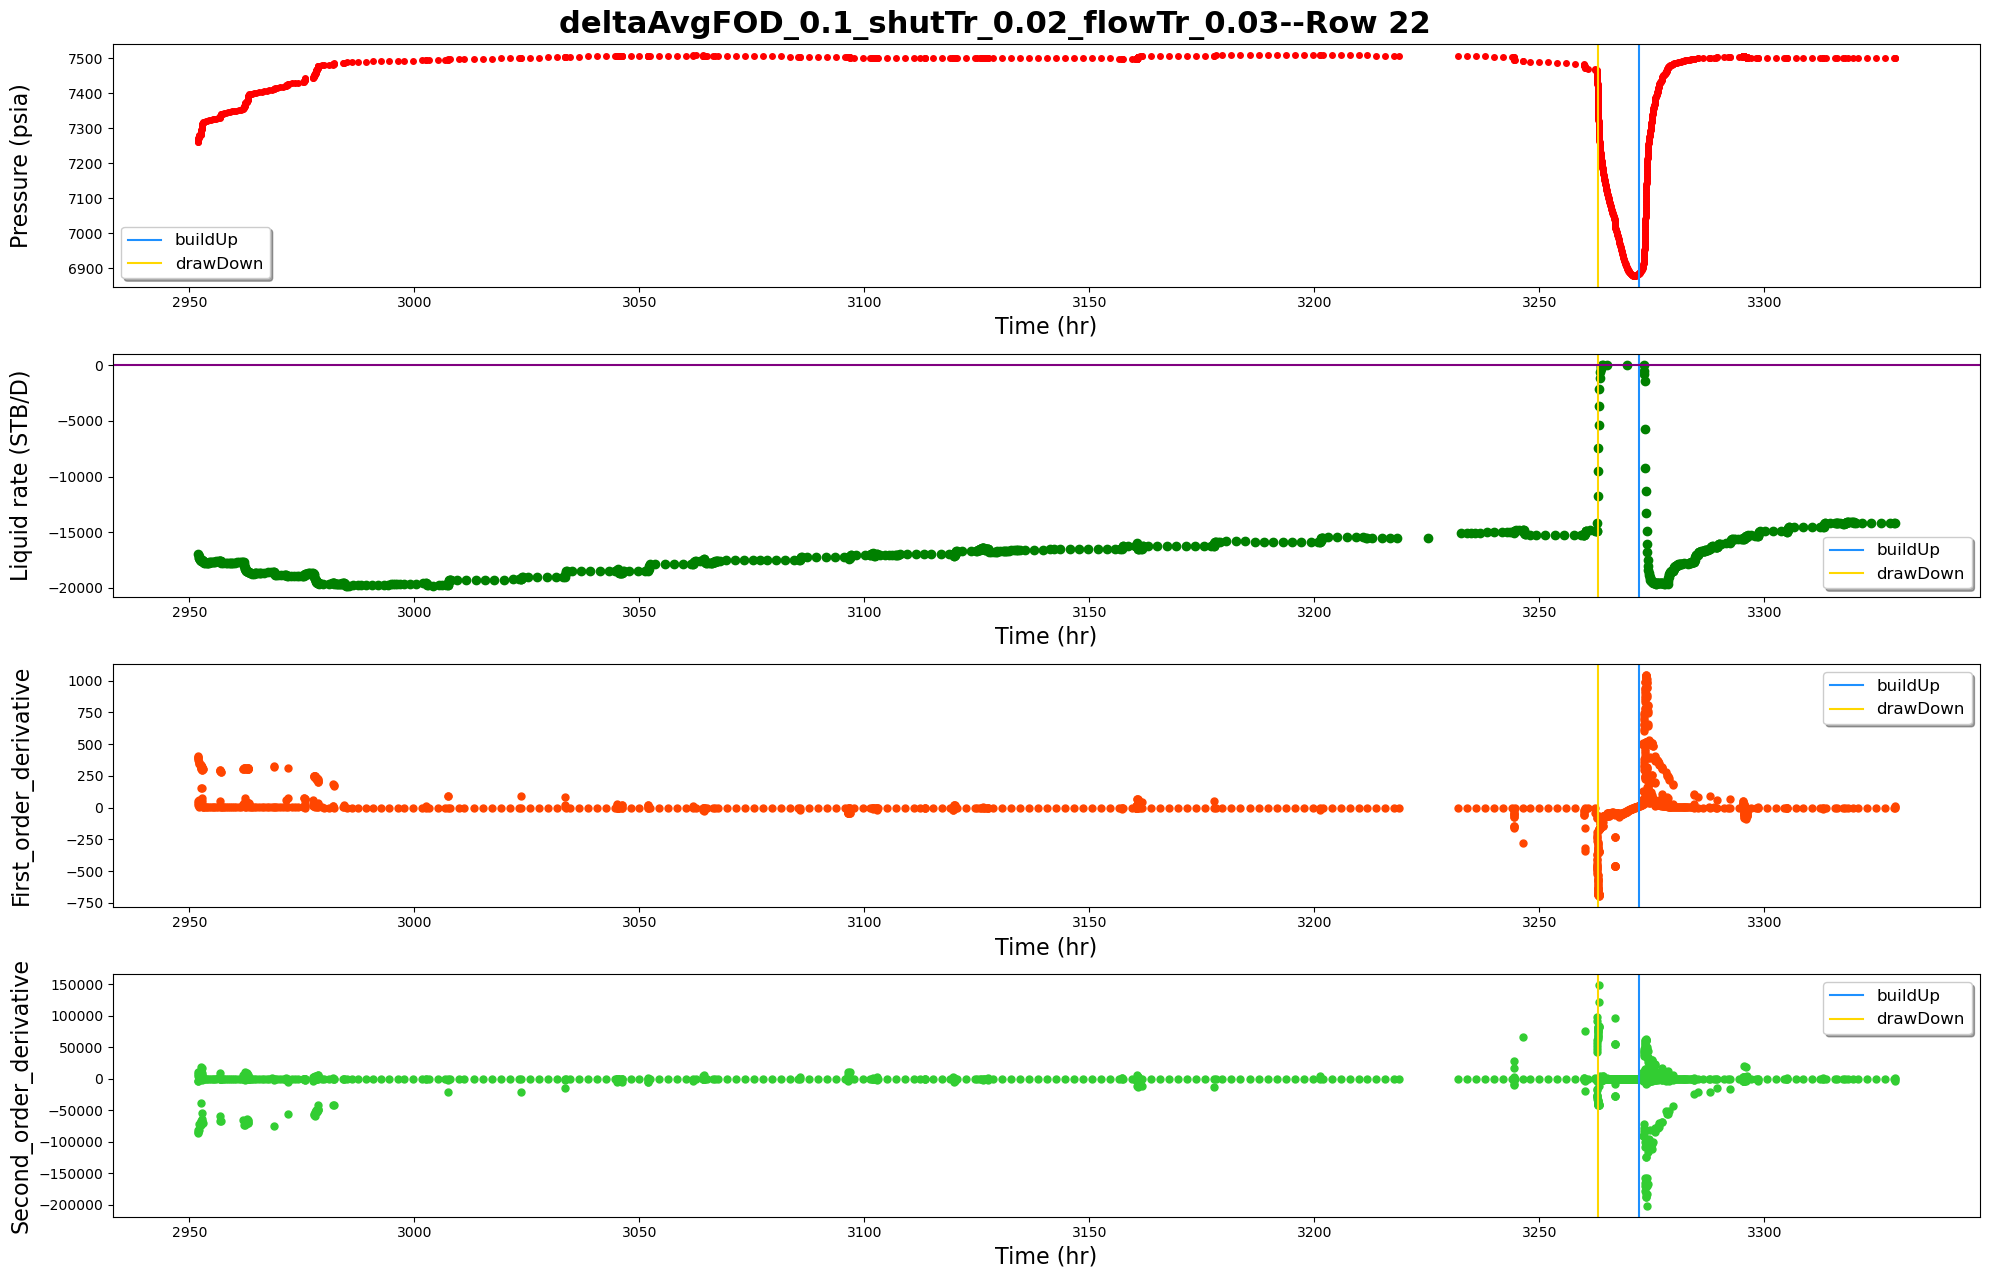

------row 23-----detected points:[26675, 26755, 27025, 27315]


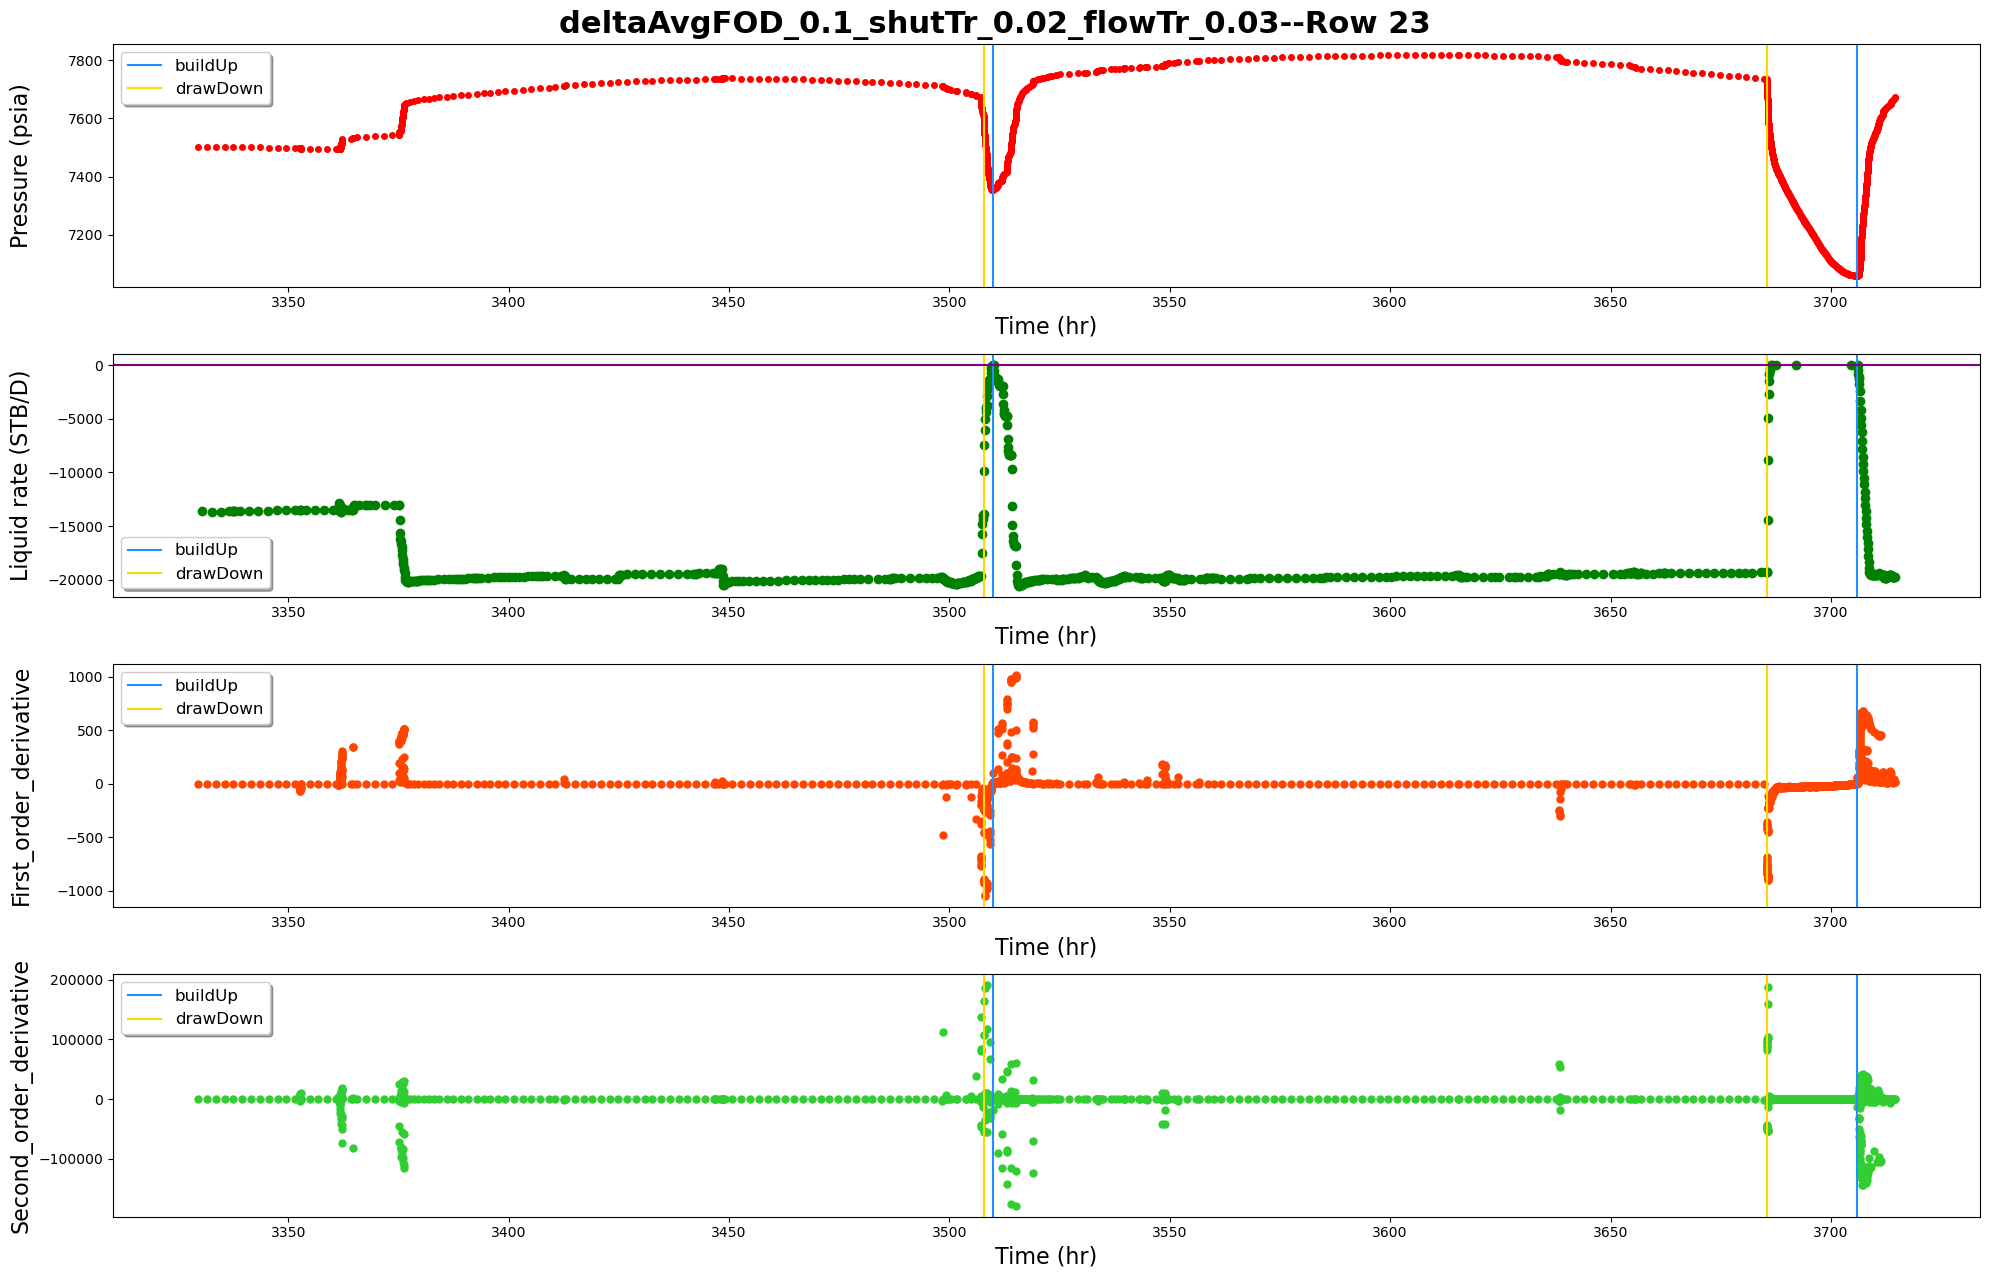

------row 24-----detected points:[27824, 27962, 28290, 28488]


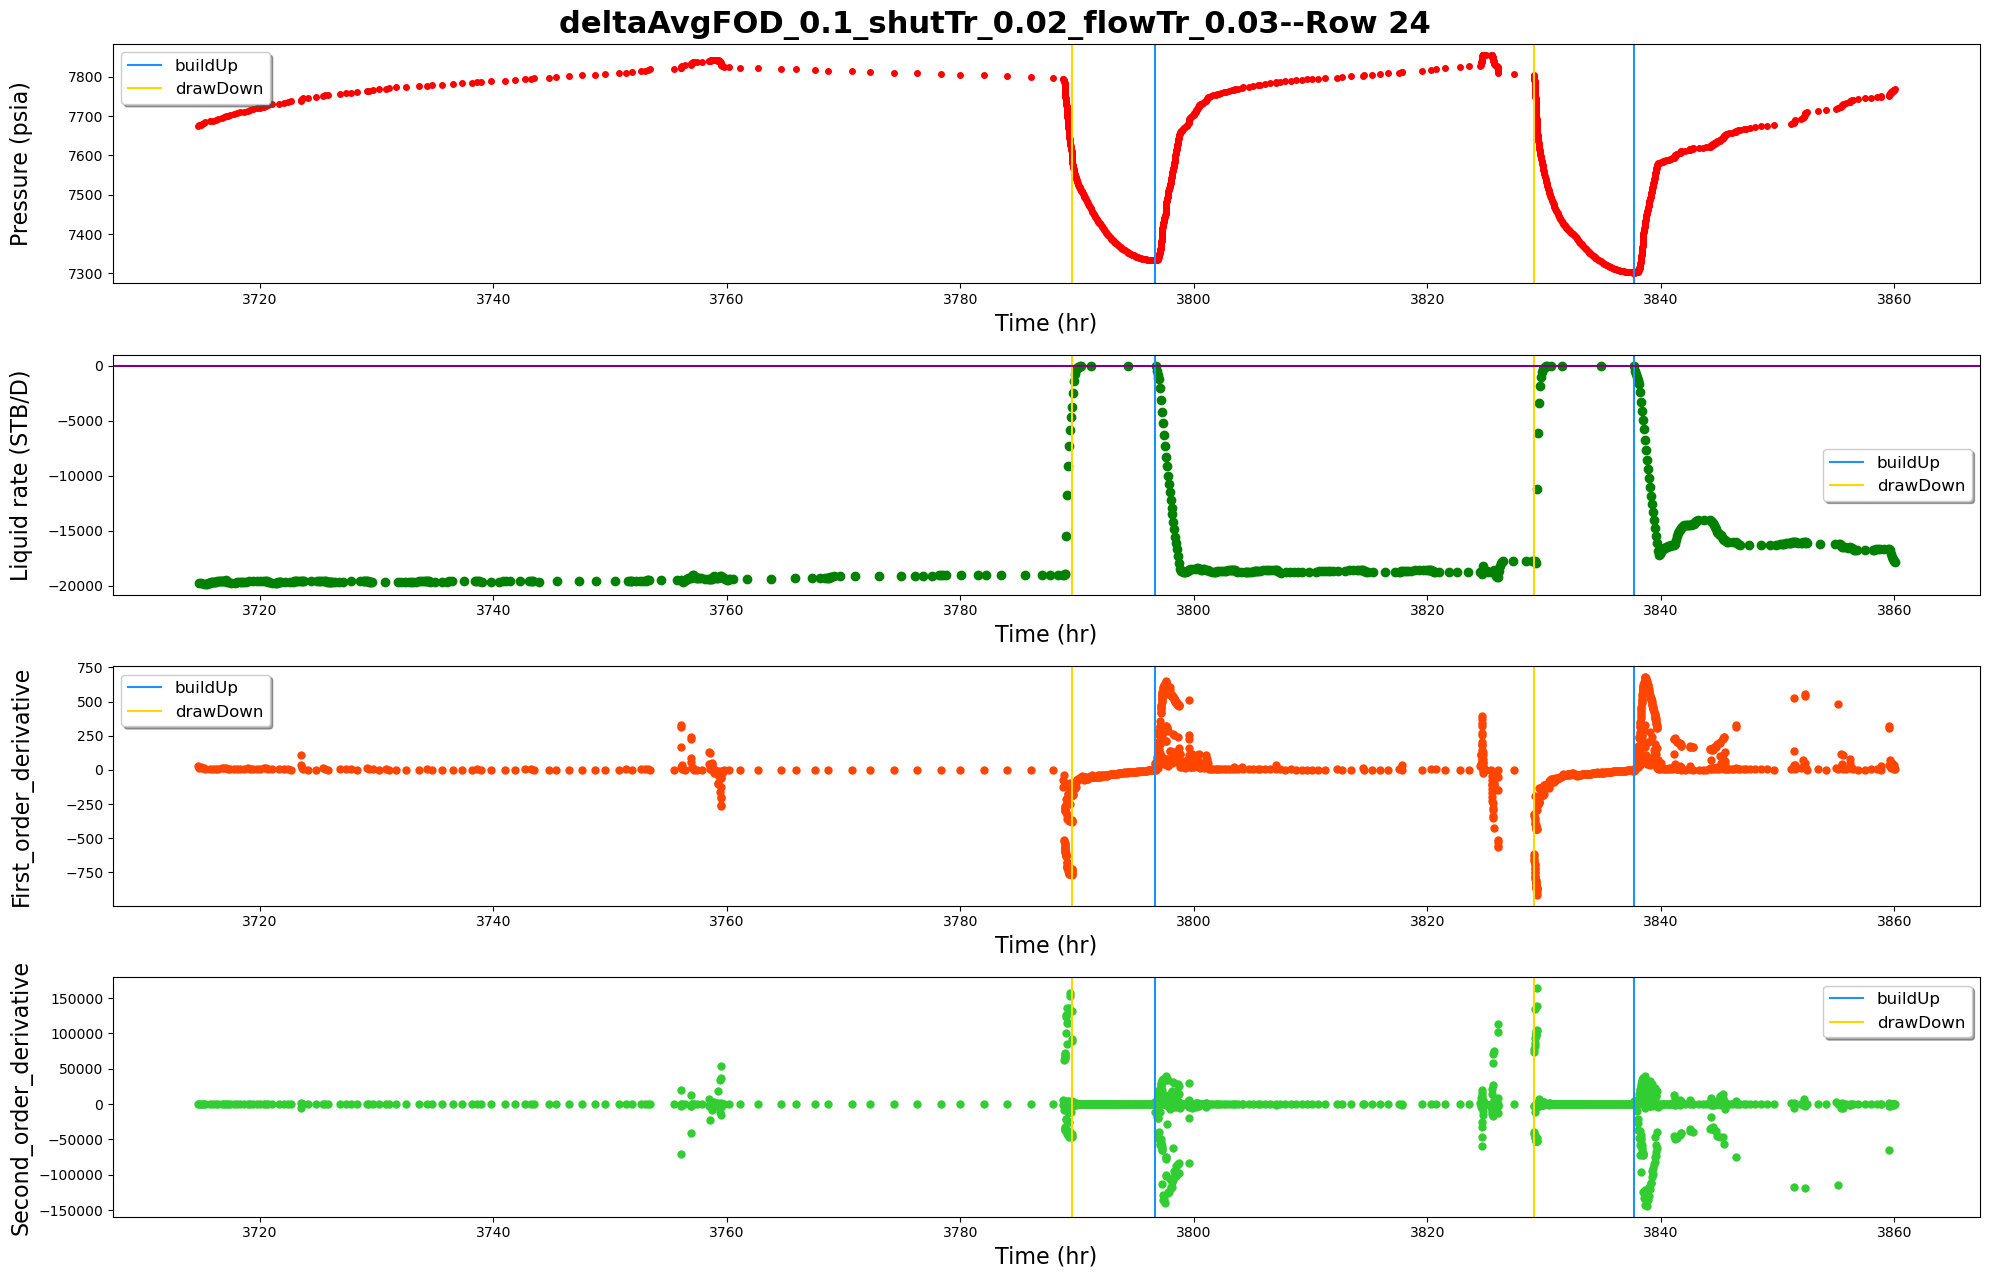

------row 25-----detected points:[28840, 29105]


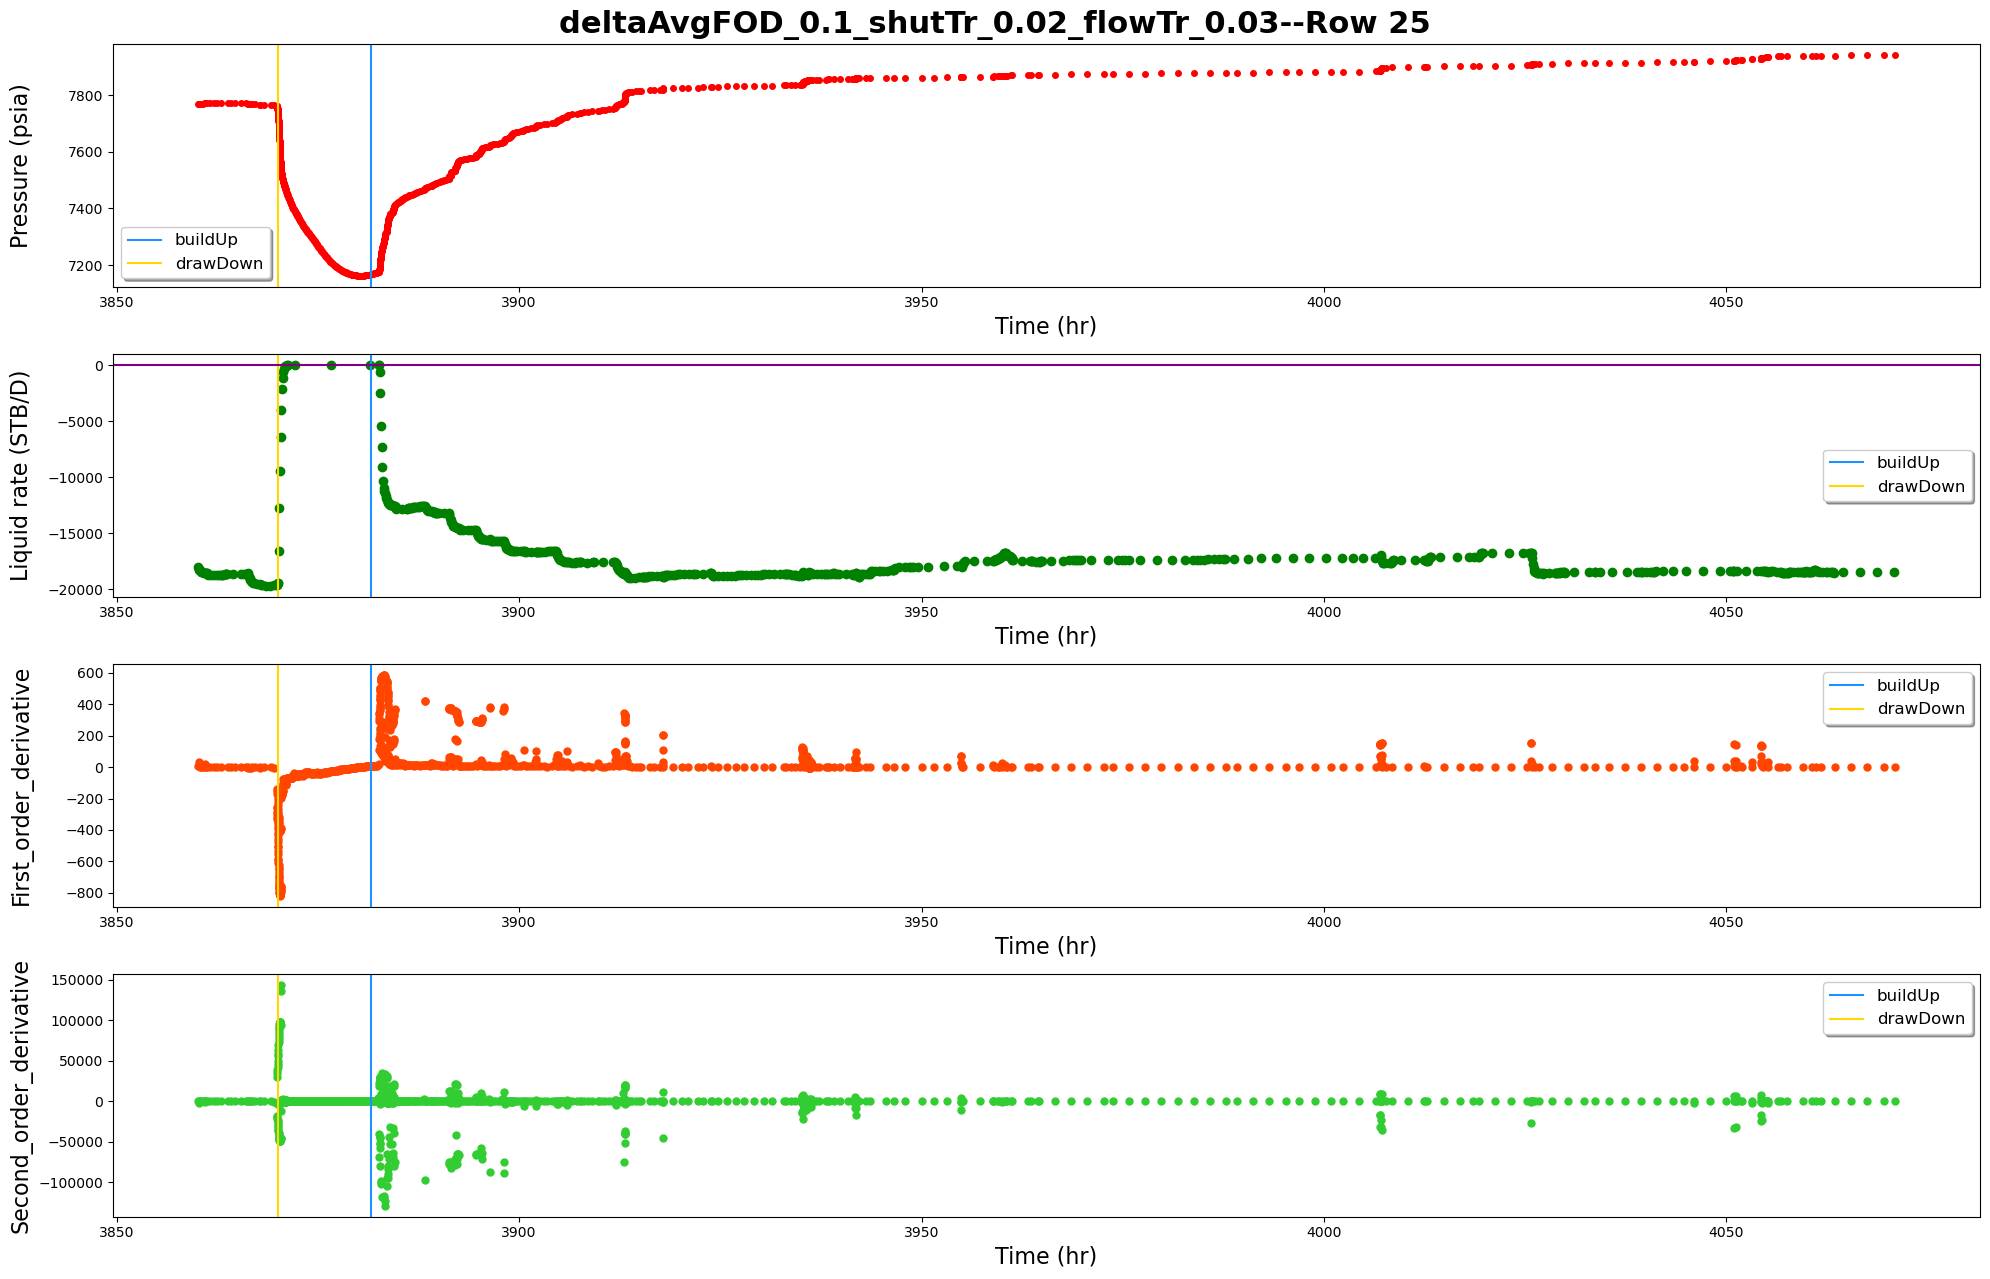

In [7]:
# points_type="allPoints"
points_type="majorTransients"
# parameters={}
parameters={"deltaAvgFOD":deltaDerivative_tuning,
            "shutTr":minor_threshold_shutIn,
           "flowTr":minor_threshold_Flowing}
detect_points_dict={"buildUp":transients.major_buildUp,
                   "drawDown":transients.major_drawDown}

buildup=detect_points_dict["buildUp"]
drawdown=detect_points_dict["drawDown"]
txt=f"buildup:{len(buildup)}, drawdown:{len(drawdown)}"
pprint(txt)
plot_whole=True
plot_details=True
plot_statistics=False
save=True
folder_name=f"{method}/{points_type}/pointHalfWin_{point_halfWindow}_timeStep_{time_step}"
# folder_name="removed_transients"
%run plot_N_save.ipynb

# plot periods & multi rate break points

'buildup:171, drawdown:31'
---initializing...
---plotting...


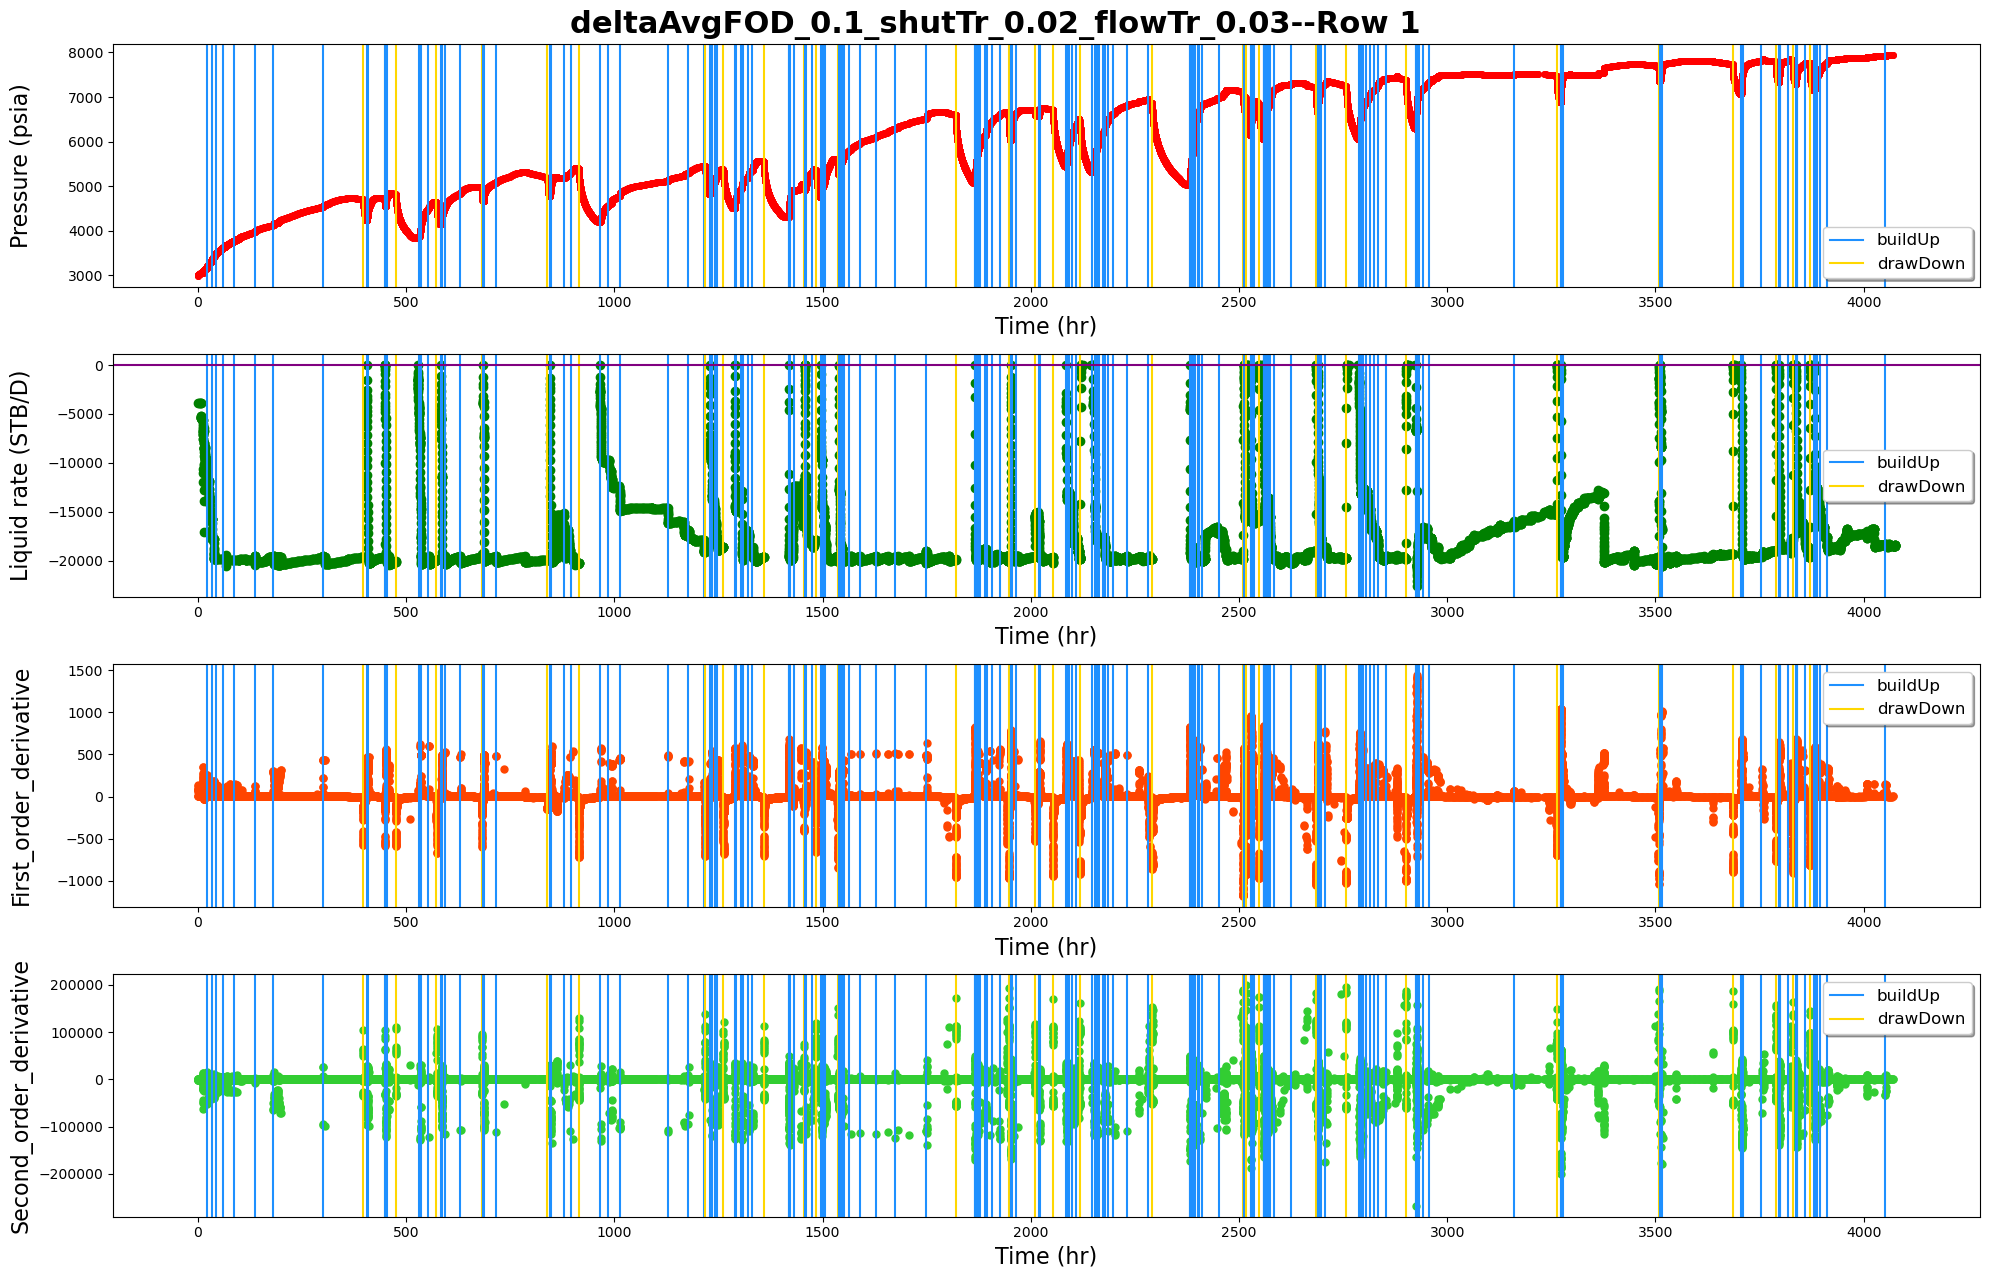

save whole....
detected 202 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[393, 574, 812, 1160]


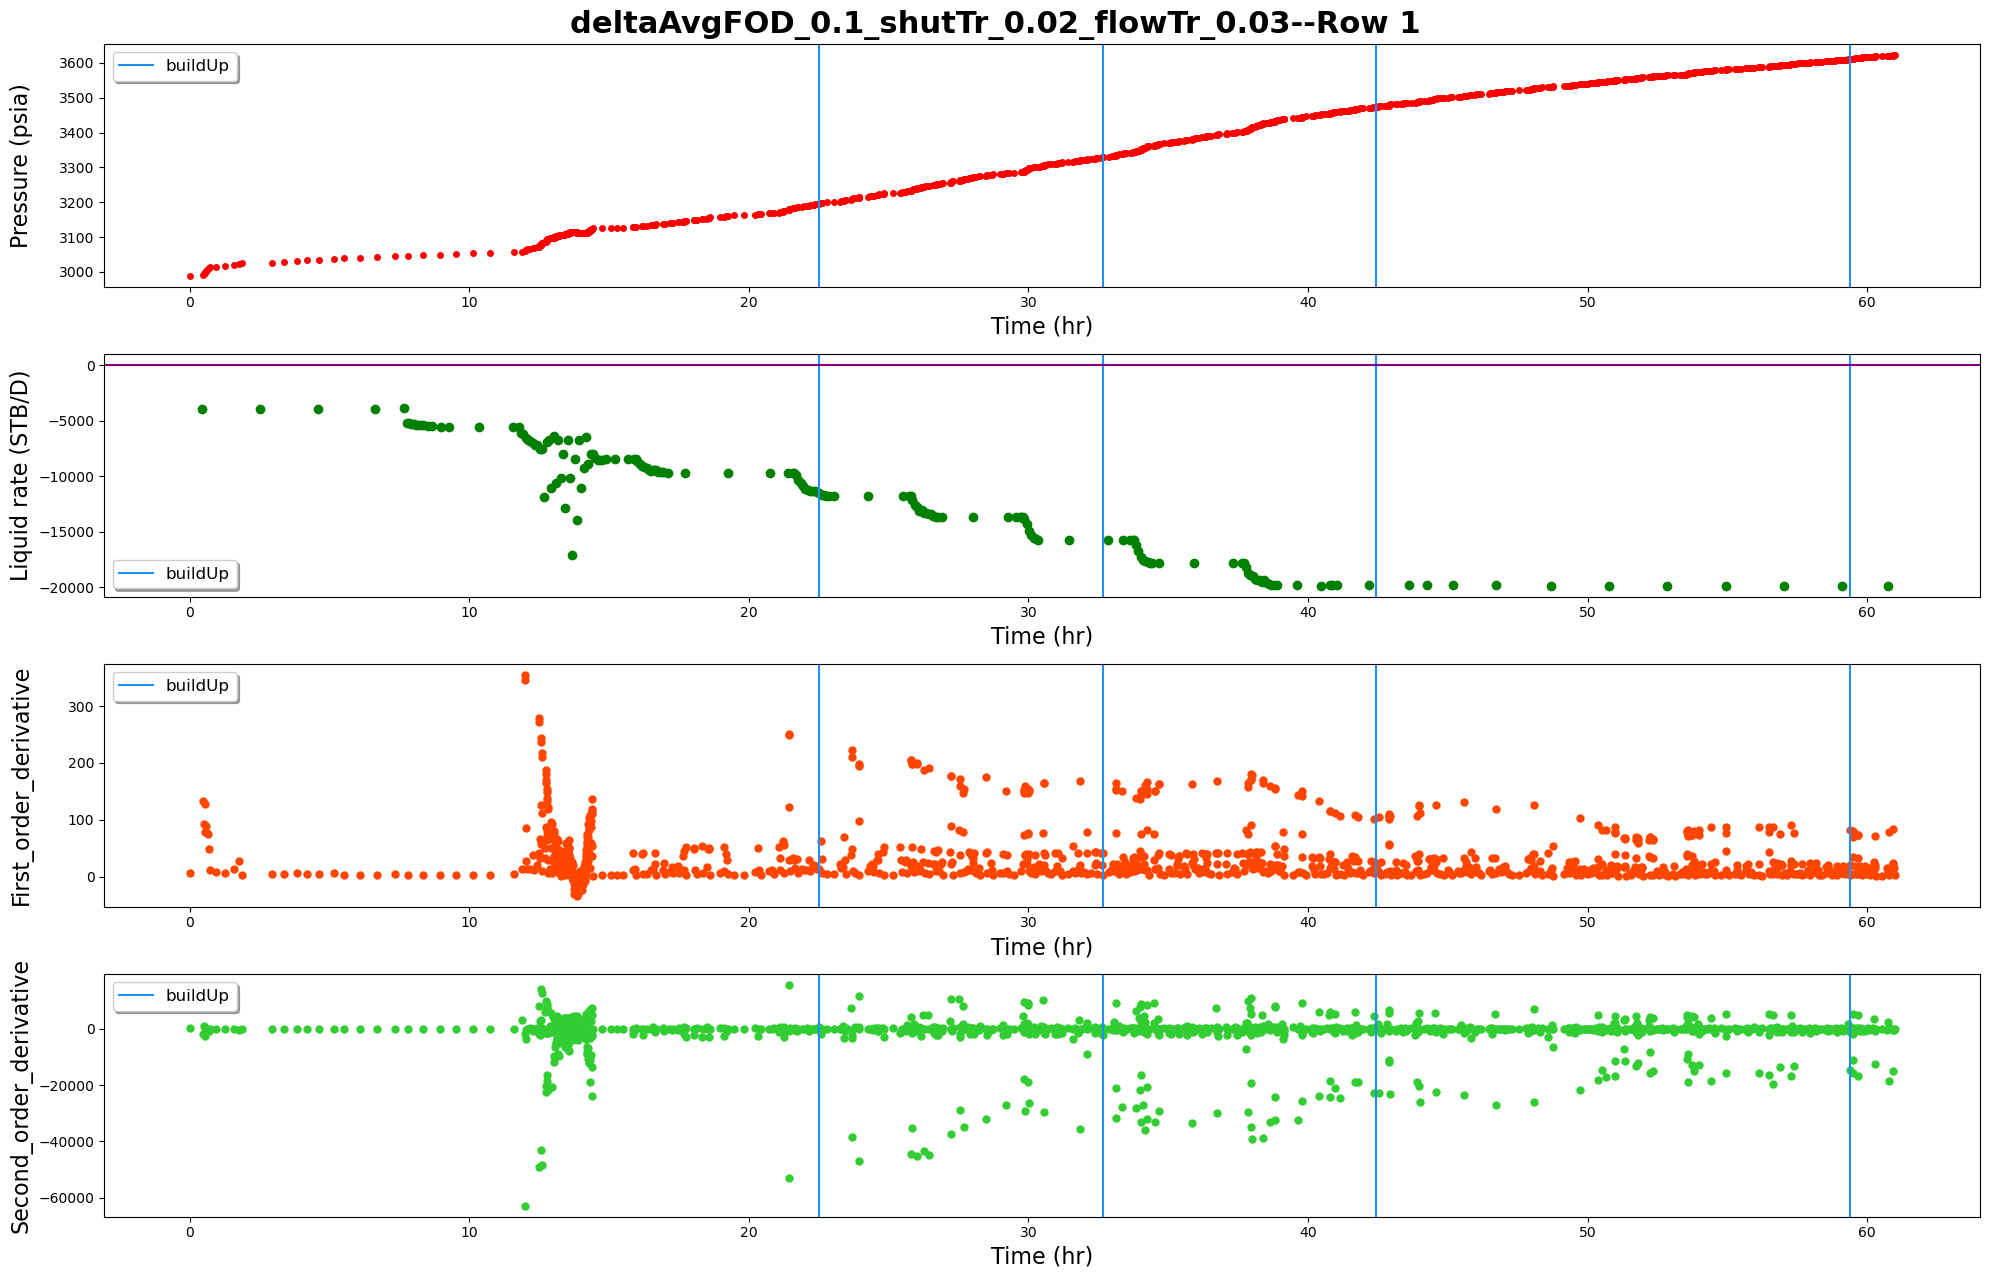

------row 2-----detected points:[1537, 1727, 1814, 2114, 2248]


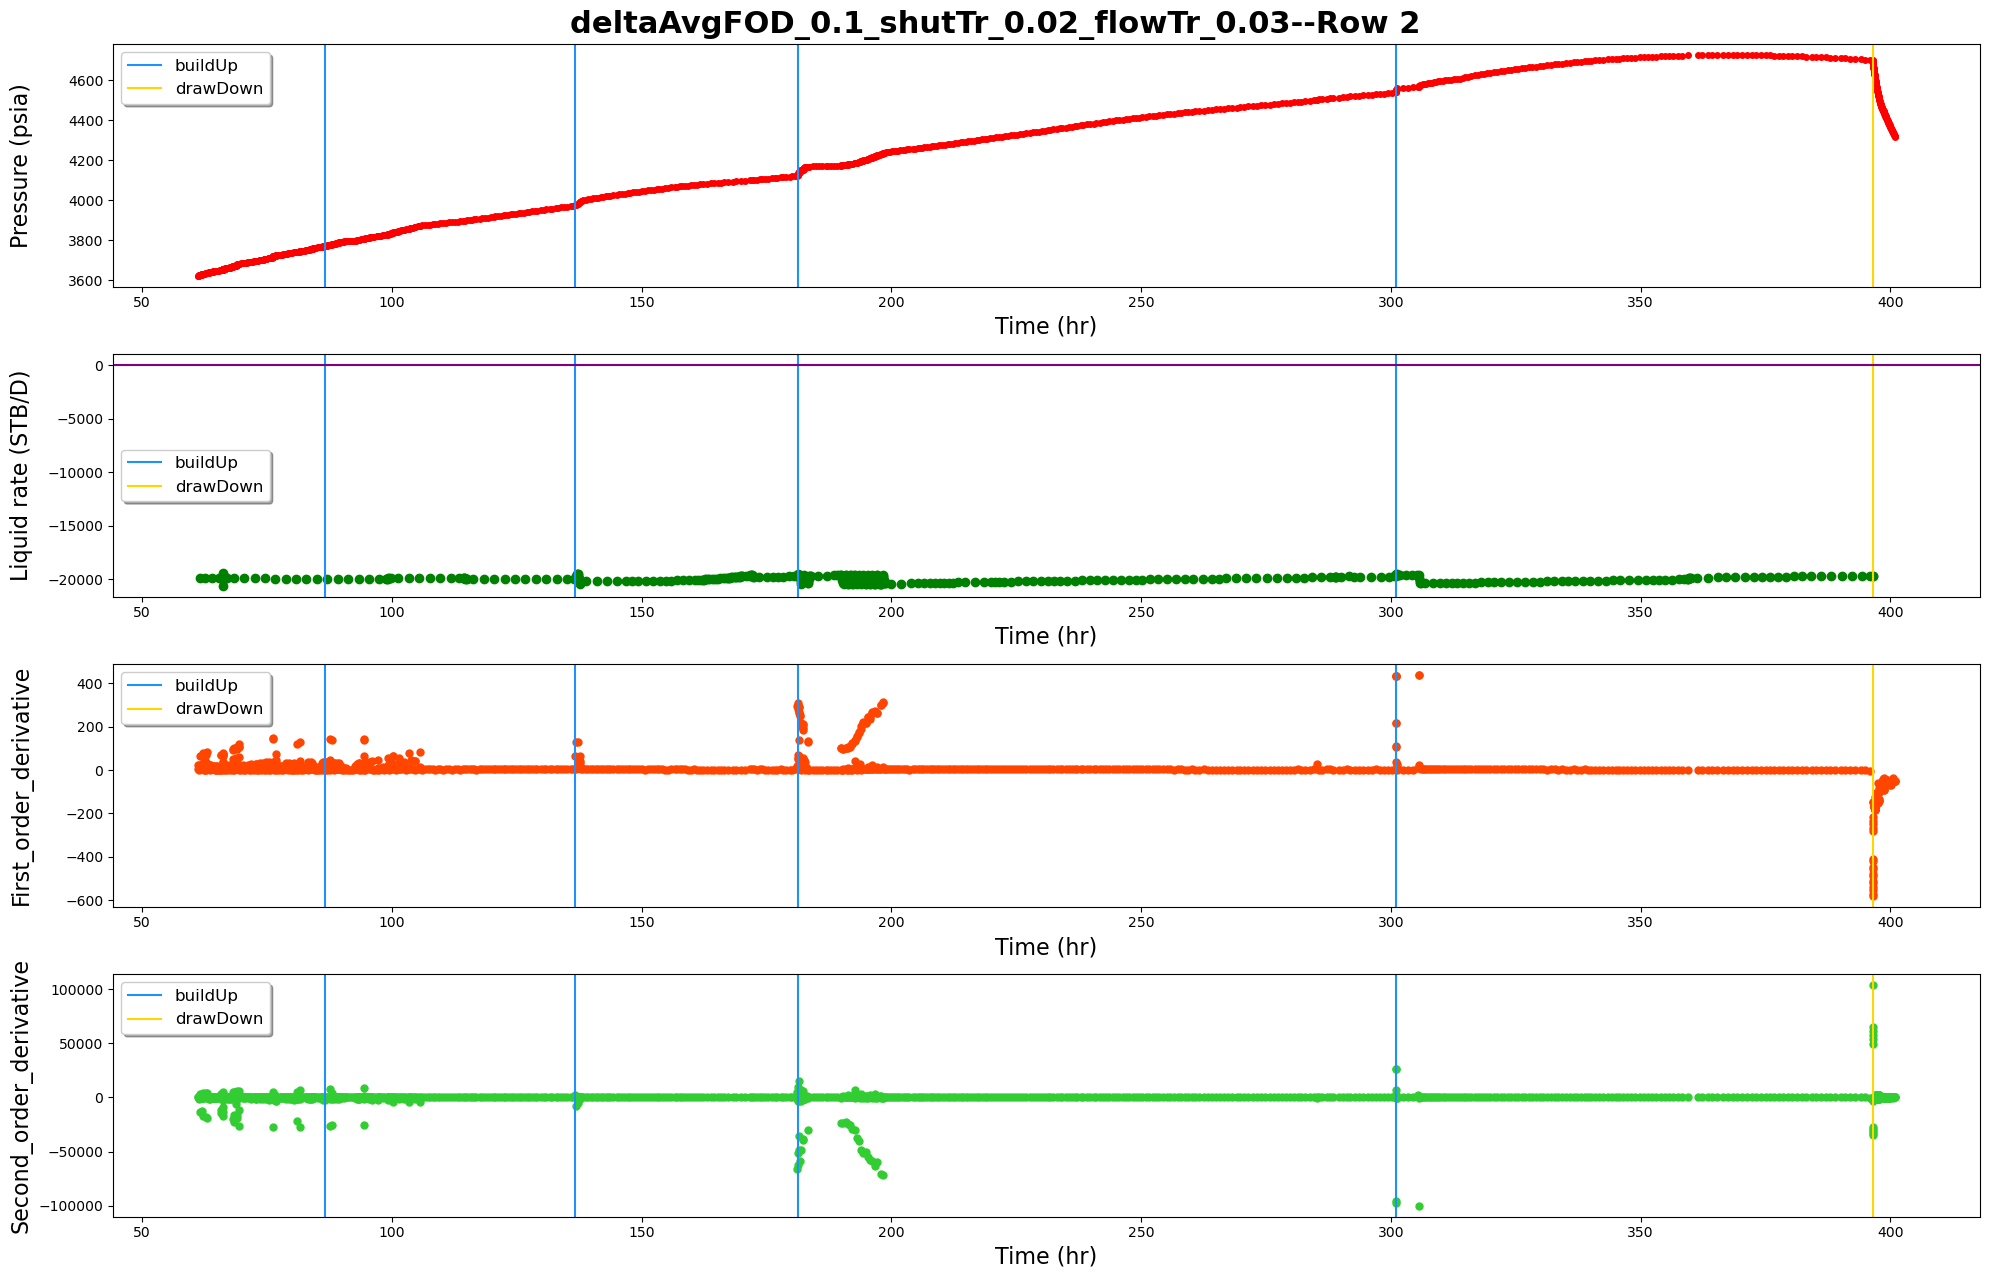

------row 3-----detected points:[2467, 2604, 2804, 2876, 2987, 3095, 3590]


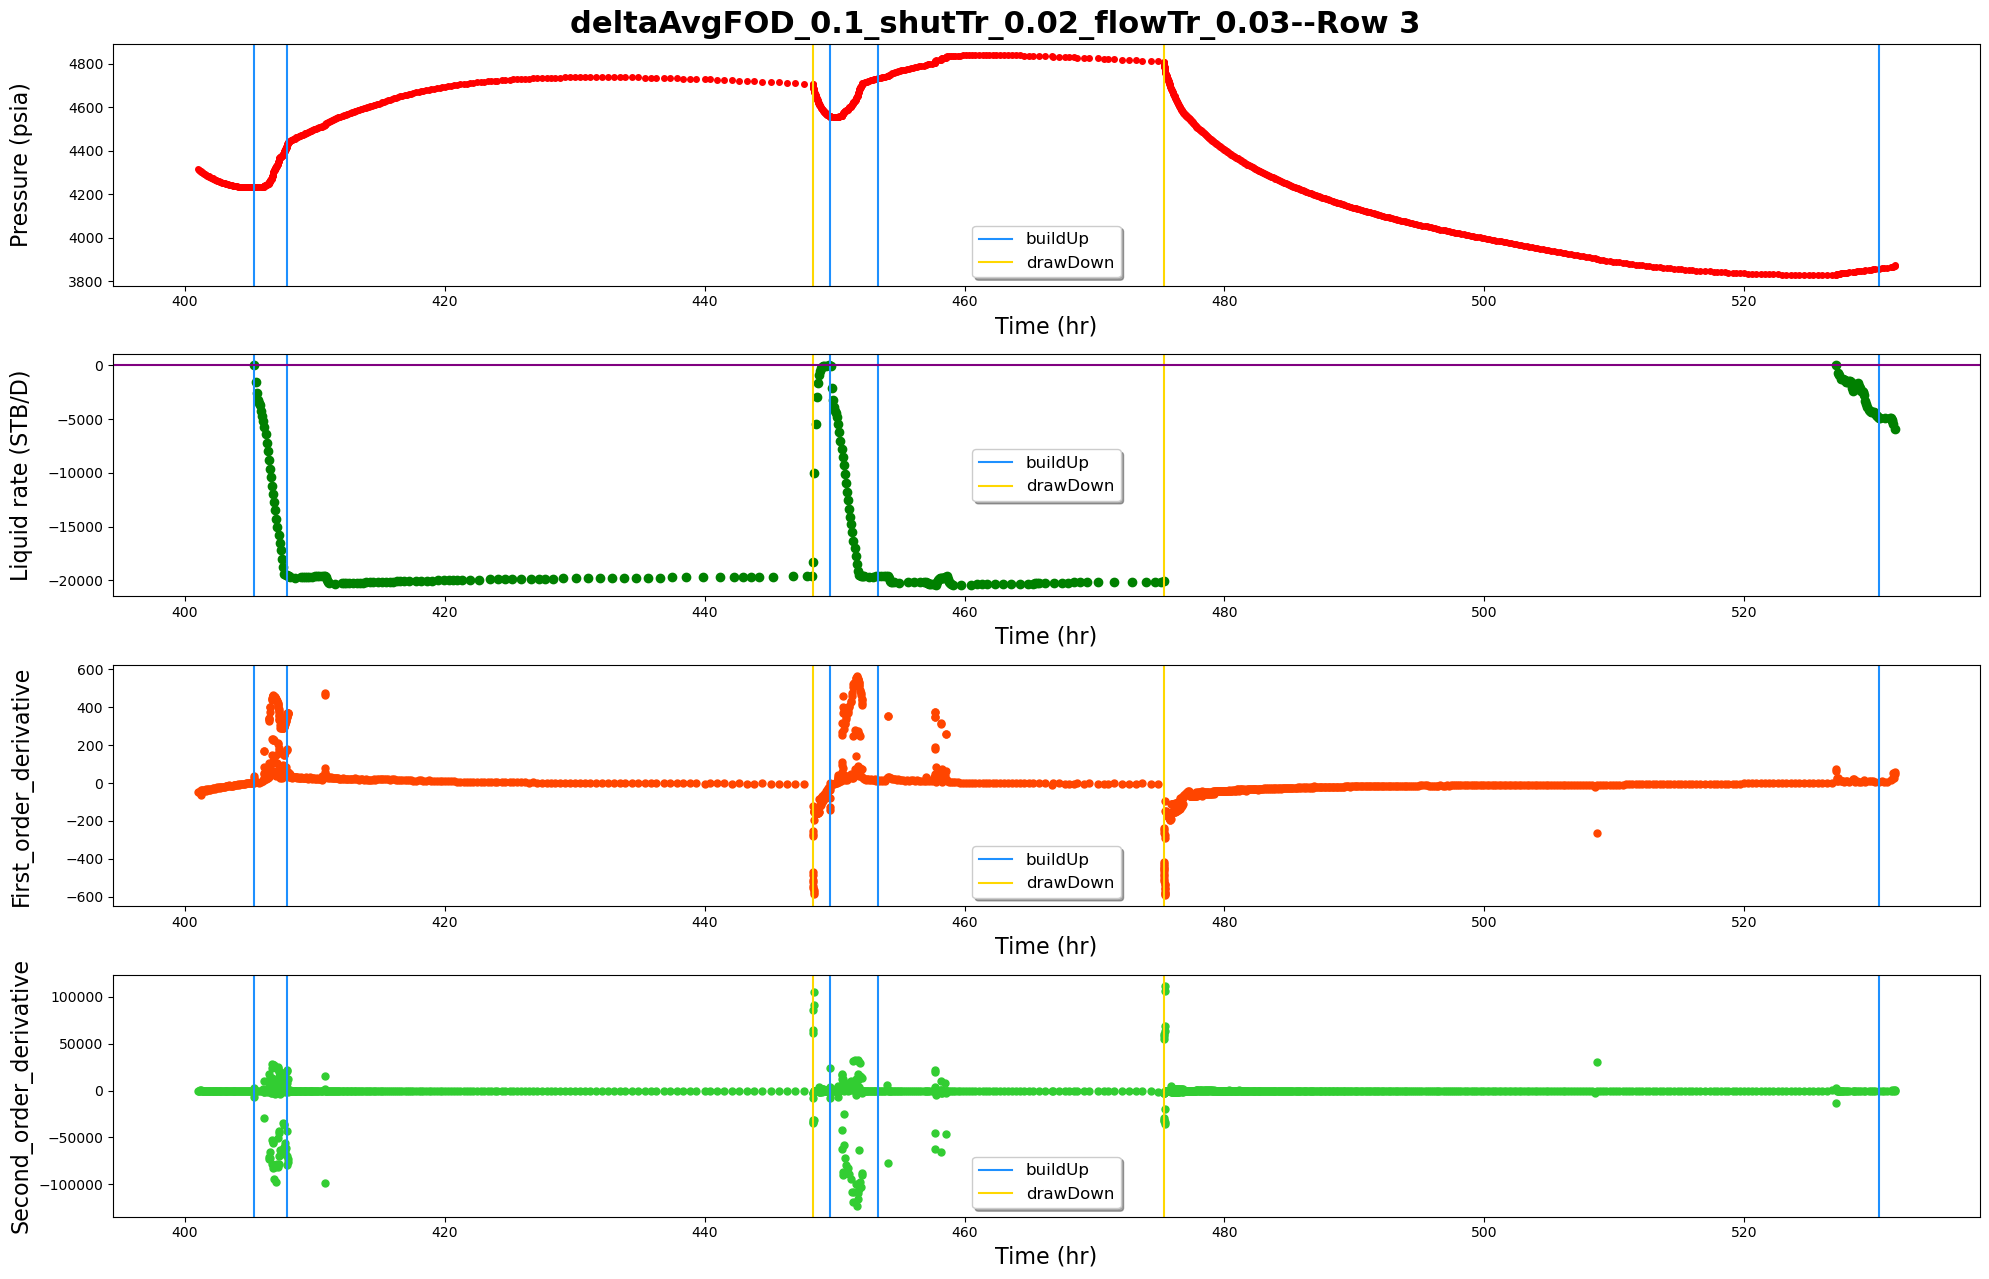

------row 4-----detected points:[3663, 3891, 3988, 4228, 4380, 4480, 4643, 4750]


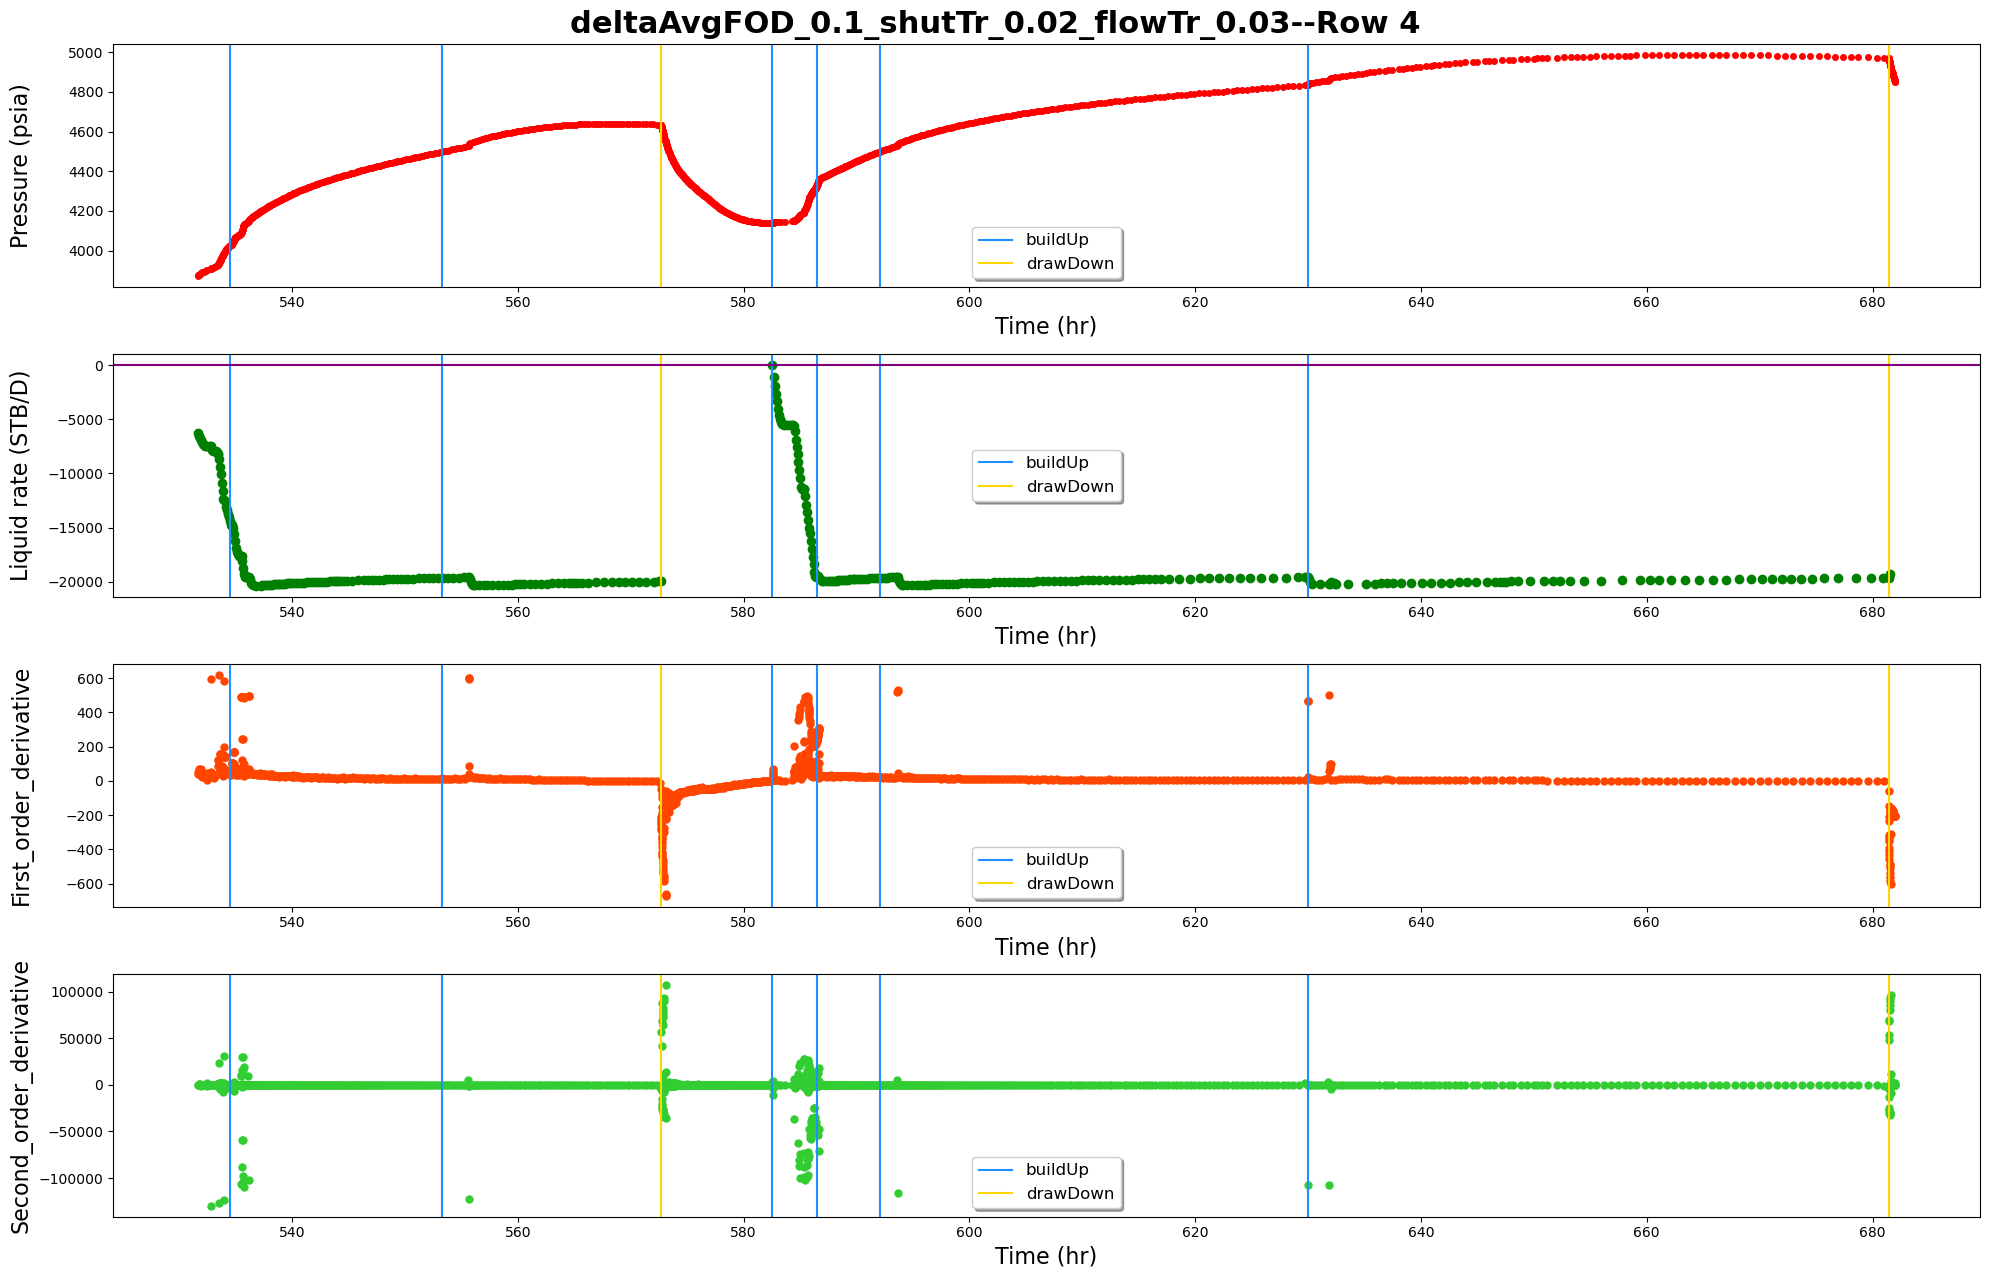

------row 5-----detected points:[4890, 4992, 5135, 5304, 5436, 5554, 5780, 5908, 5985]


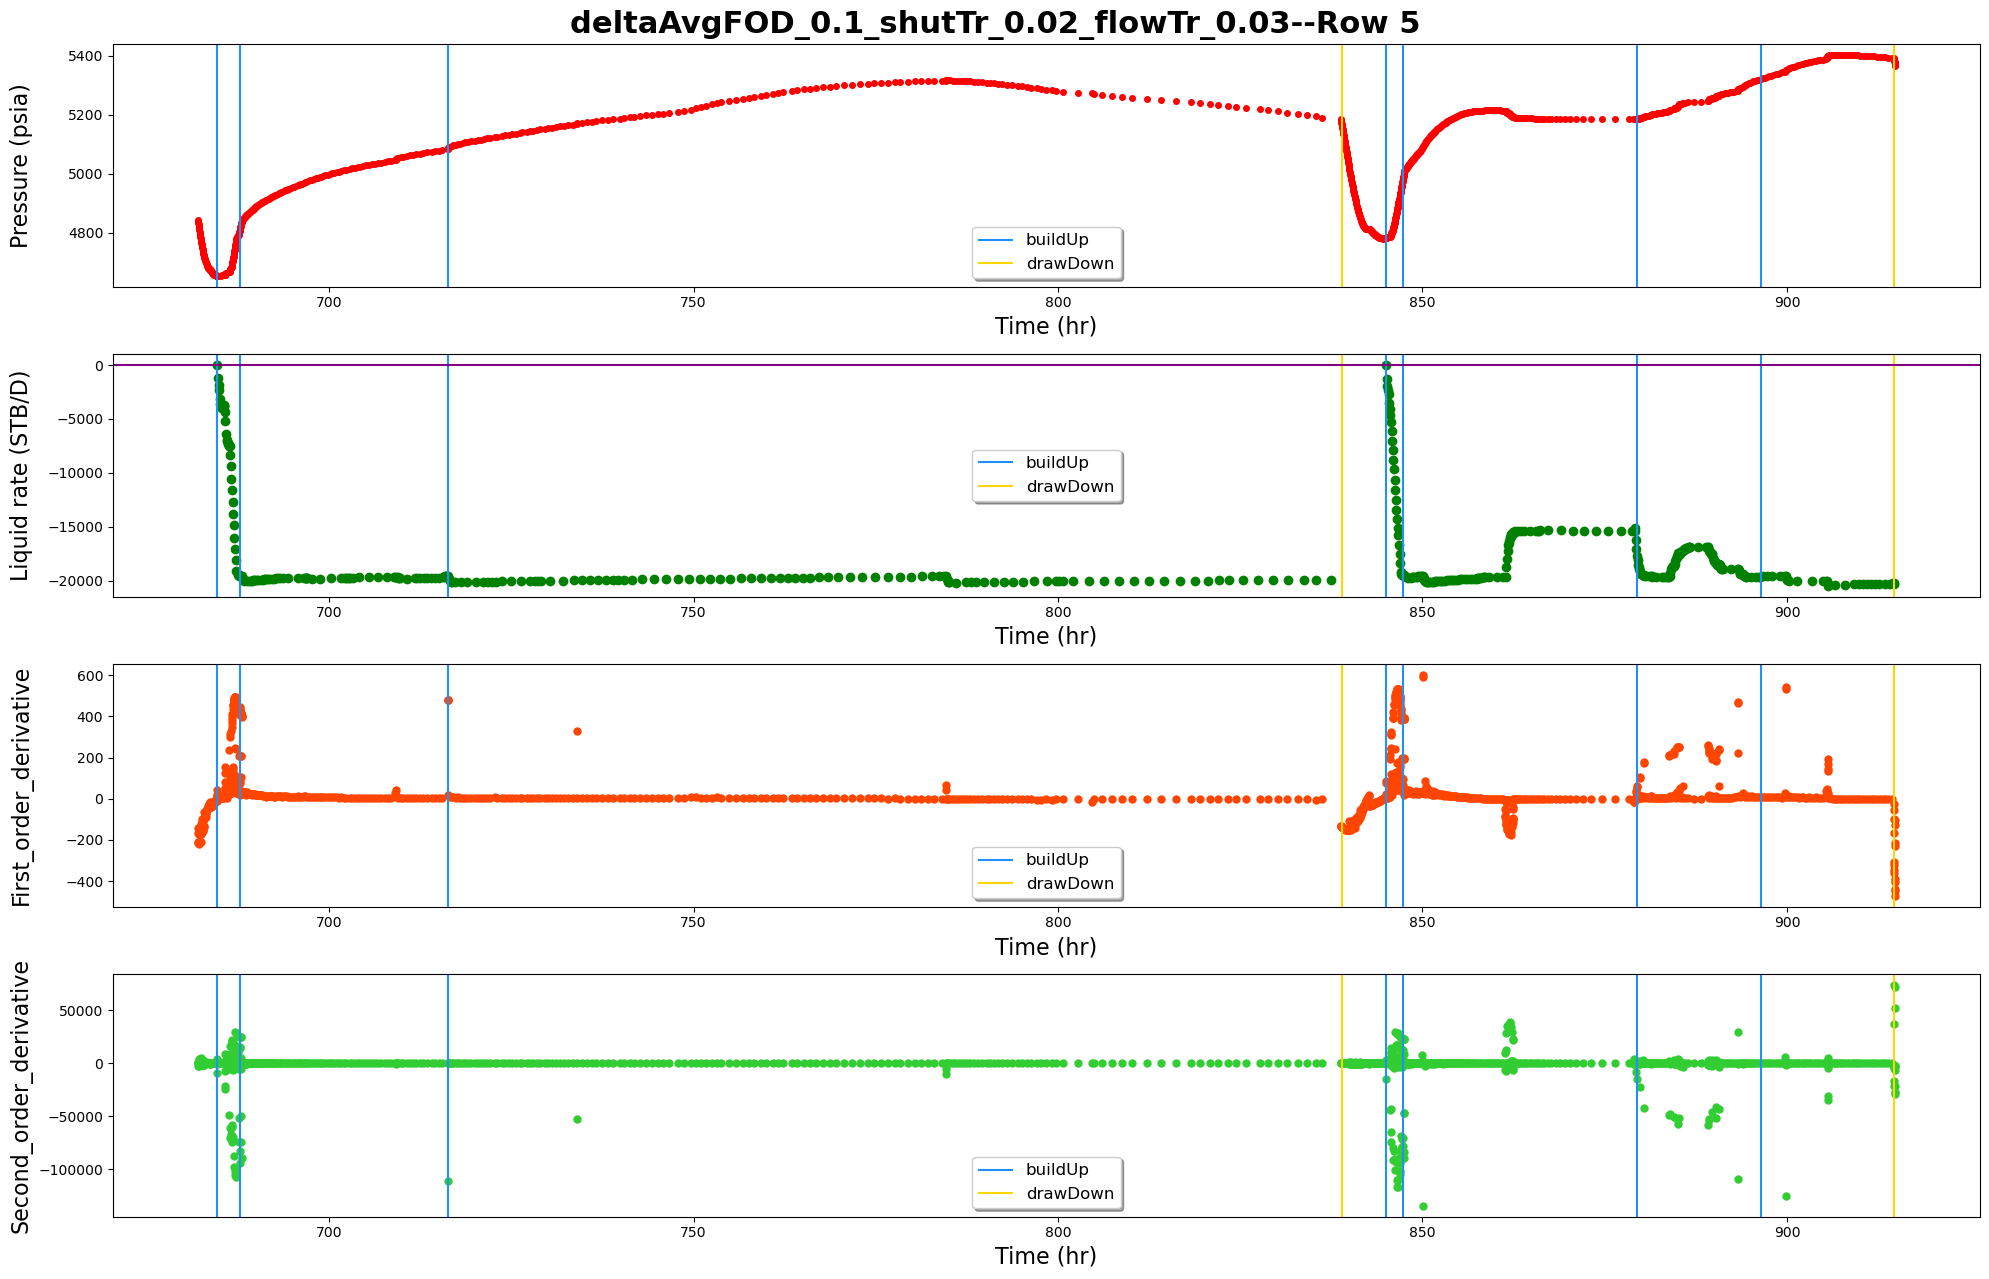

------row 6-----detected points:[6543, 6727, 6873, 7039, 7139]


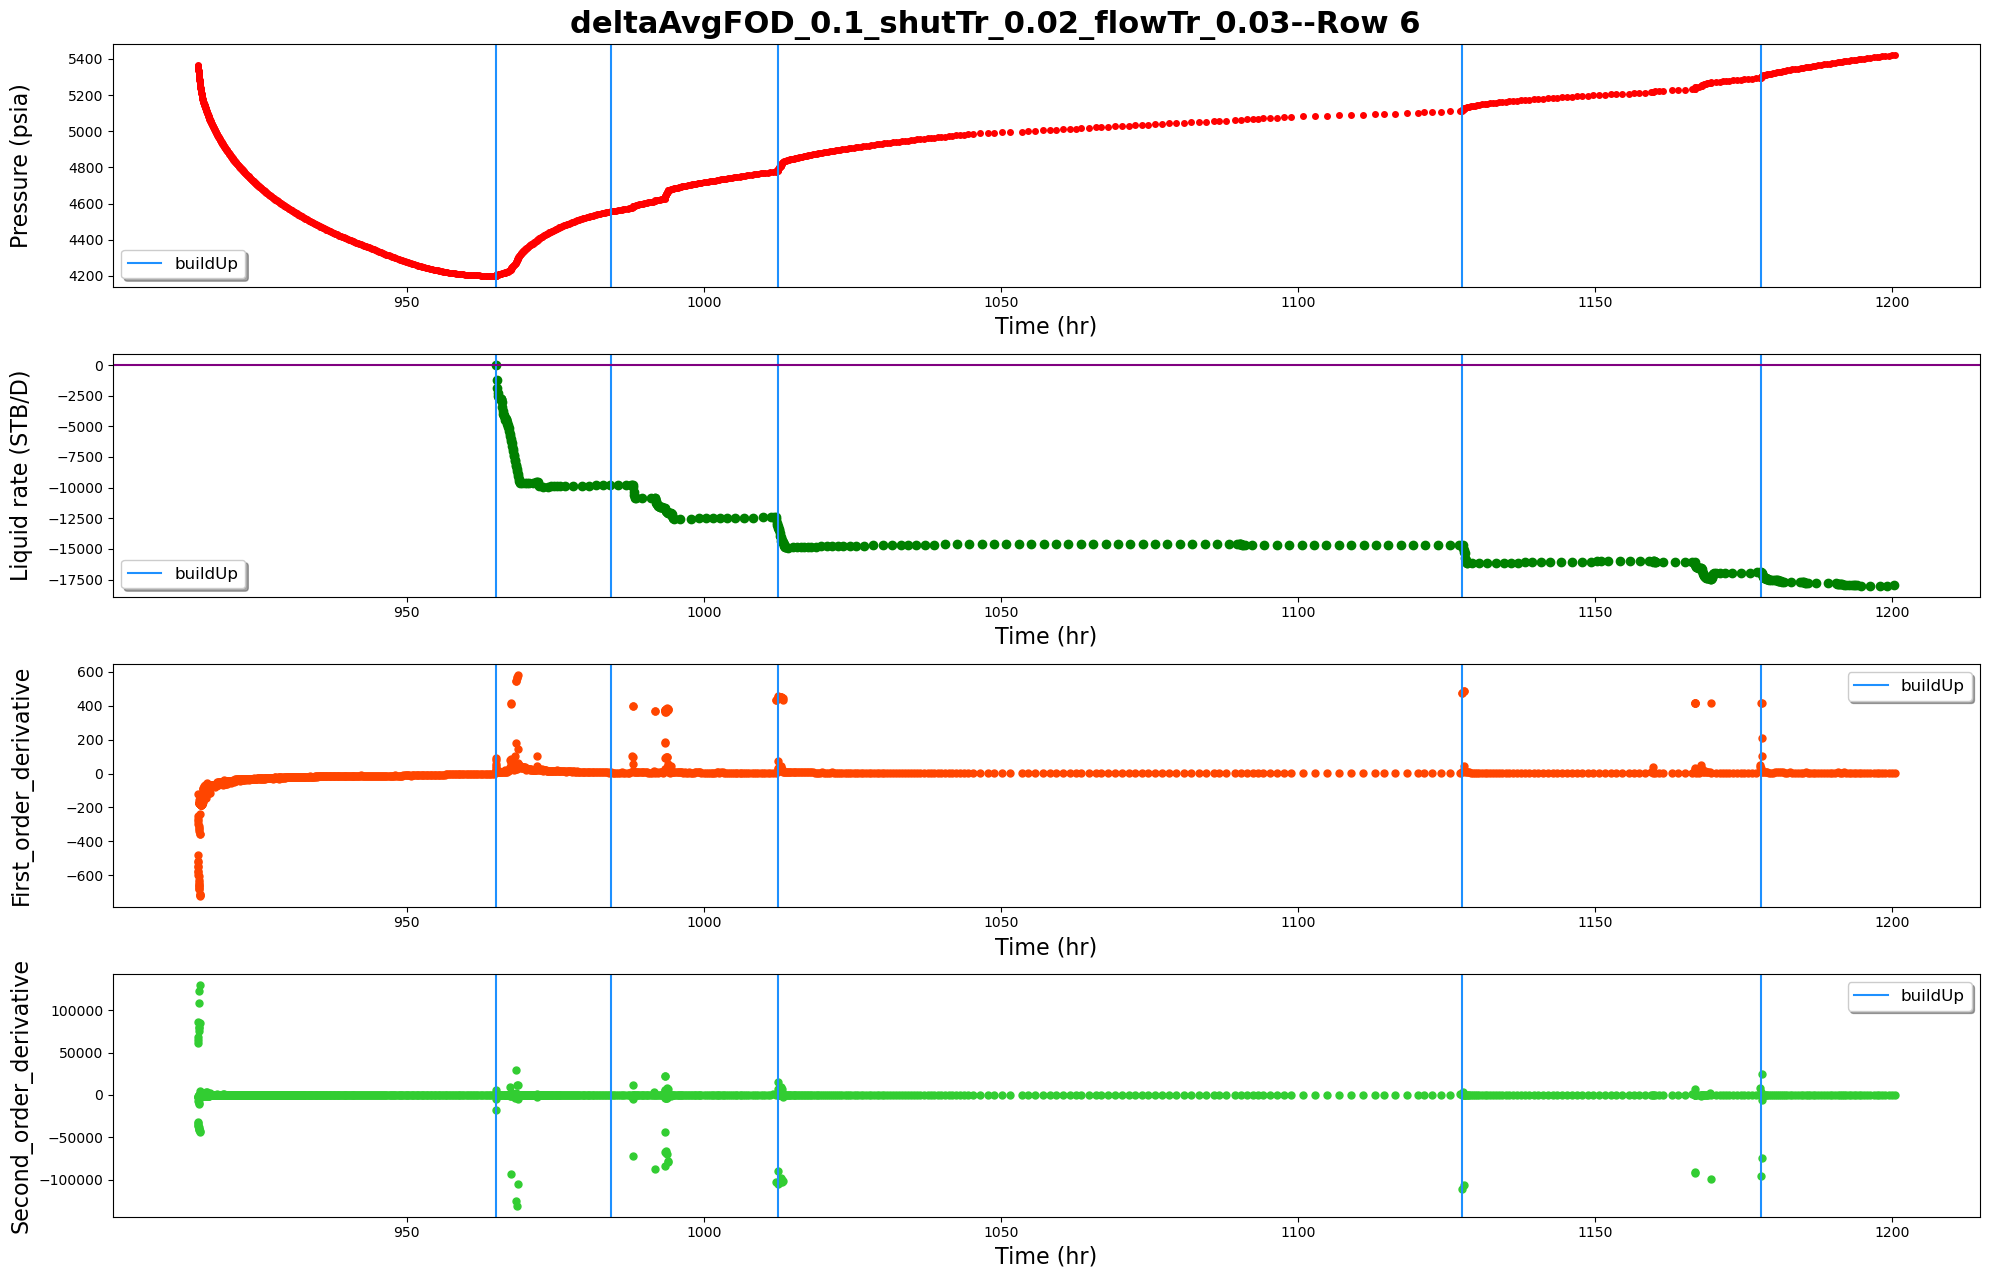

------row 7-----detected points:[7220, 7284, 7544, 7621, 7708, 7809, 7945, 8361]


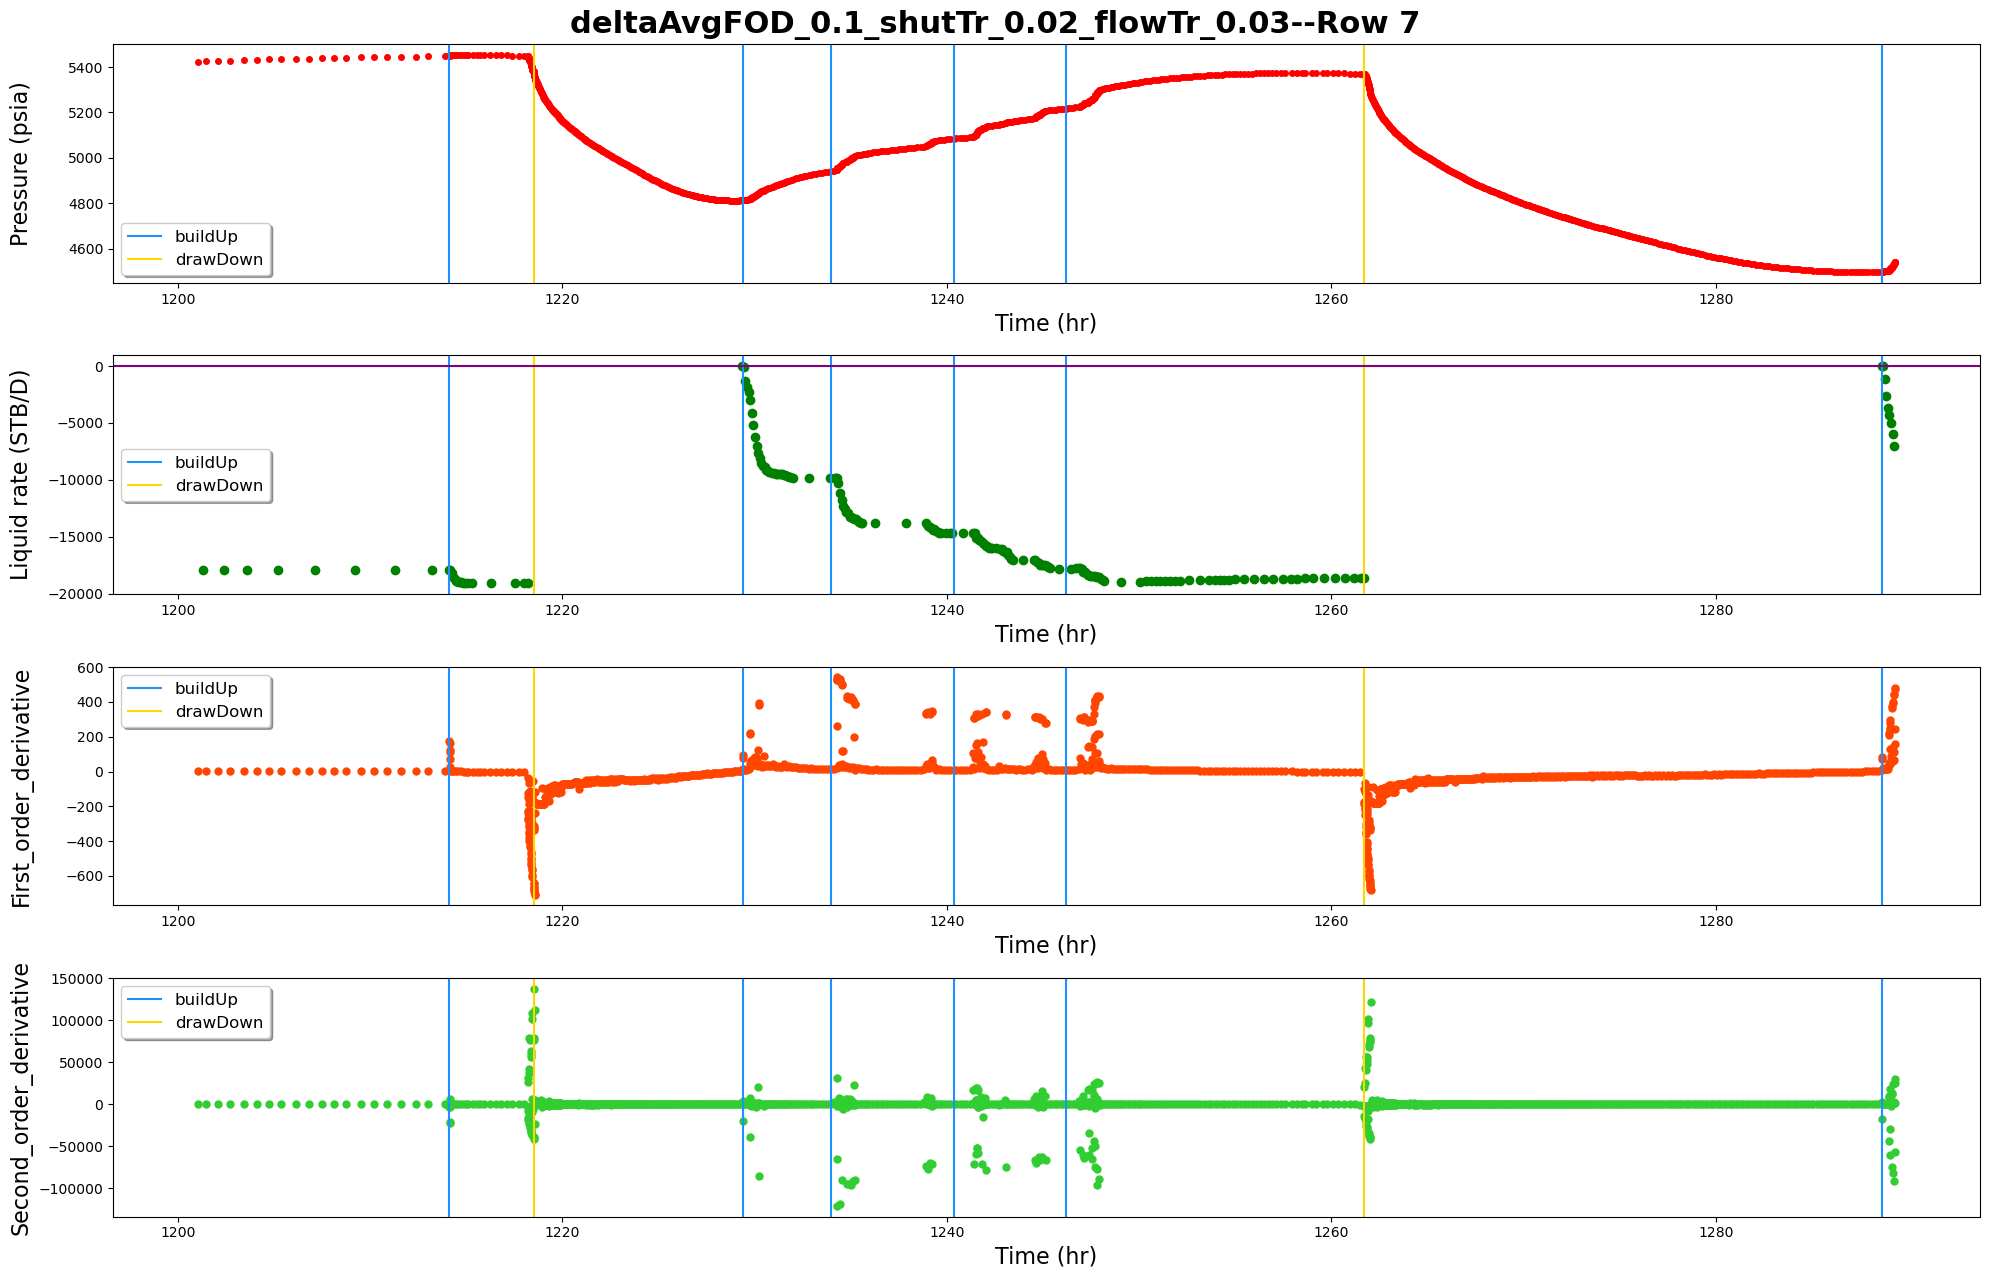

------row 8-----detected points:[8468, 8587, 8653, 8786, 8858, 9024]


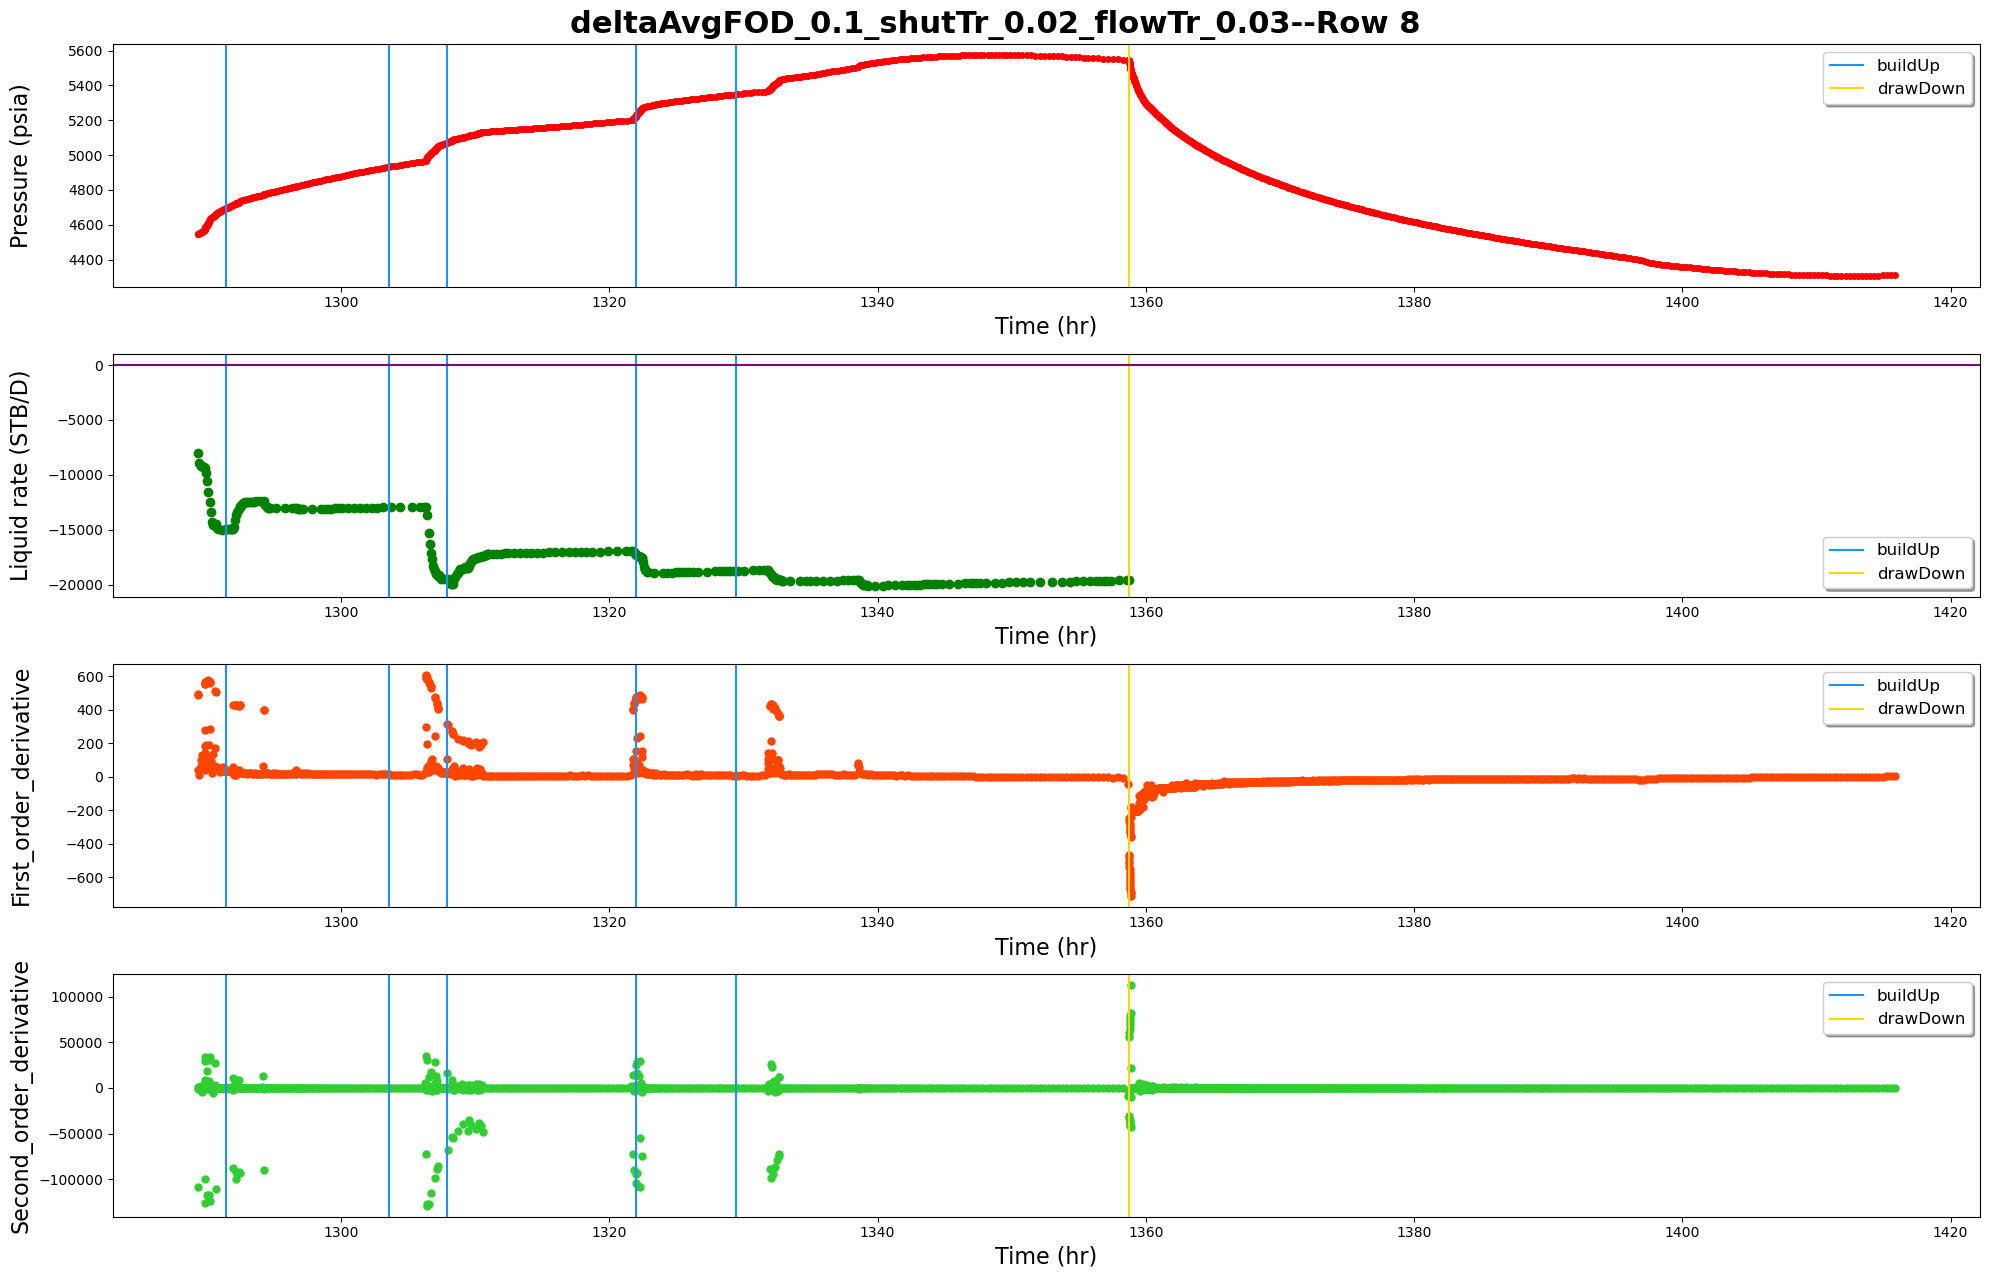

------row 9-----detected points:[9606, 9679, 9832, 10012, 10149, 10224, 10301, 10439, 10527]


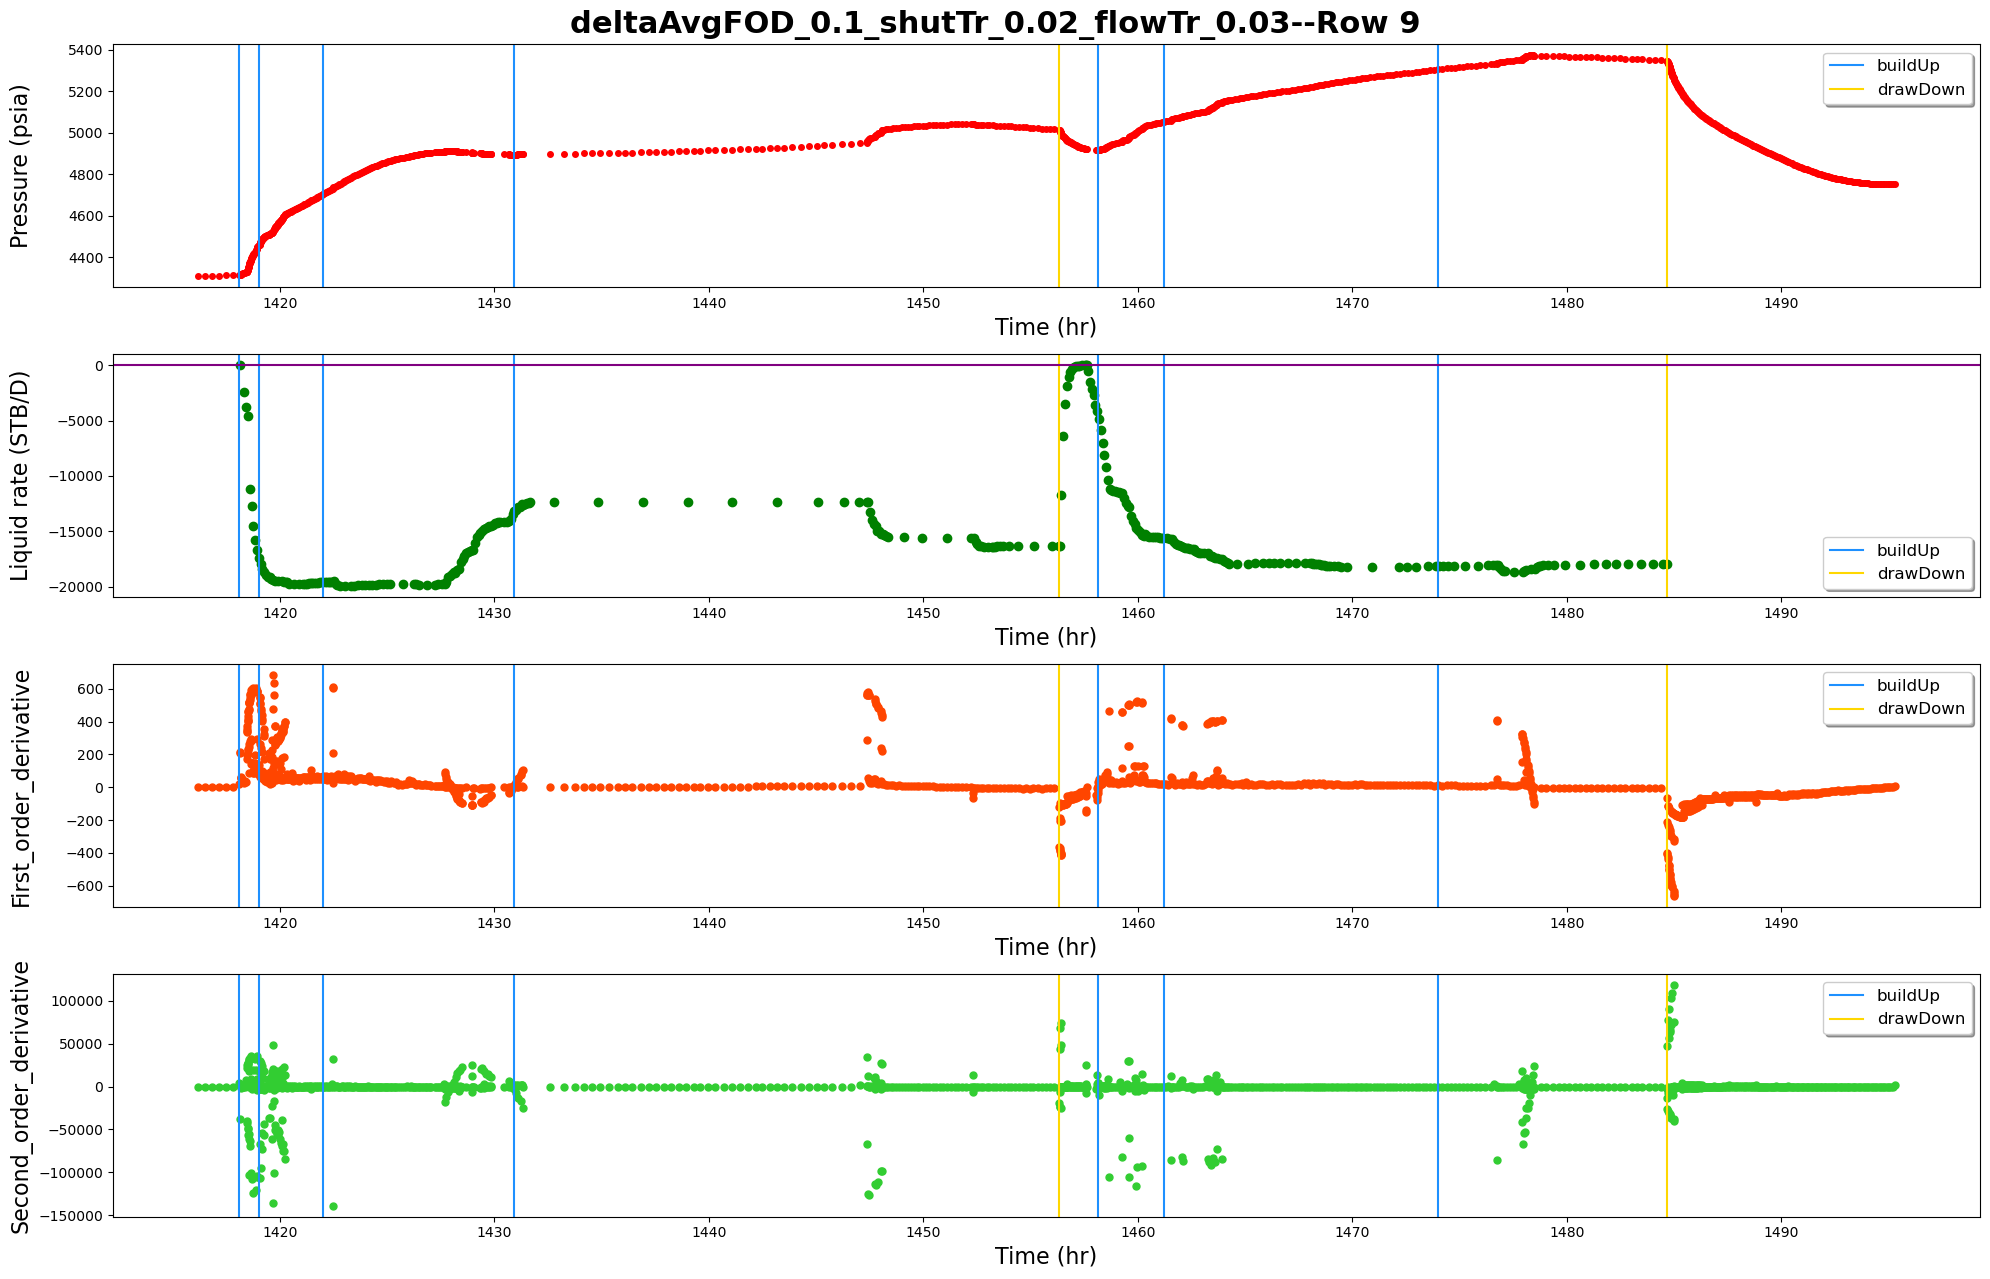

------row 10-----detected points:[10800, 10874, 10936, 11022, 11340, 11480, 11607, 11729, 11832, 11893, 11972]


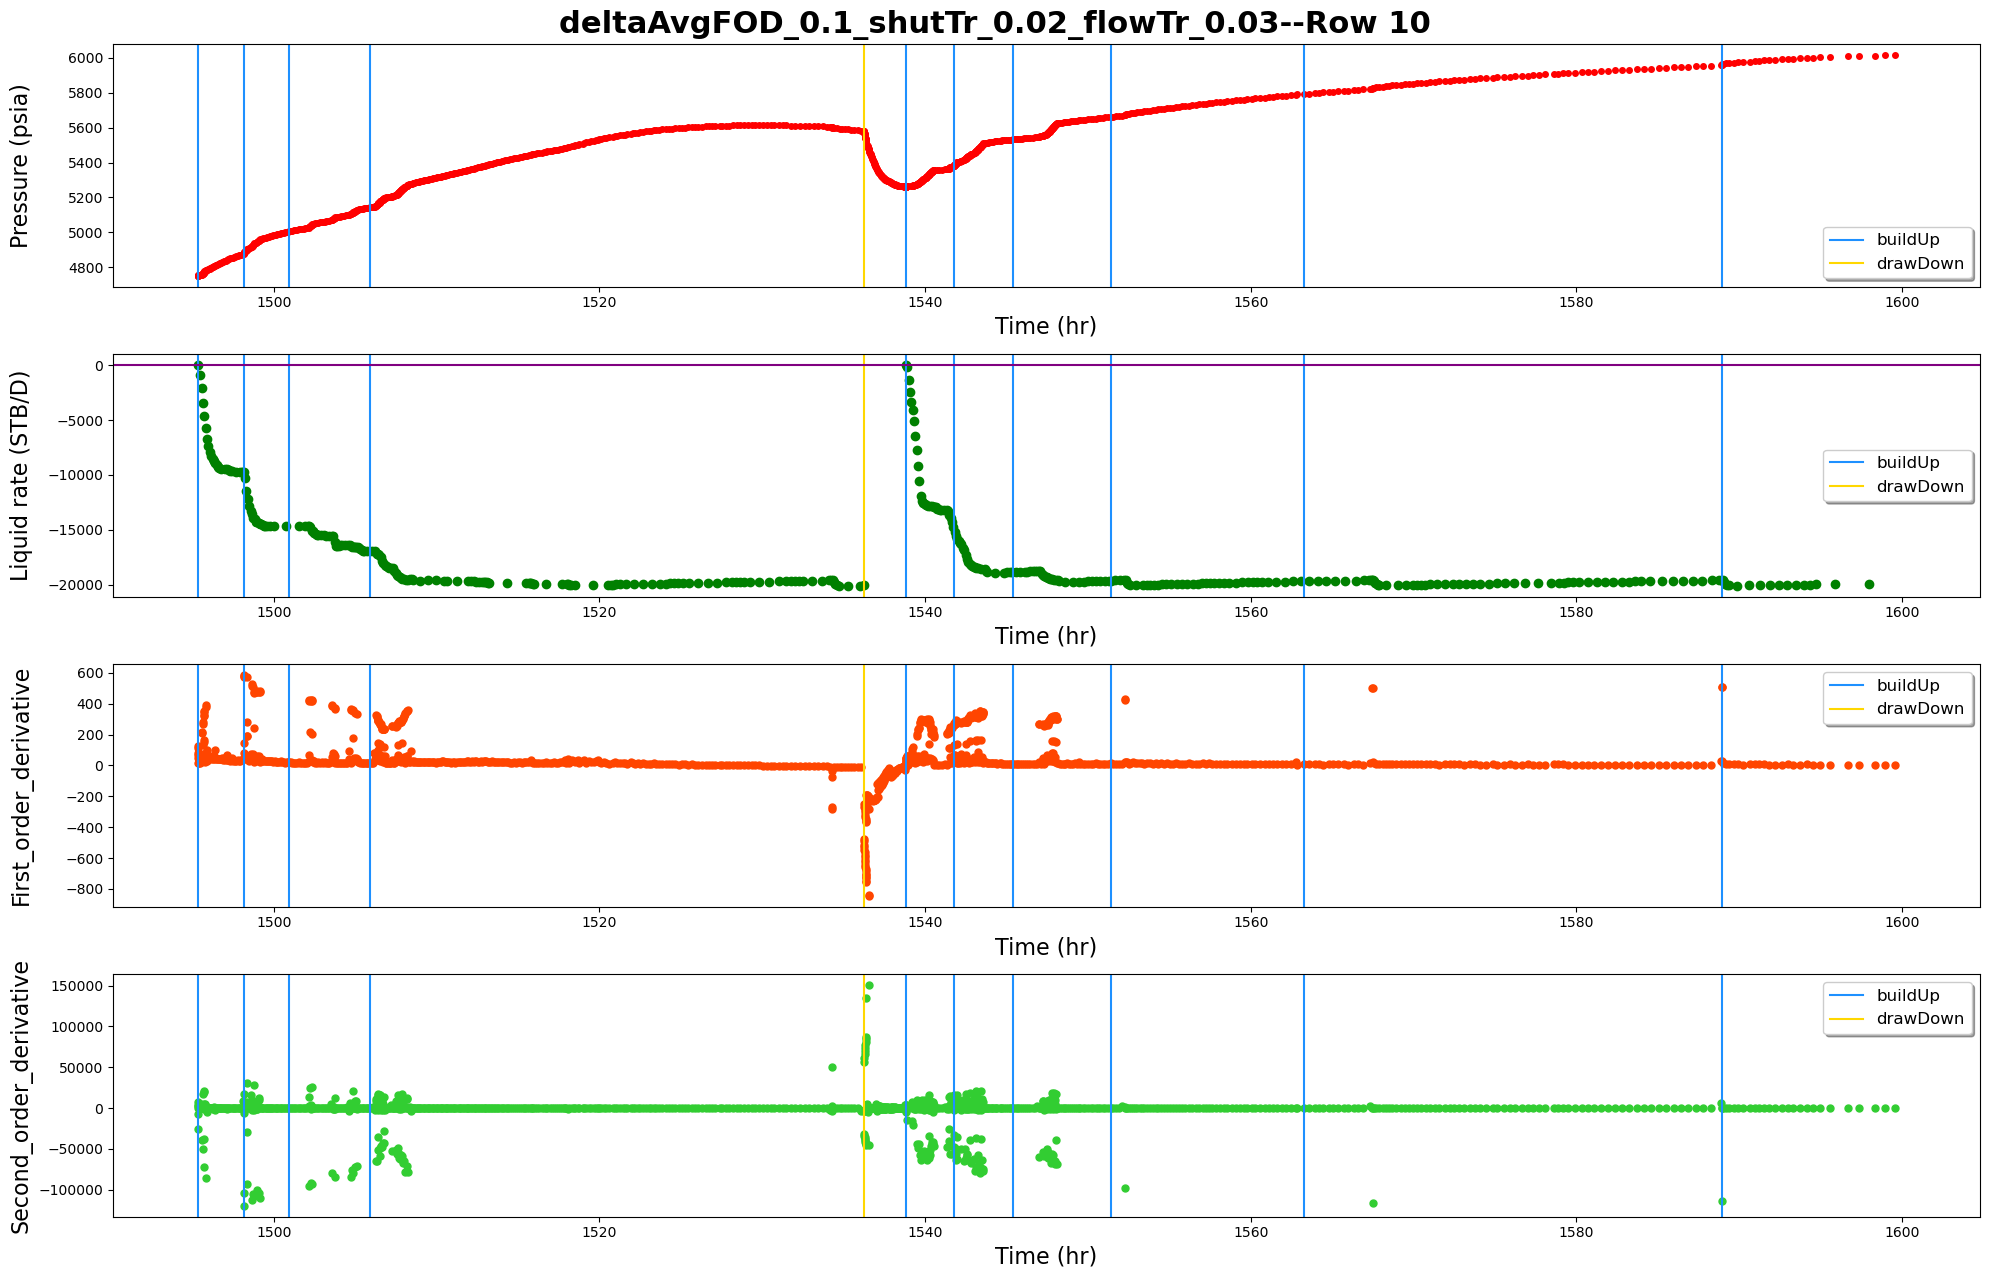

------row 11-----detected points:[12039, 12128, 12233, 12362, 13038, 13104, 13155]


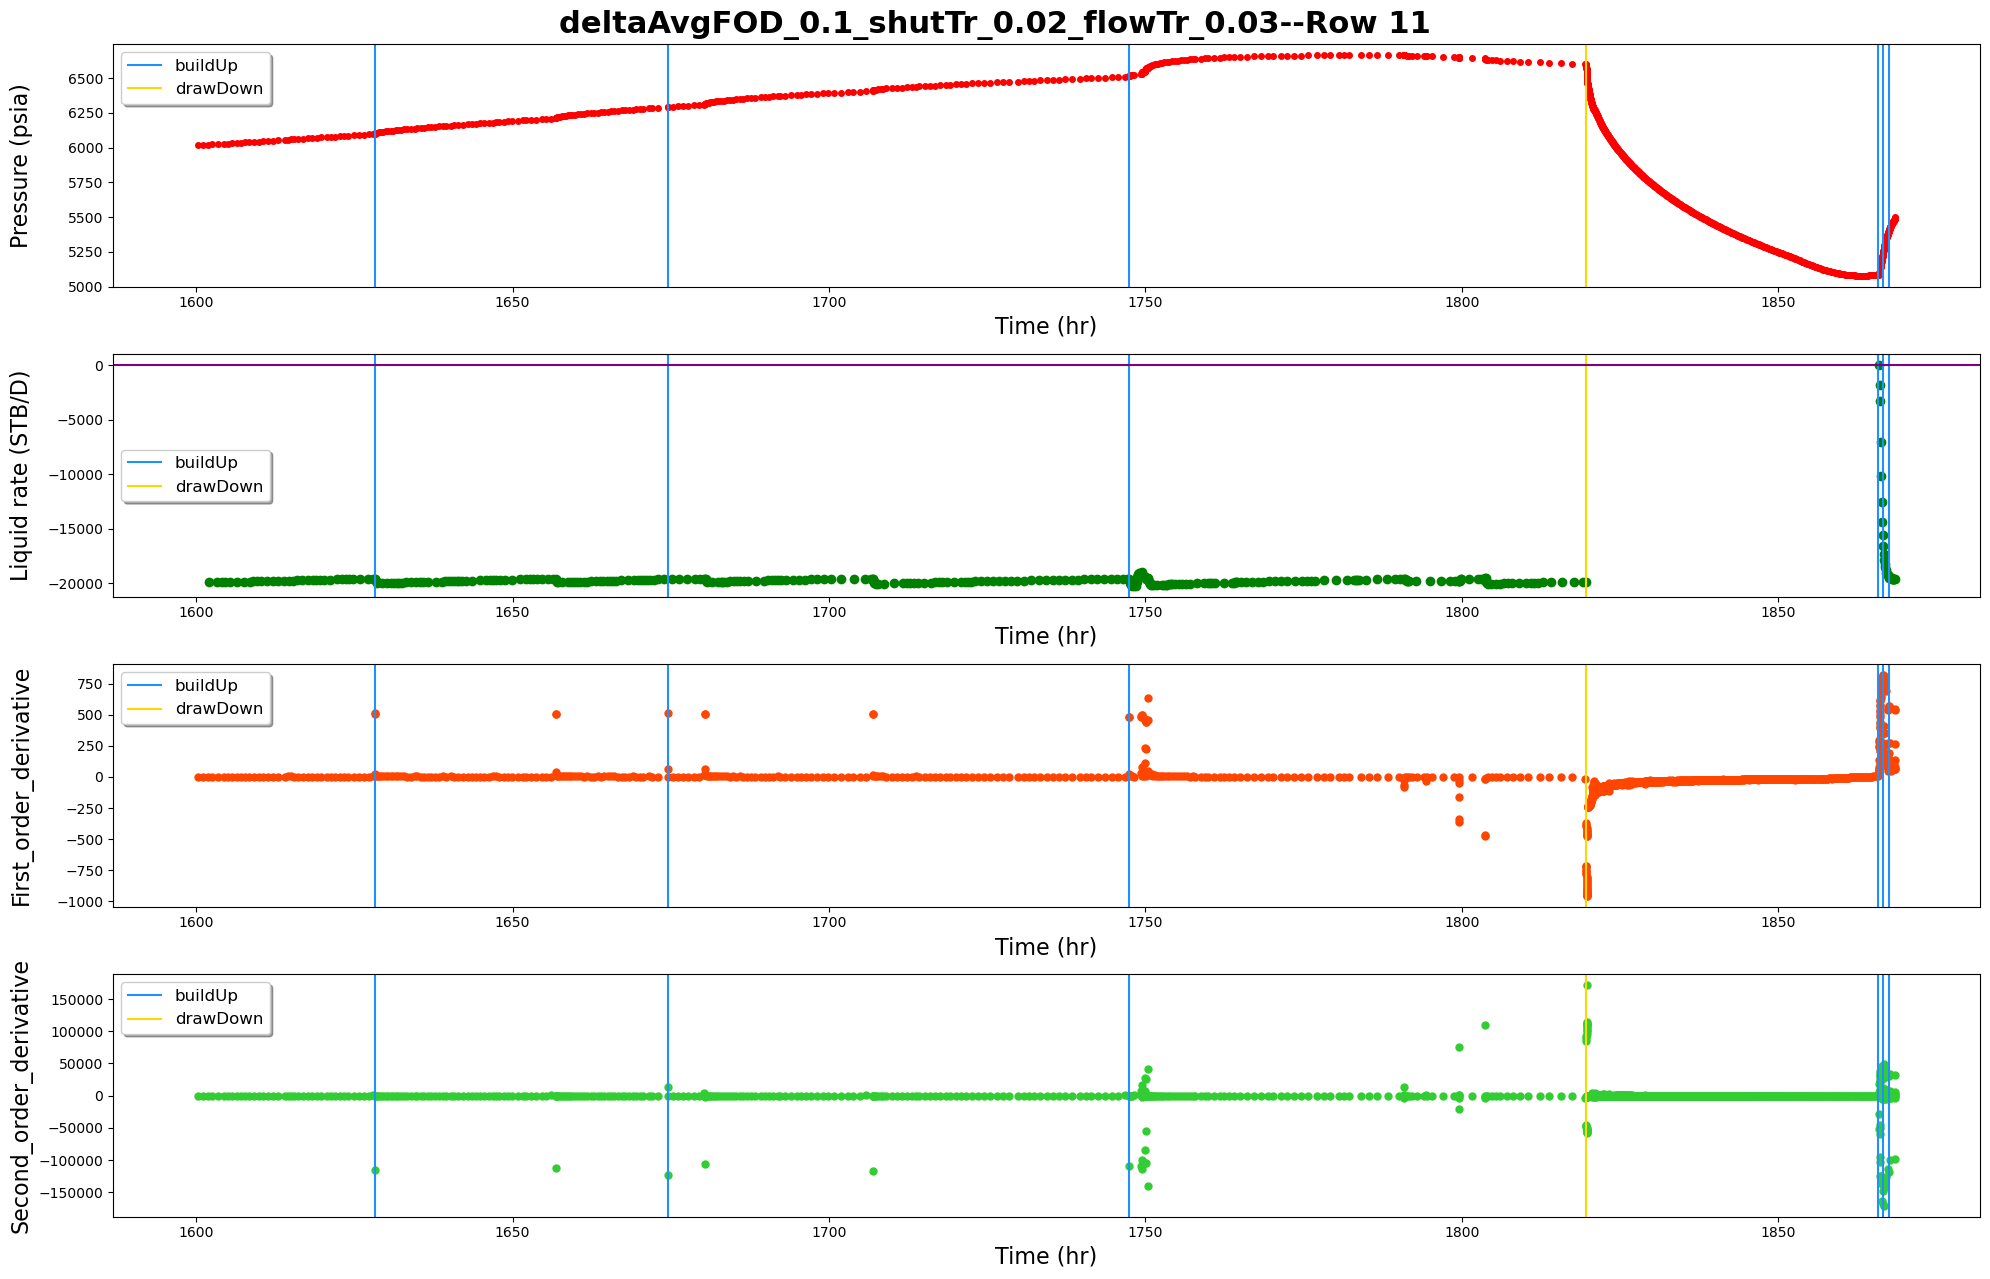

------row 12-----detected points:[13258, 13324, 13389, 13514, 13606, 13704, 13777, 13867, 14085, 14197, 14277, 14370]


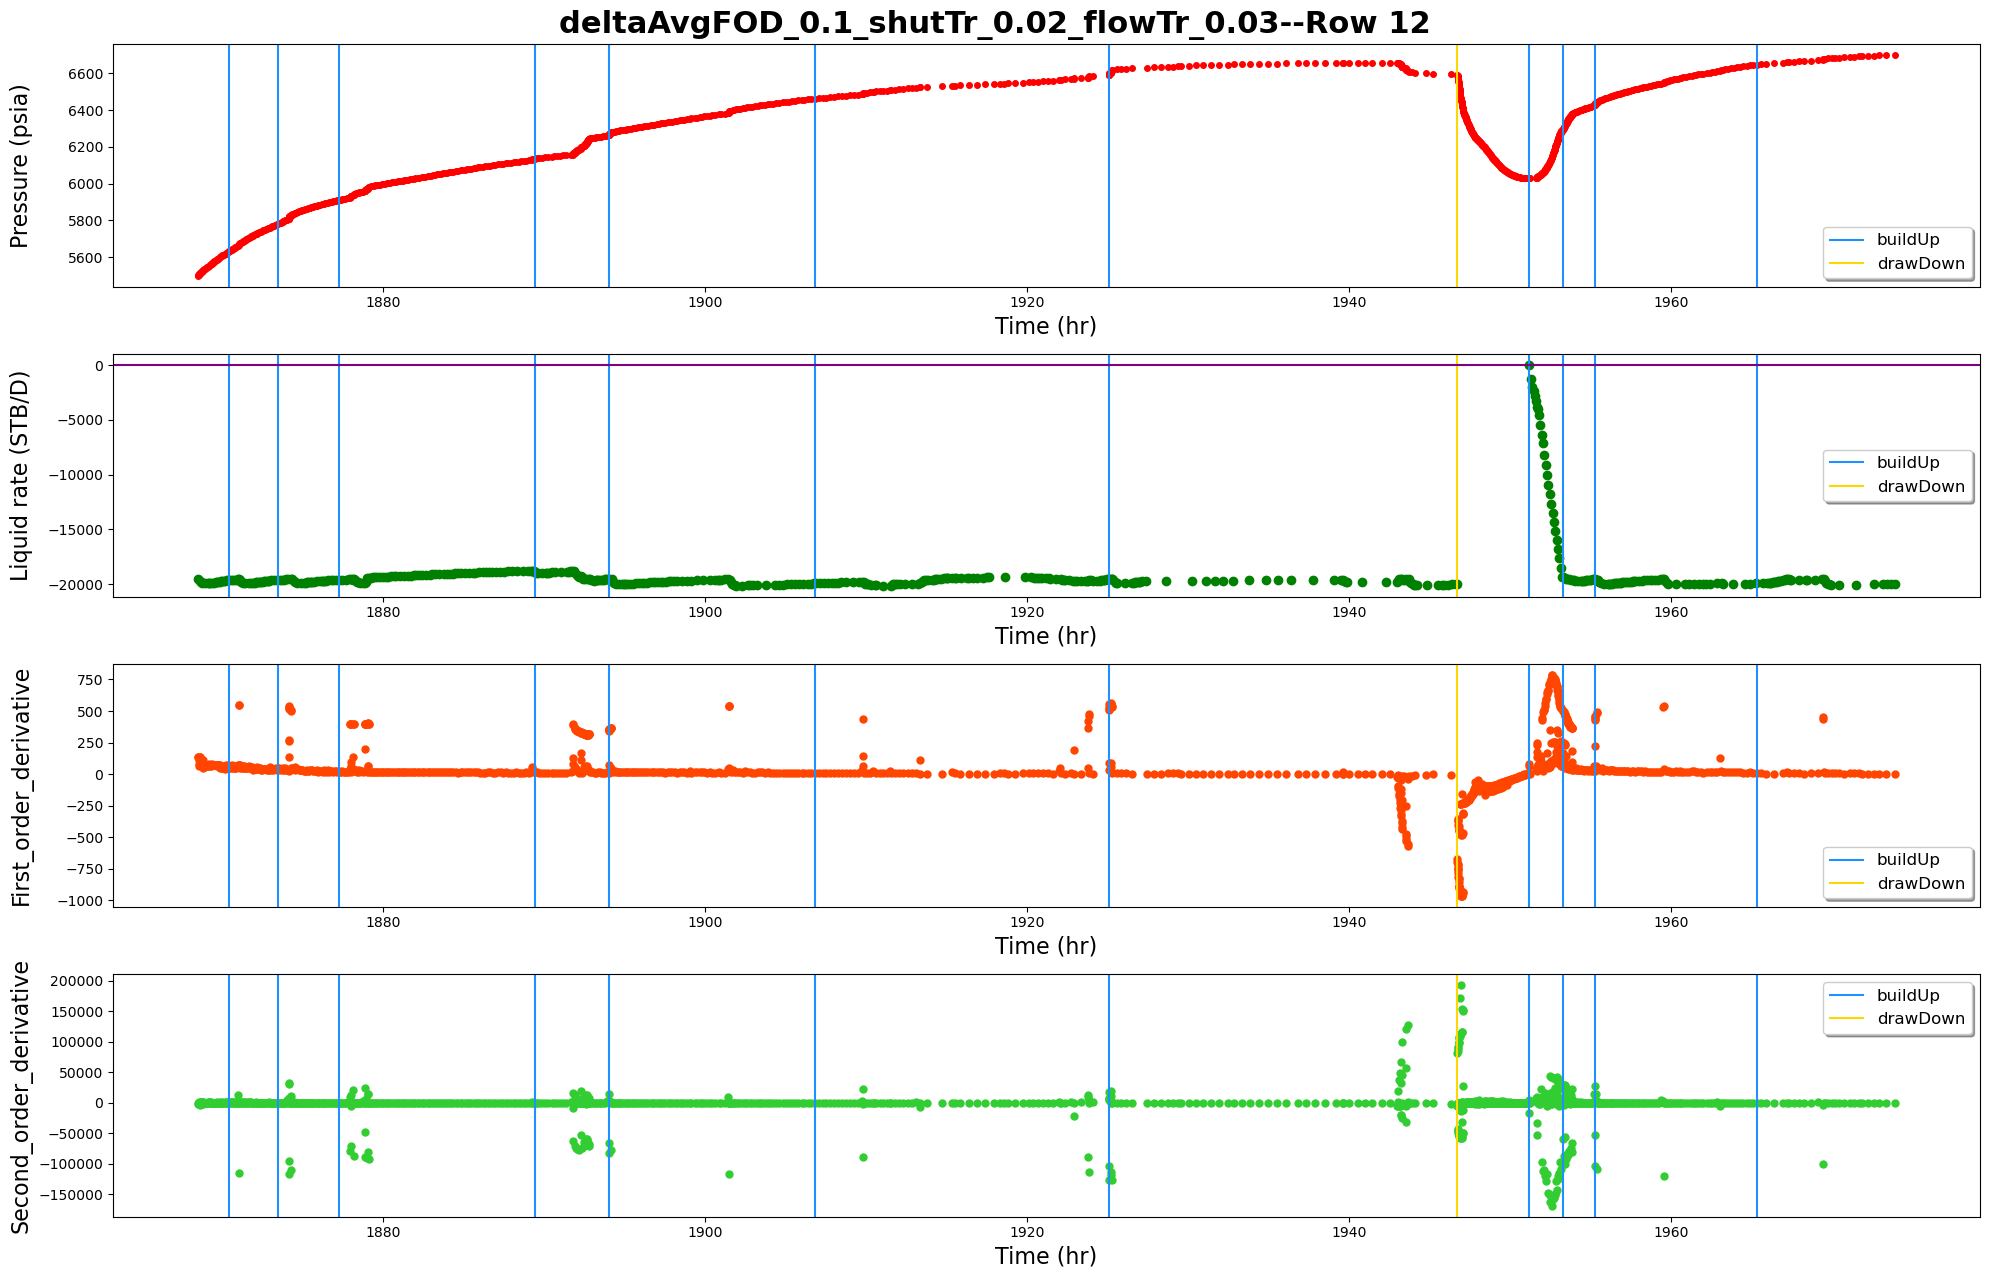

------row 13-----detected points:[14471, 14564, 14686, 14774, 15335, 15405, 15465, 15563]


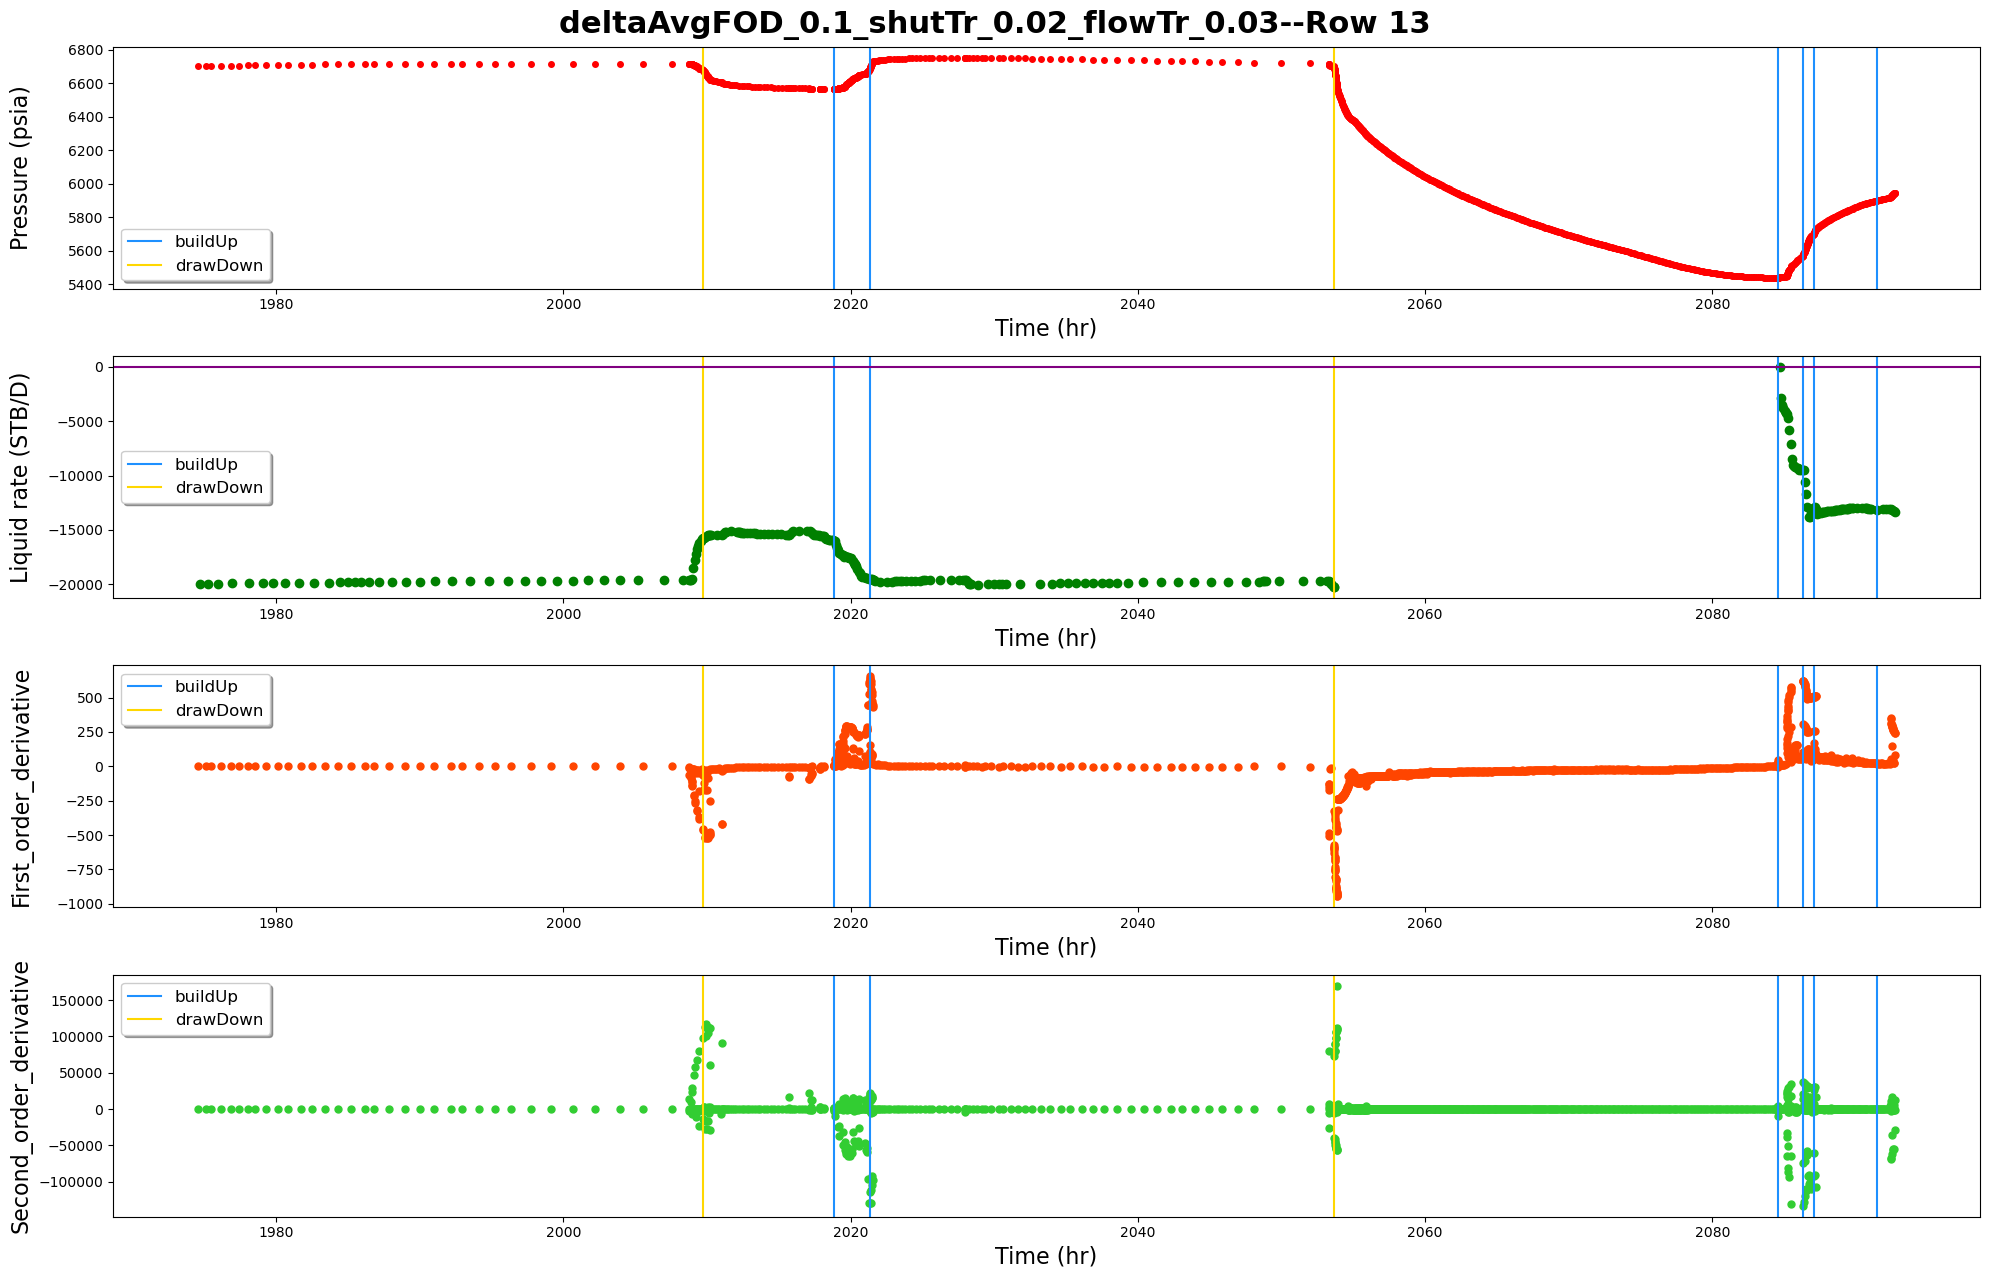

------row 14-----detected points:[15726, 15926, 16096, 16580, 16693, 16794]


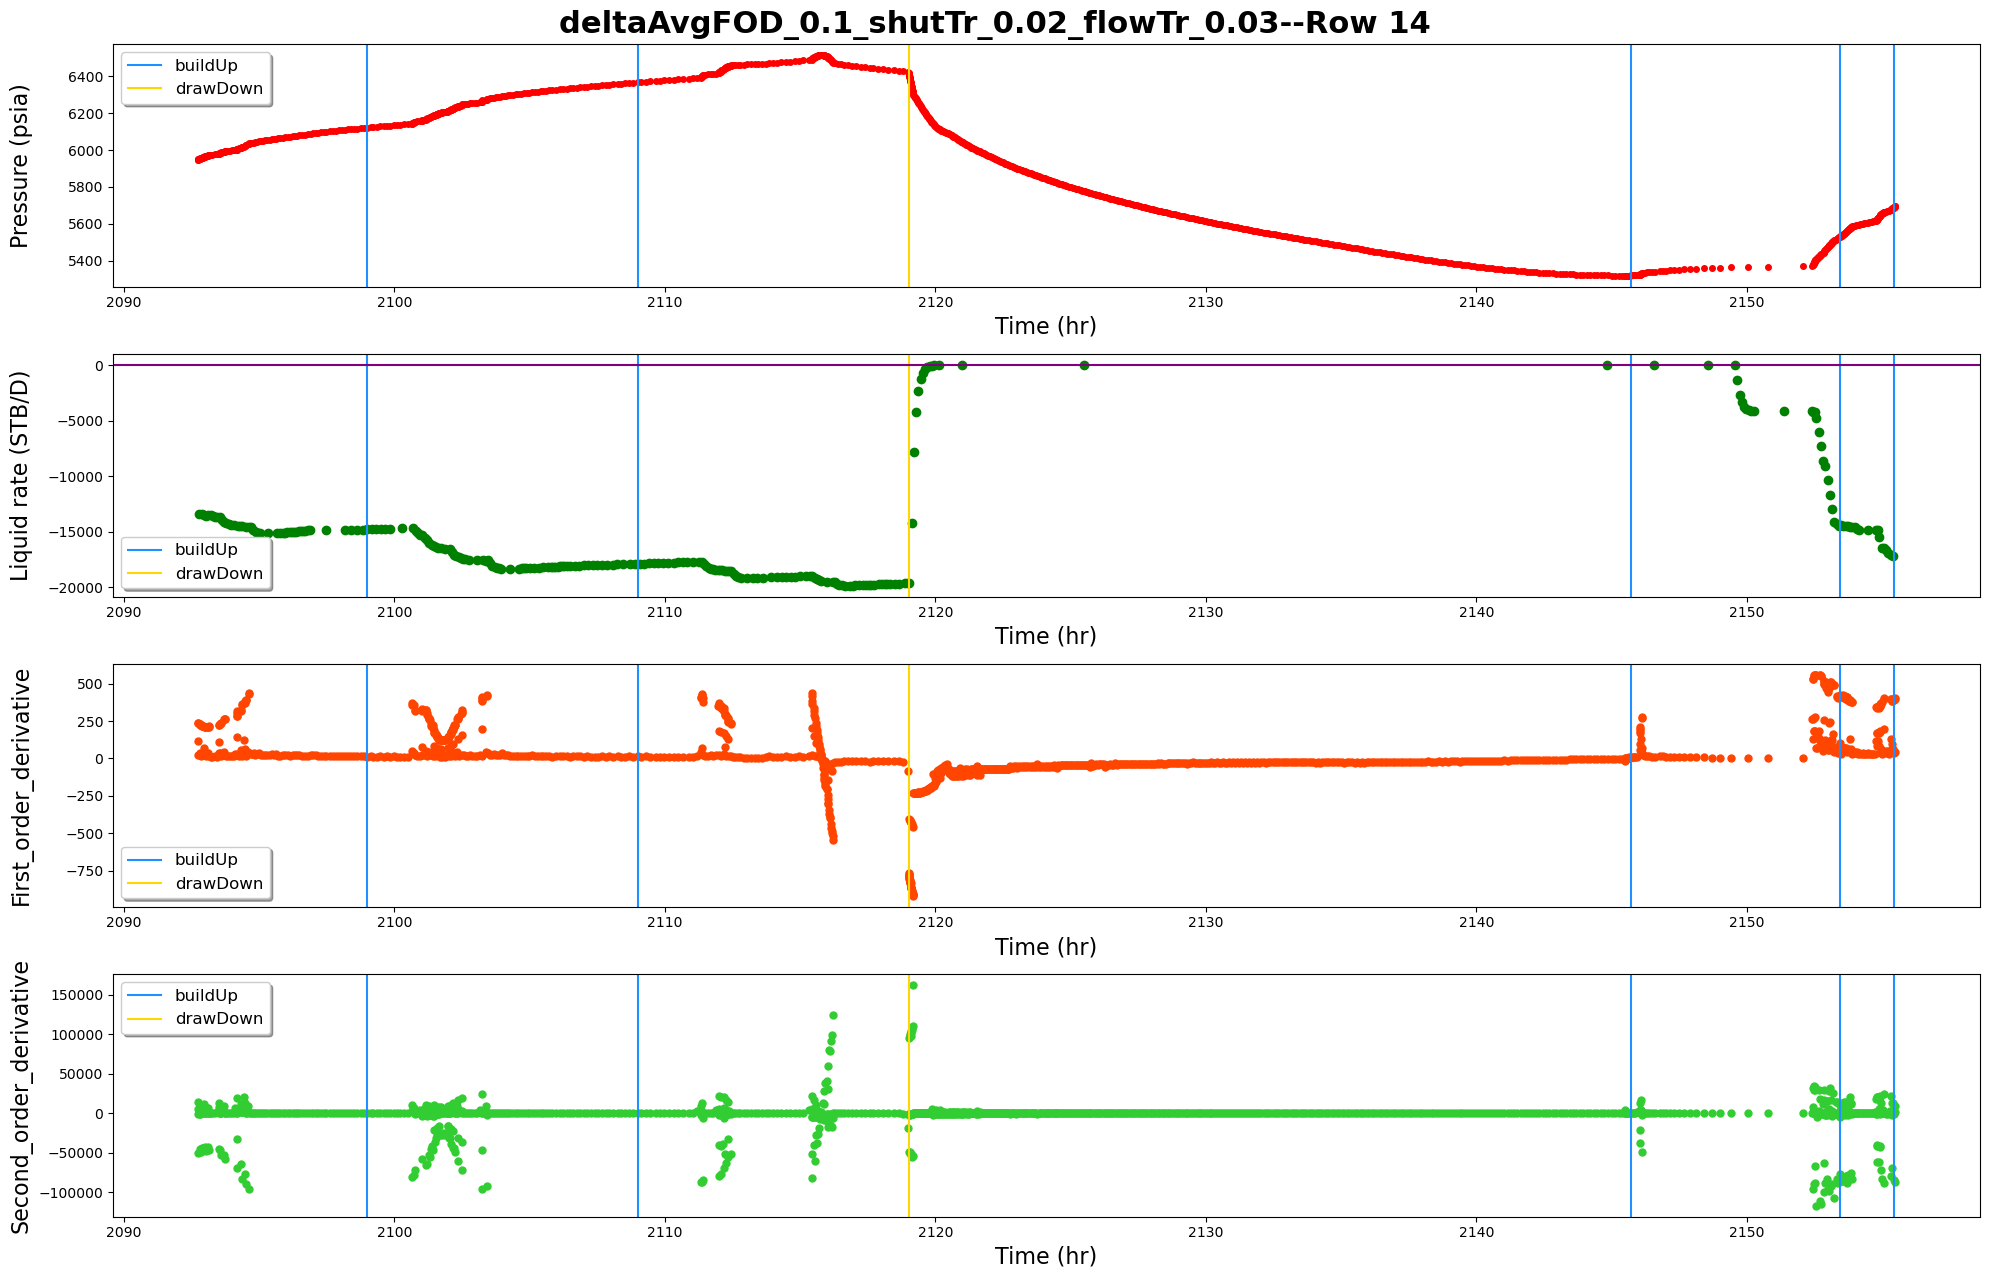

------row 15-----detected points:[16896, 16956, 17052, 17158, 17252, 17327, 17419, 17511, 17589]


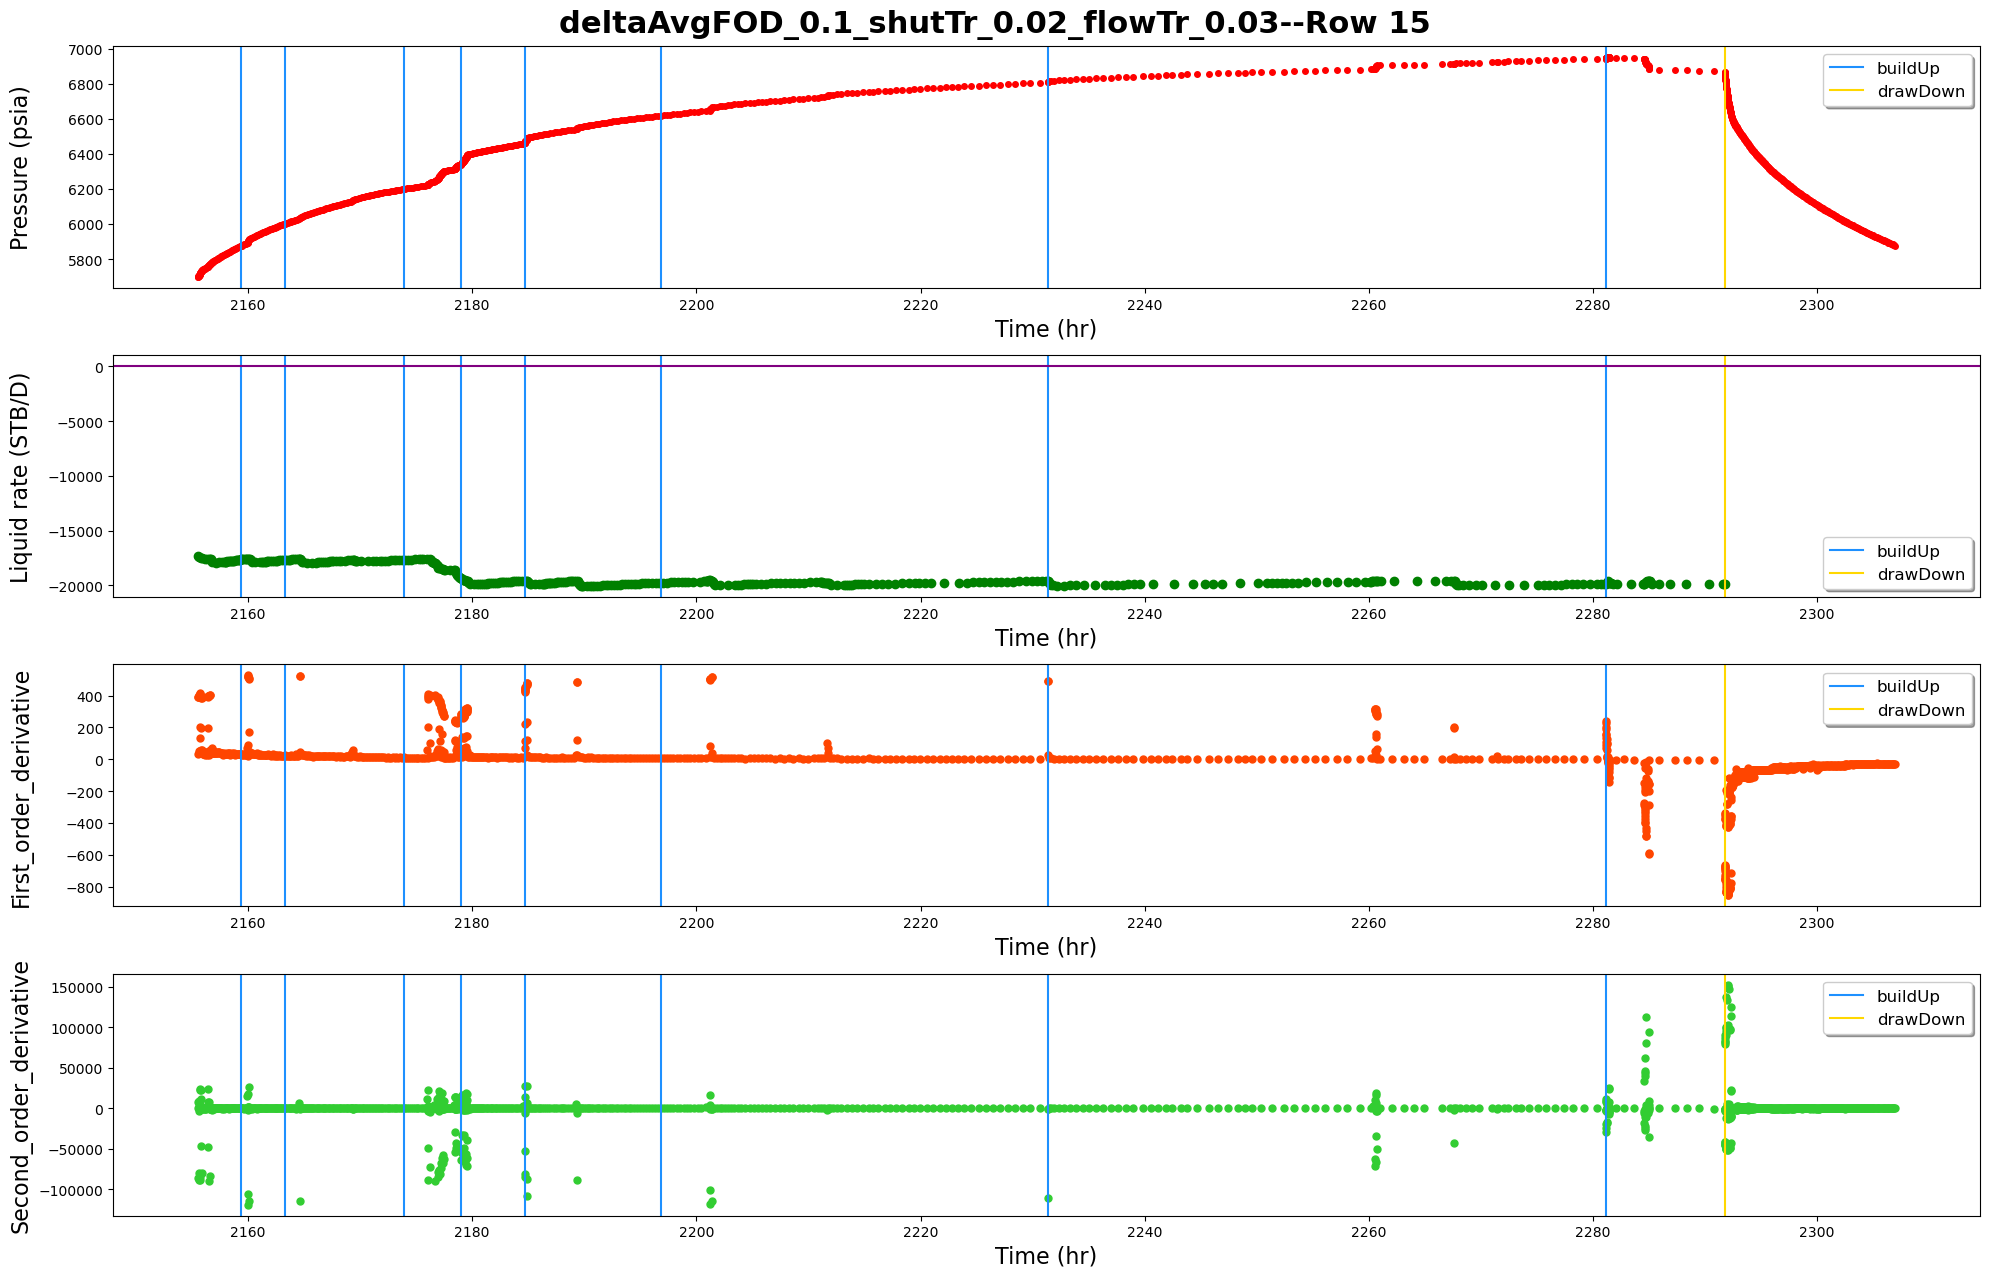

------row 16-----detected points:[18433, 18498, 18564, 18653, 18711, 18776, 18915, 19020, 19136, 19194]


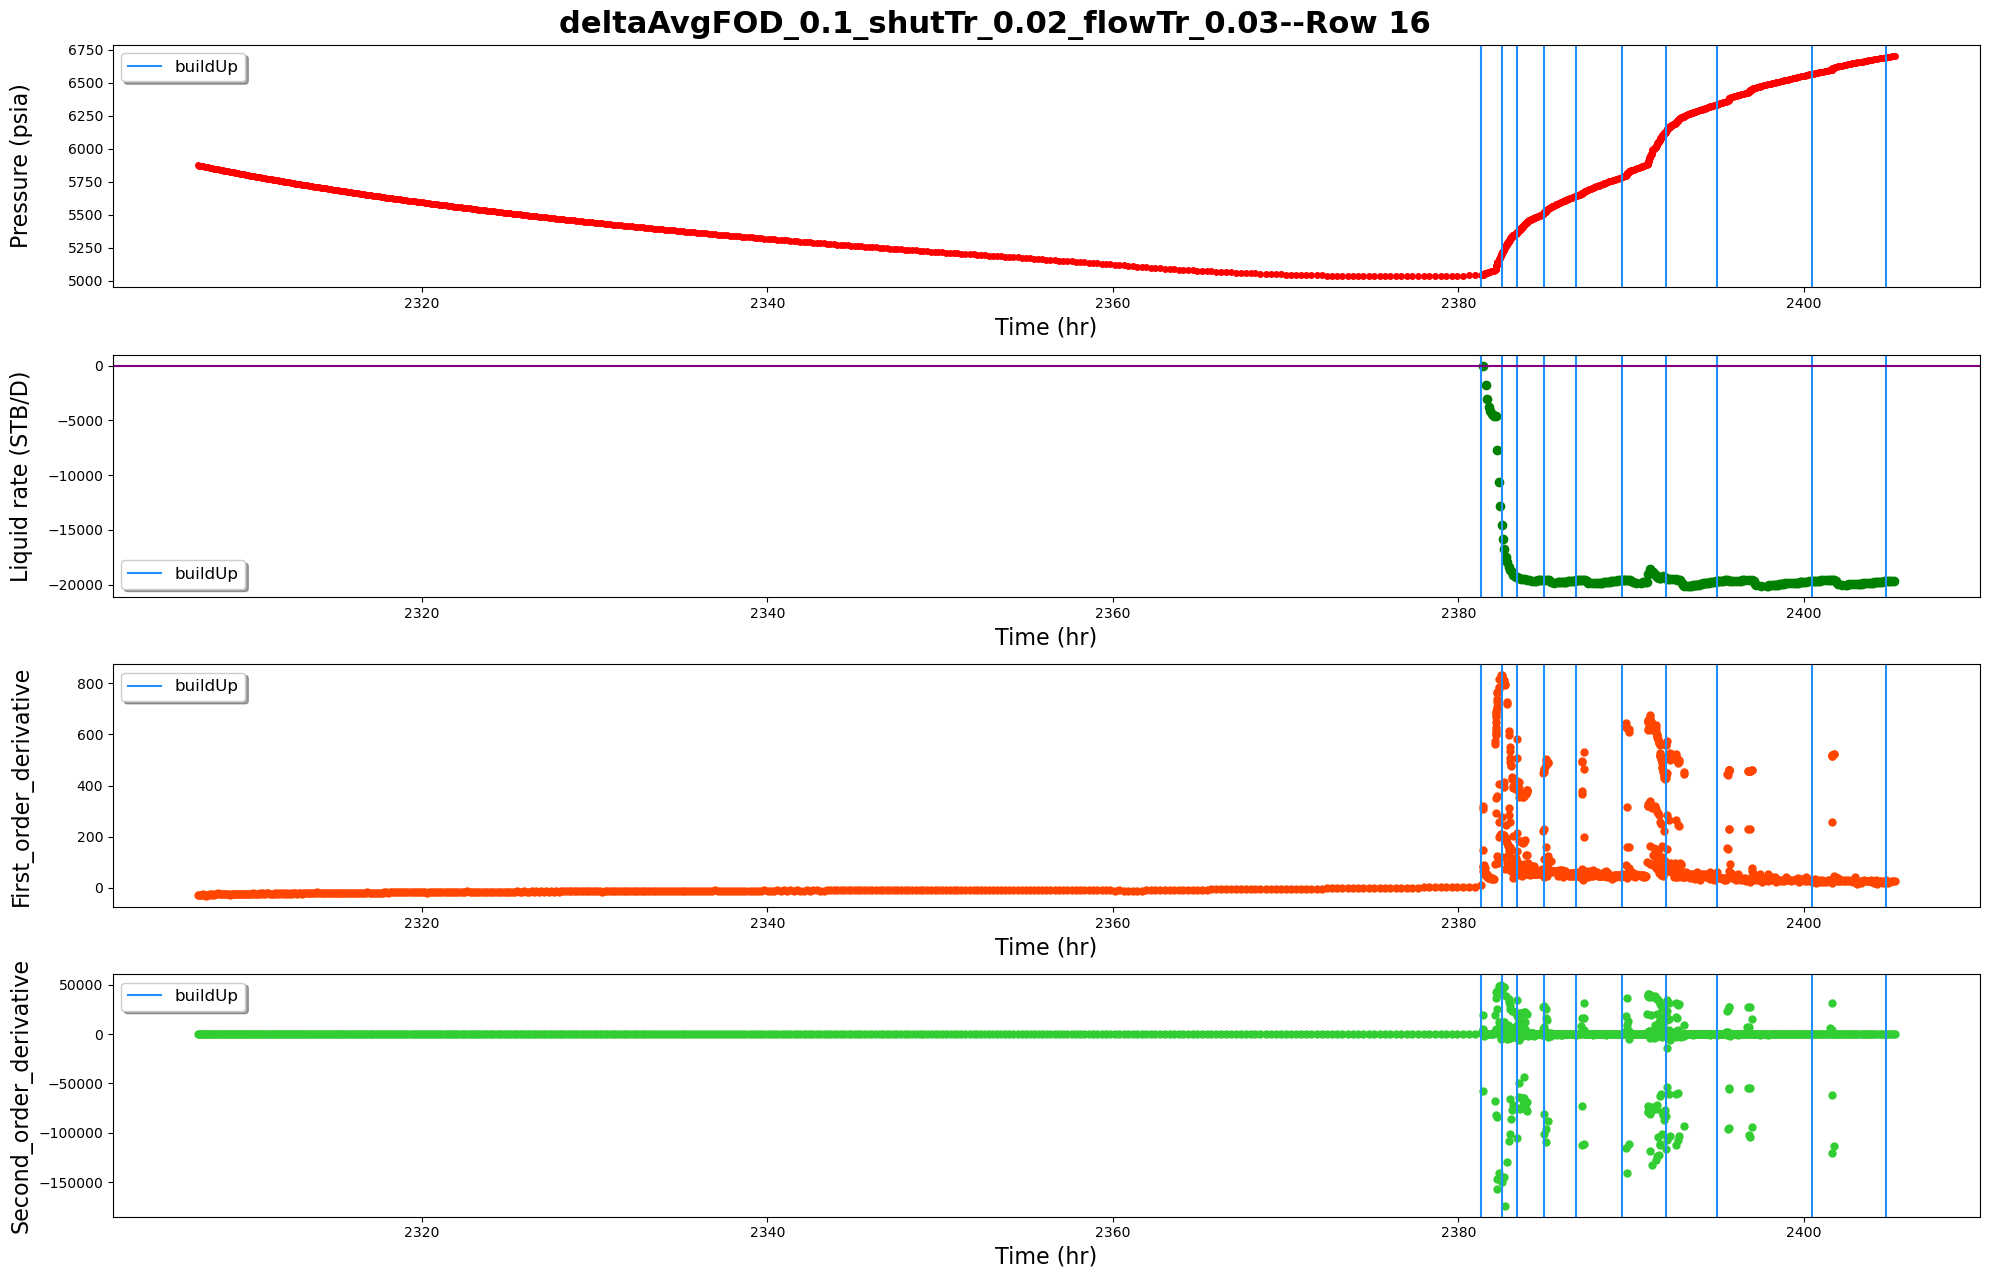

------row 17-----detected points:[19255, 19445, 19642, 19761, 19855, 20013, 20335]


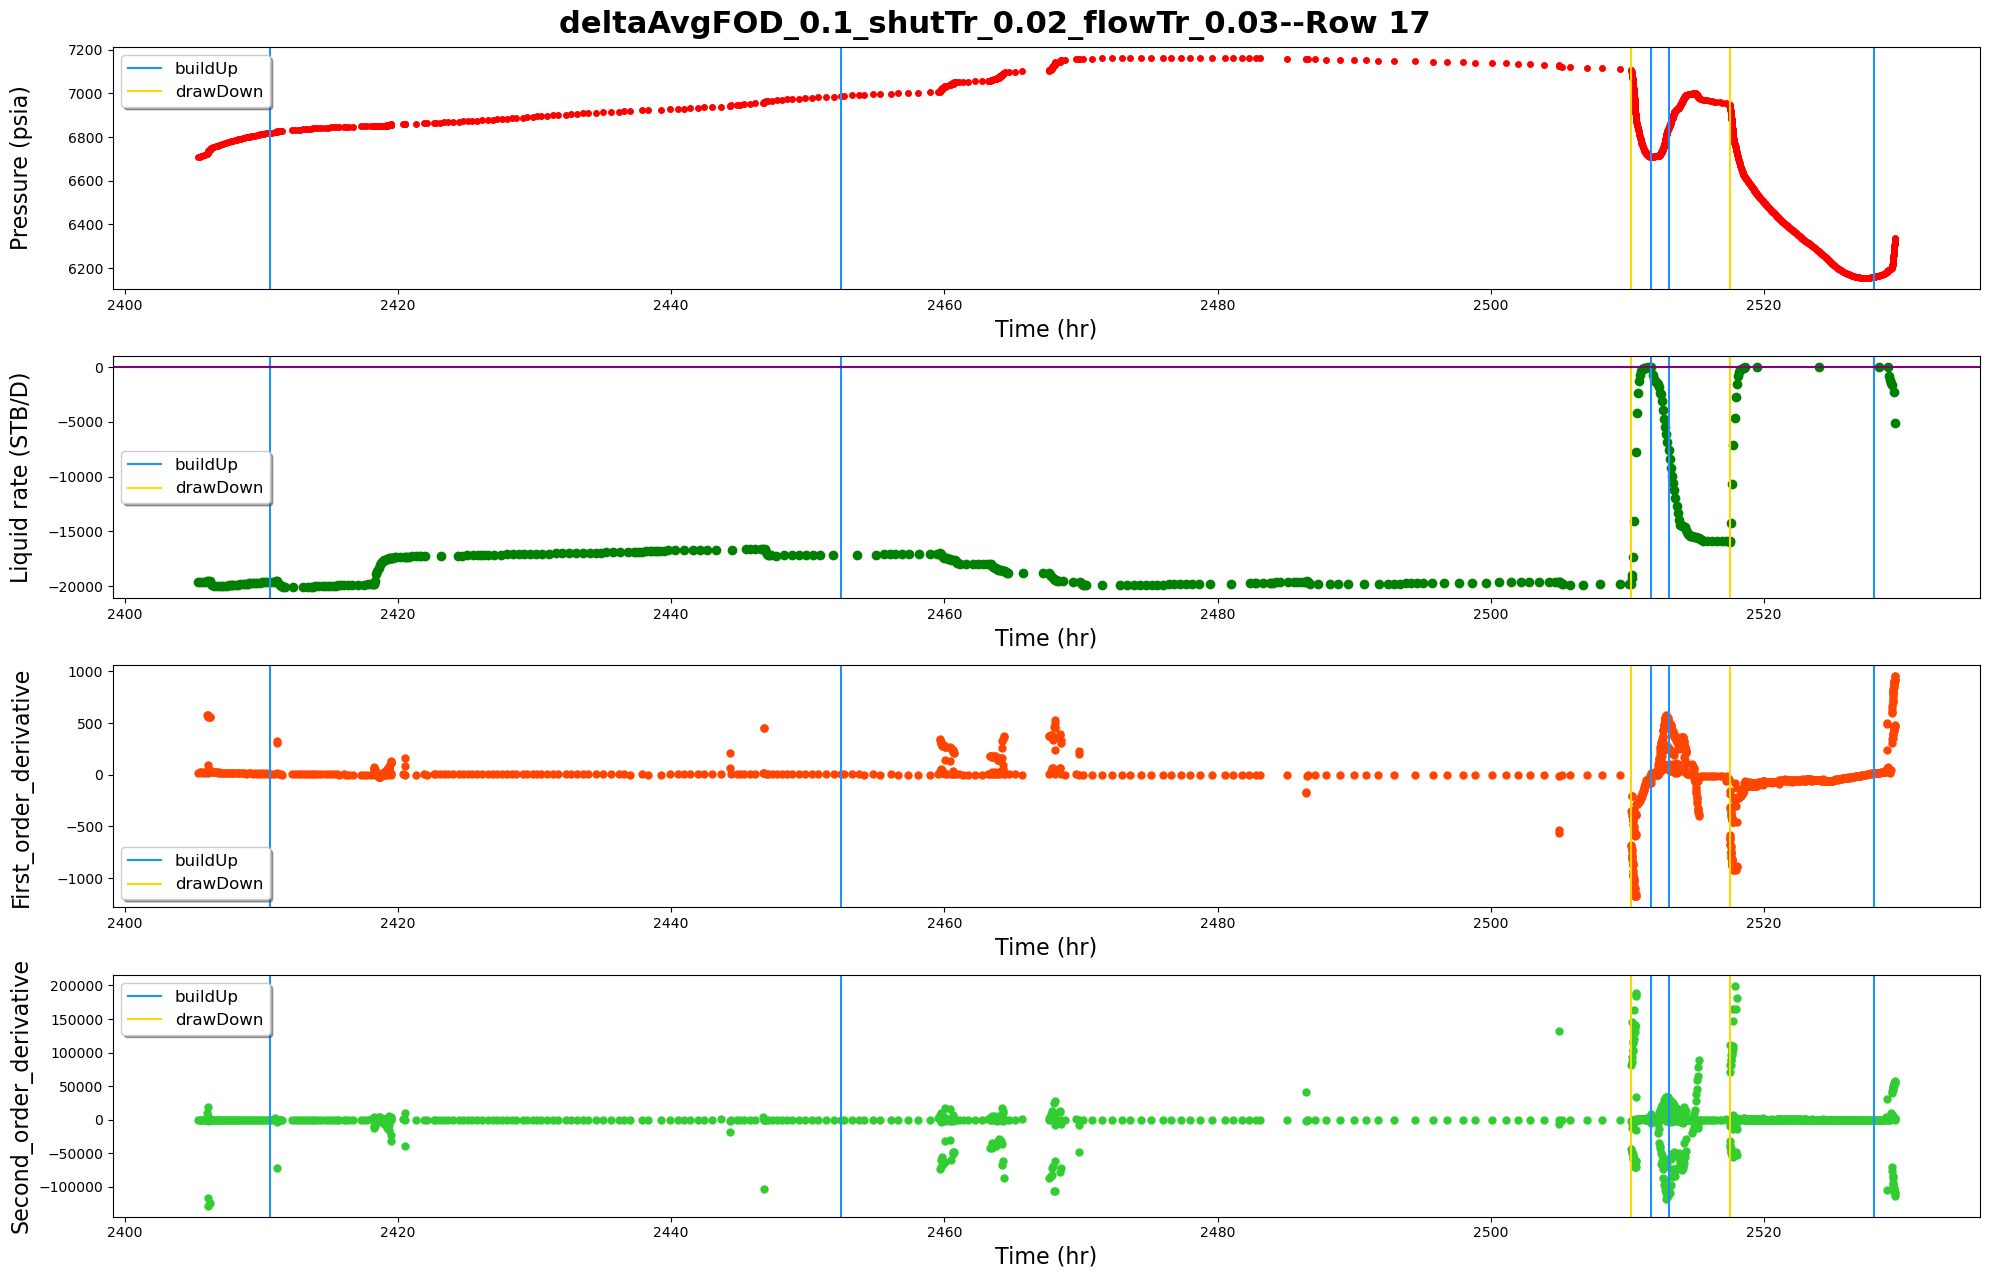

------row 18-----detected points:[20417, 20503, 20622, 20700, 21026, 21094, 21134, 21214, 21361, 21445]


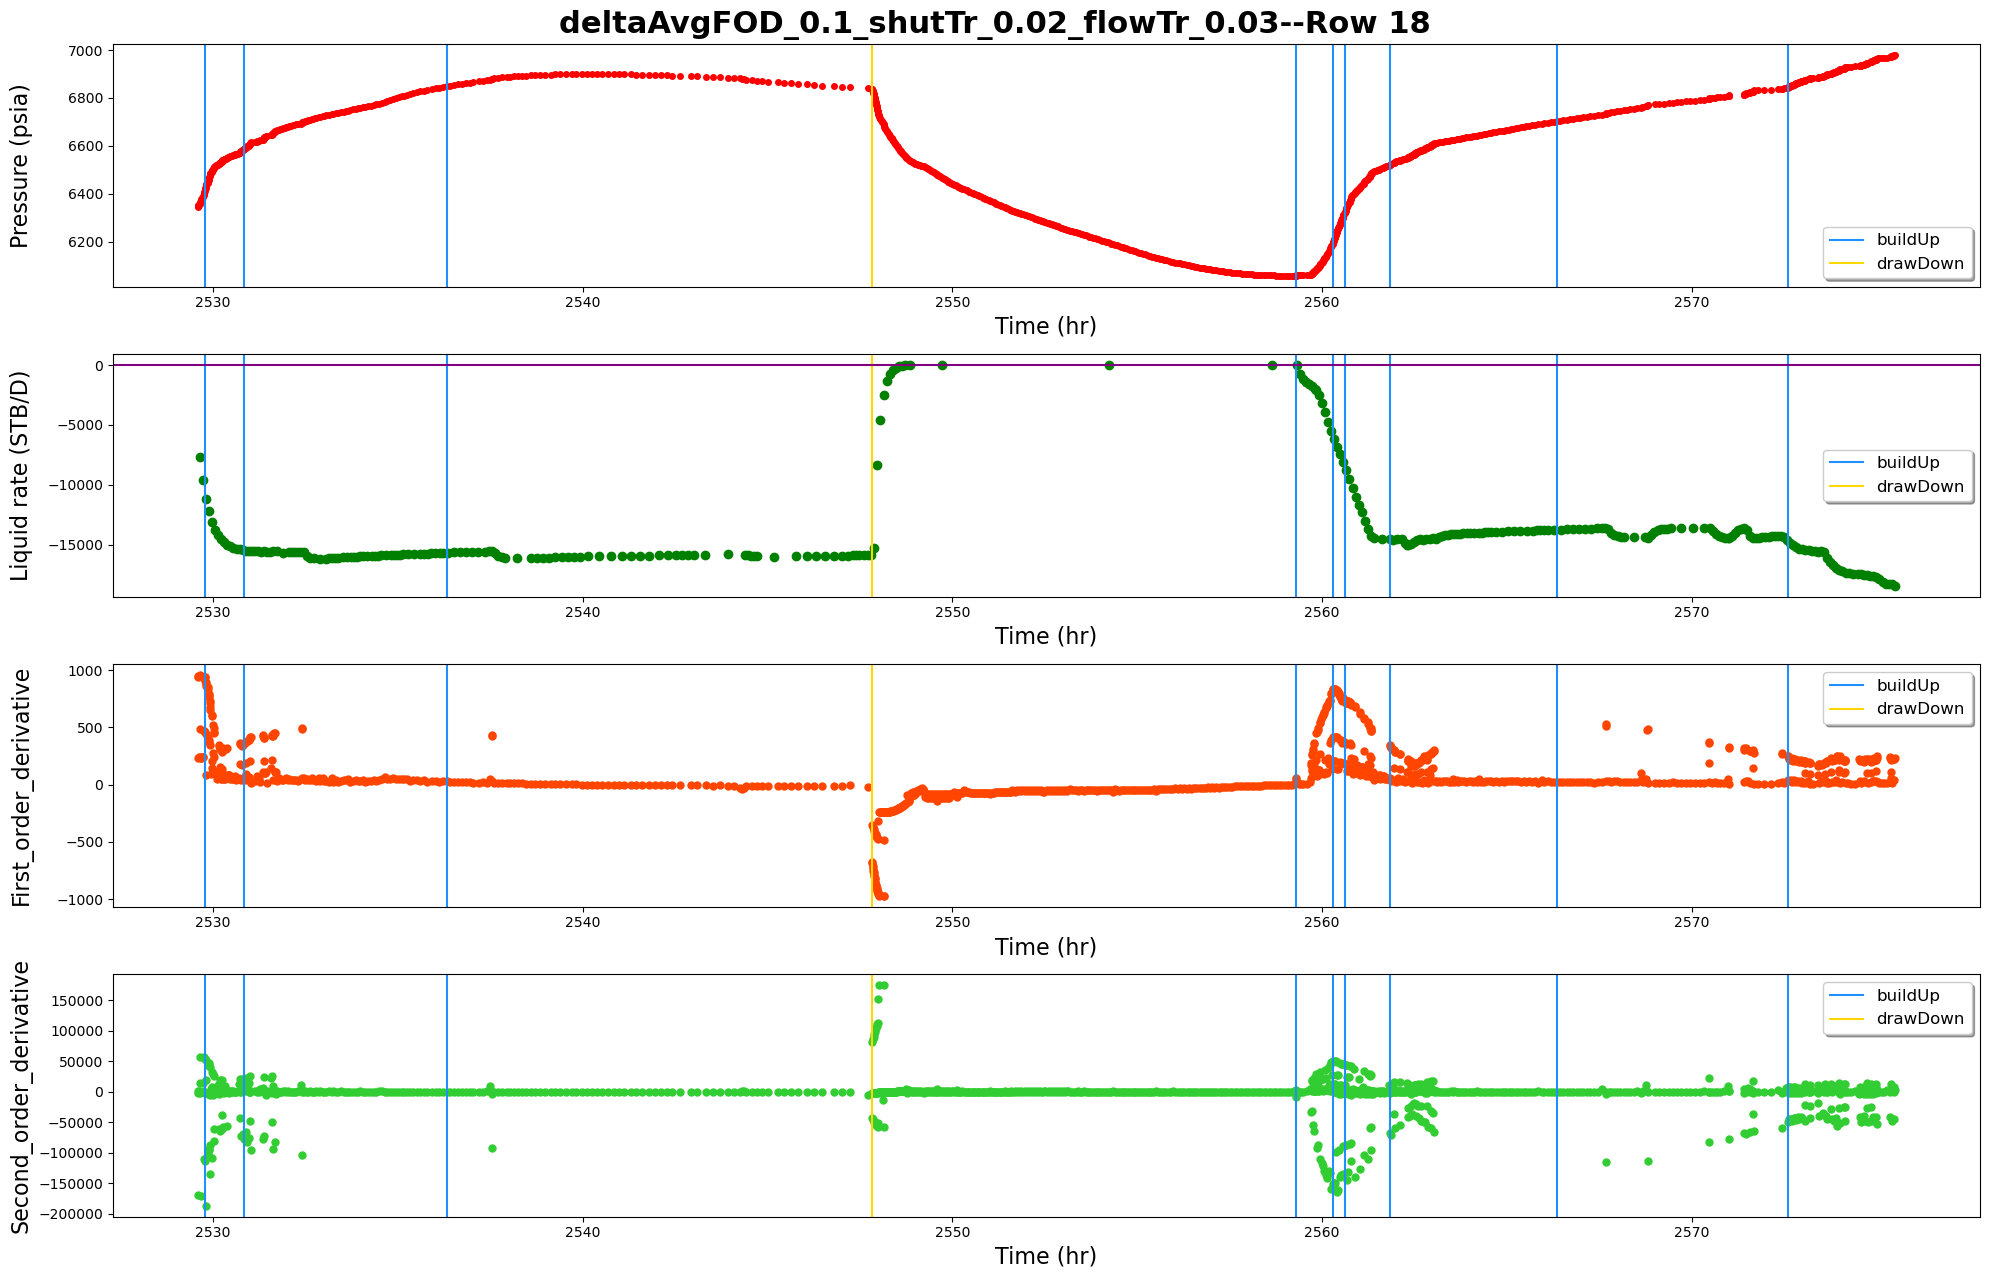

------row 19-----detected points:[21600, 21731, 21877, 21974, 22181, 22296, 22408, 22520, 22611, 22709]


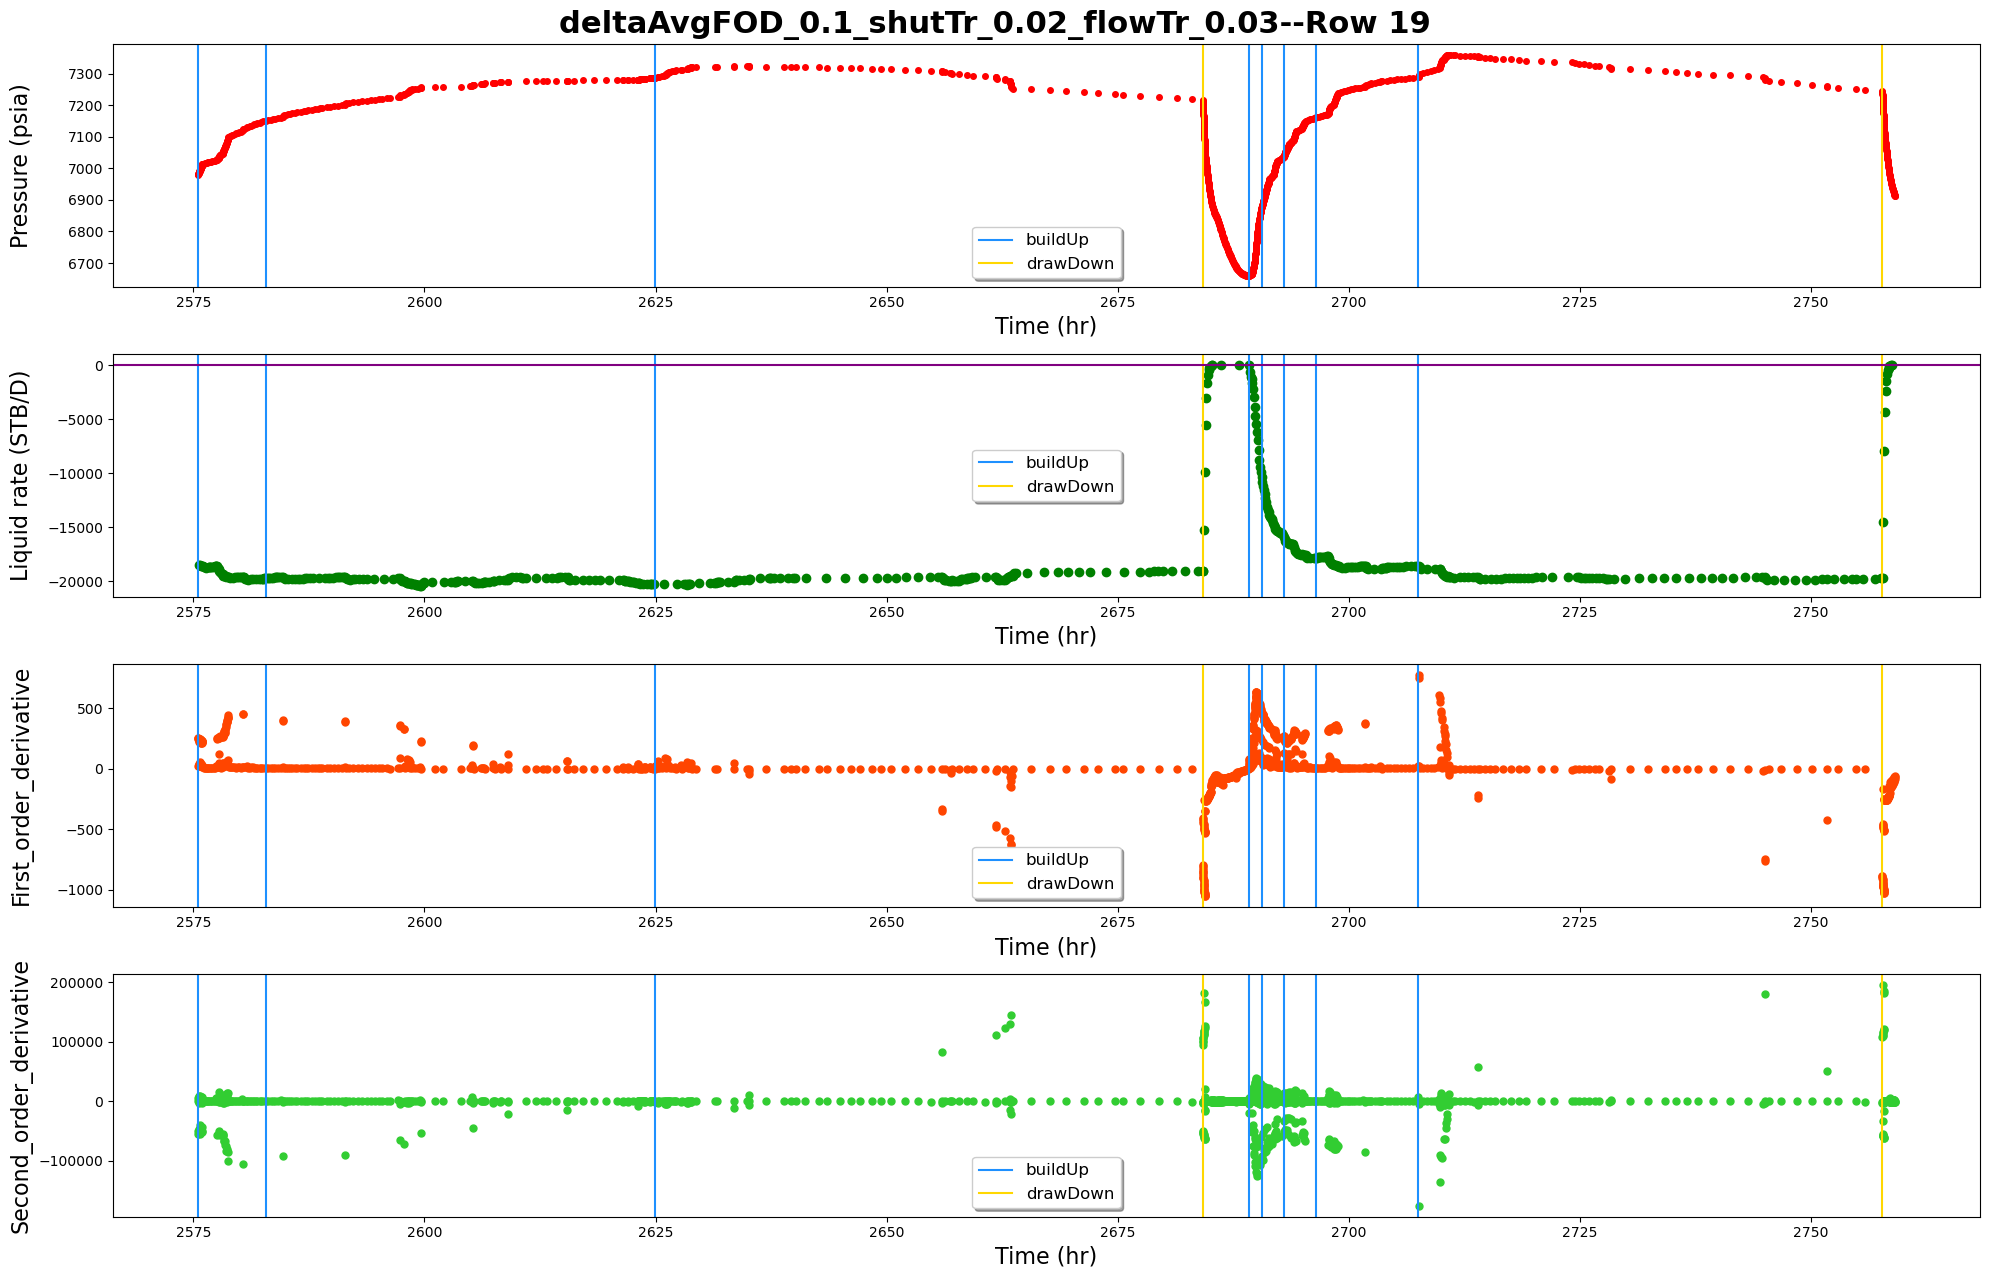

------row 20-----detected points:[23219, 23286, 23367, 23456, 23554, 23626, 23791, 23908, 23998]


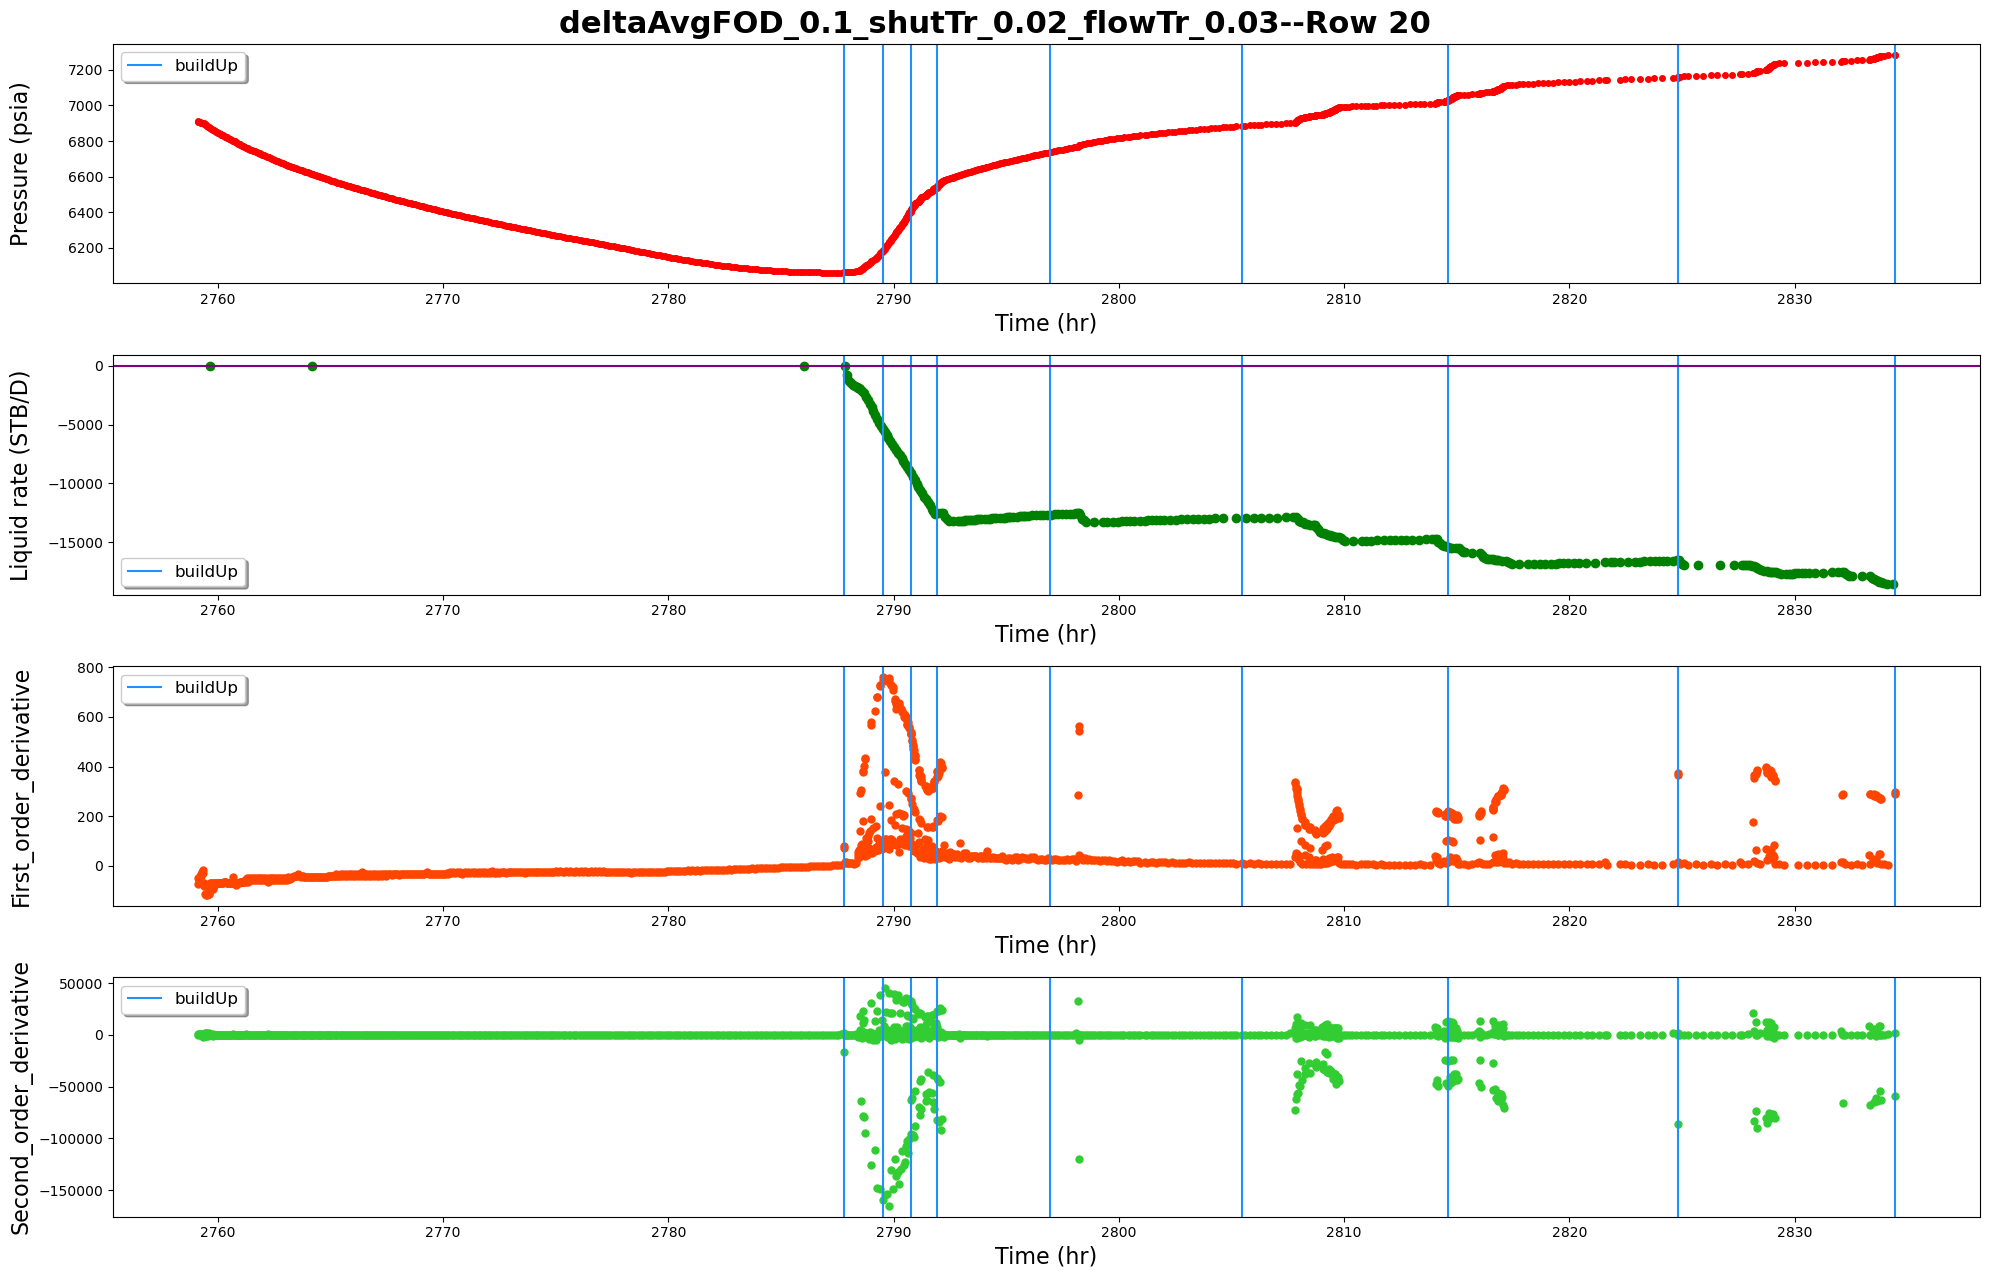

------row 21-----detected points:[24094, 24215, 24675, 24745, 24765, 24865, 25053, 25154]


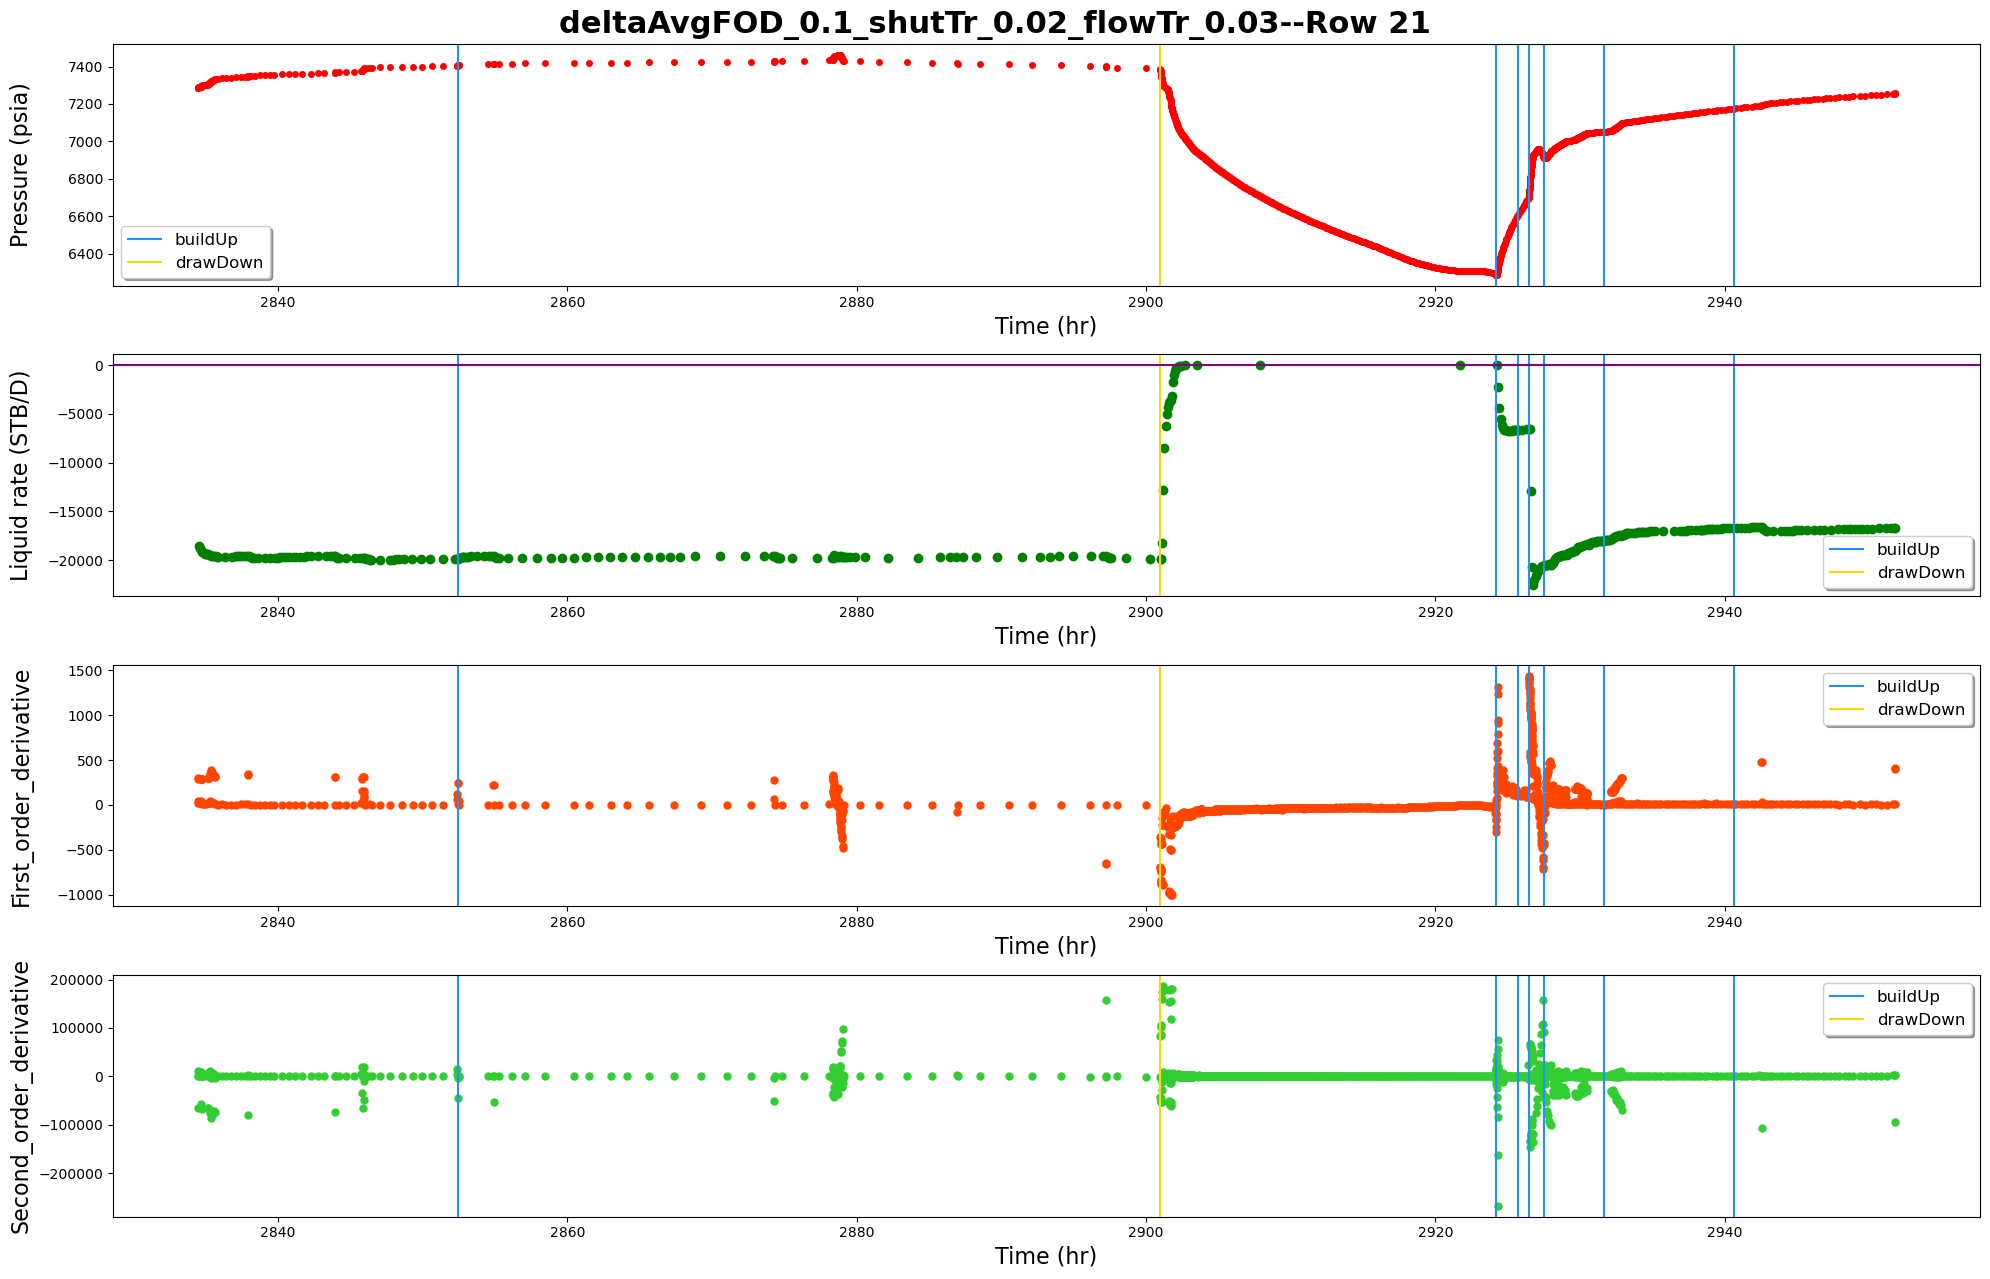

------row 22-----detected points:[25252, 25617, 25750, 25991, 26054, 26125, 26224]


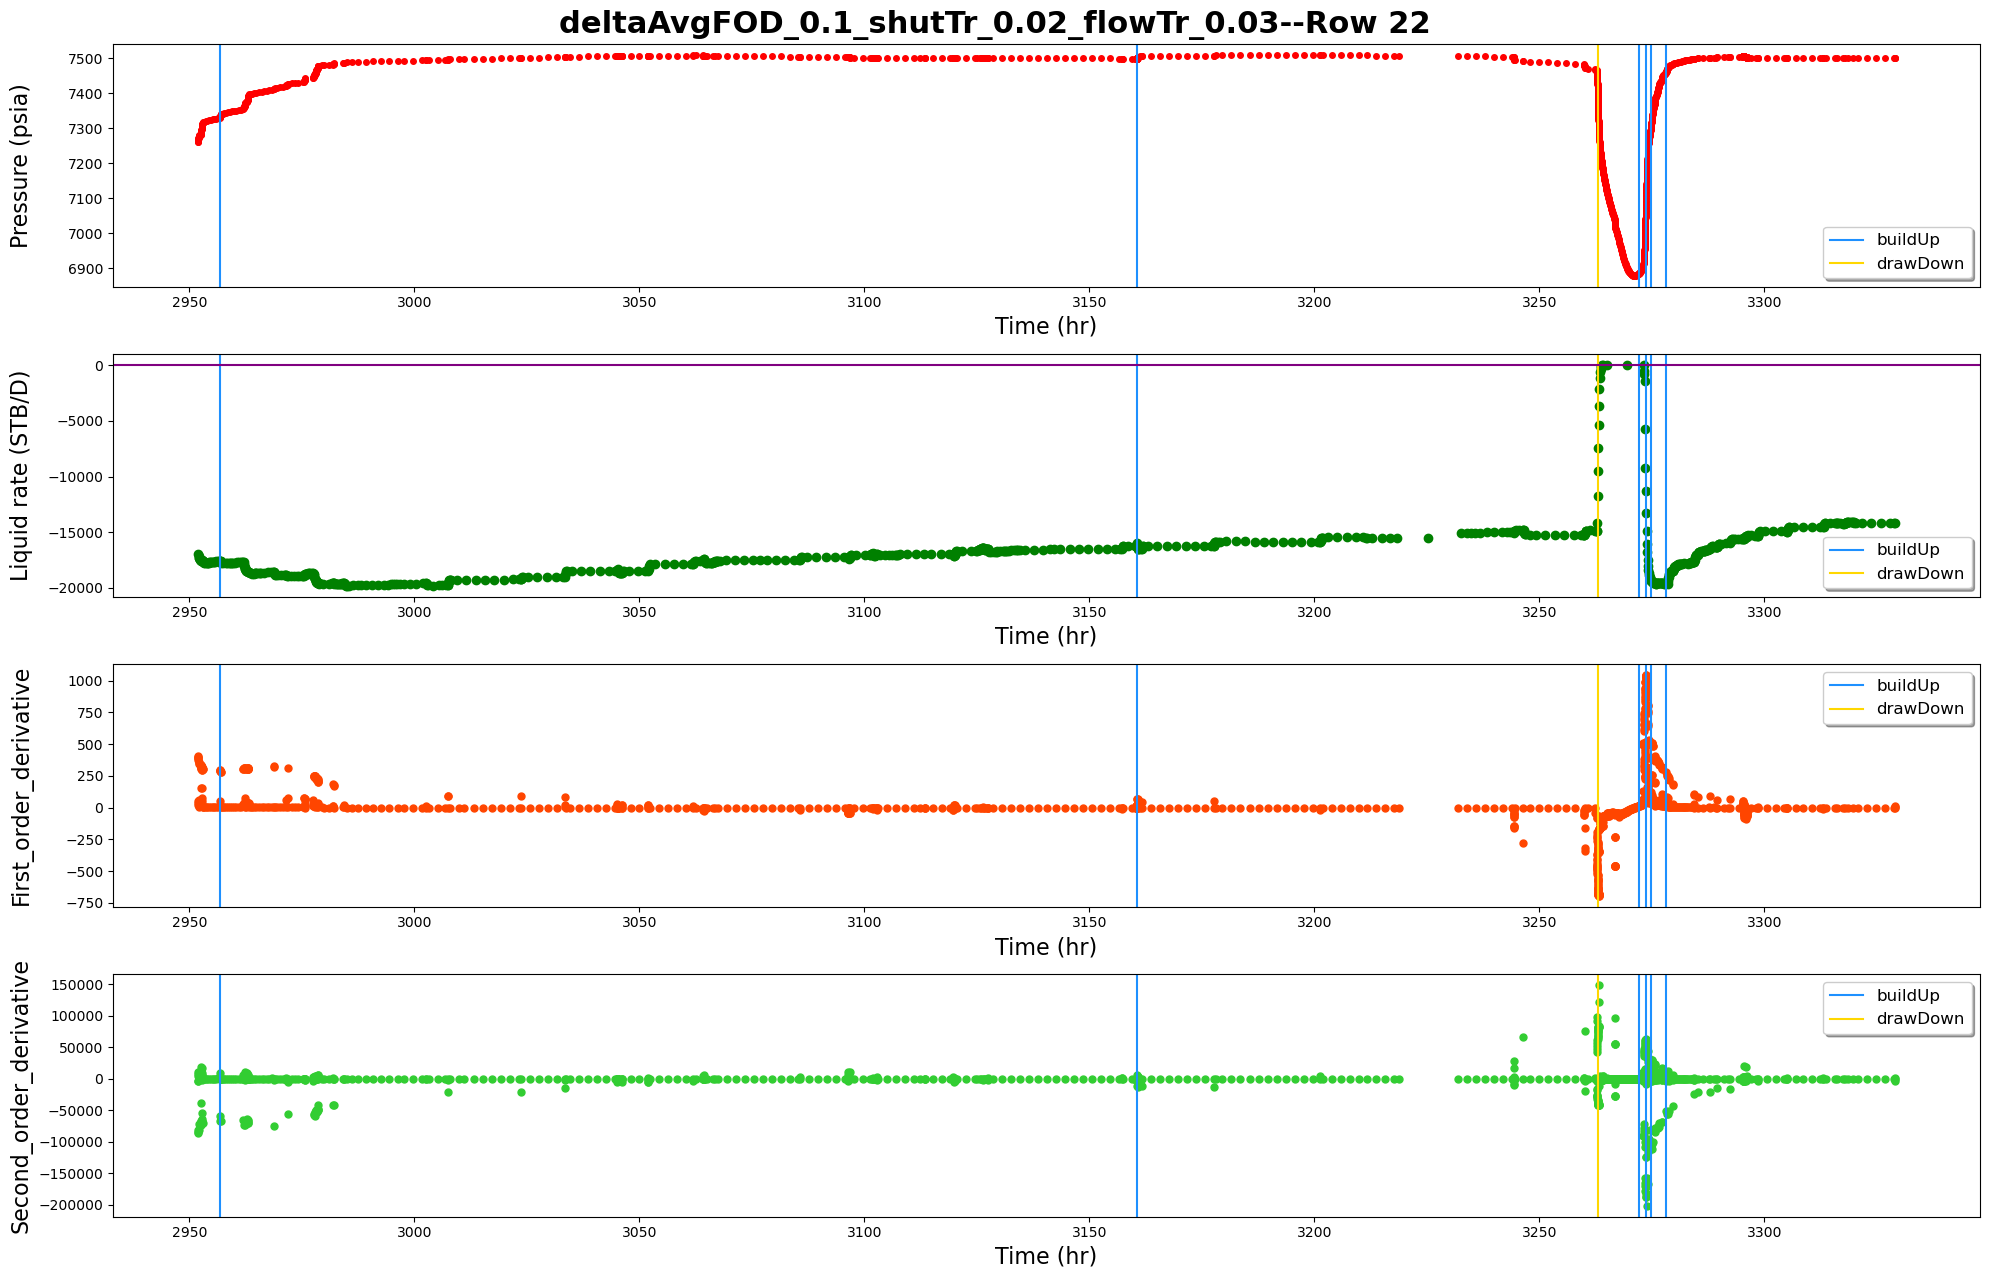

------row 23-----detected points:[26675, 26755, 26811, 26859, 27025, 27315, 27416, 27463, 27534]


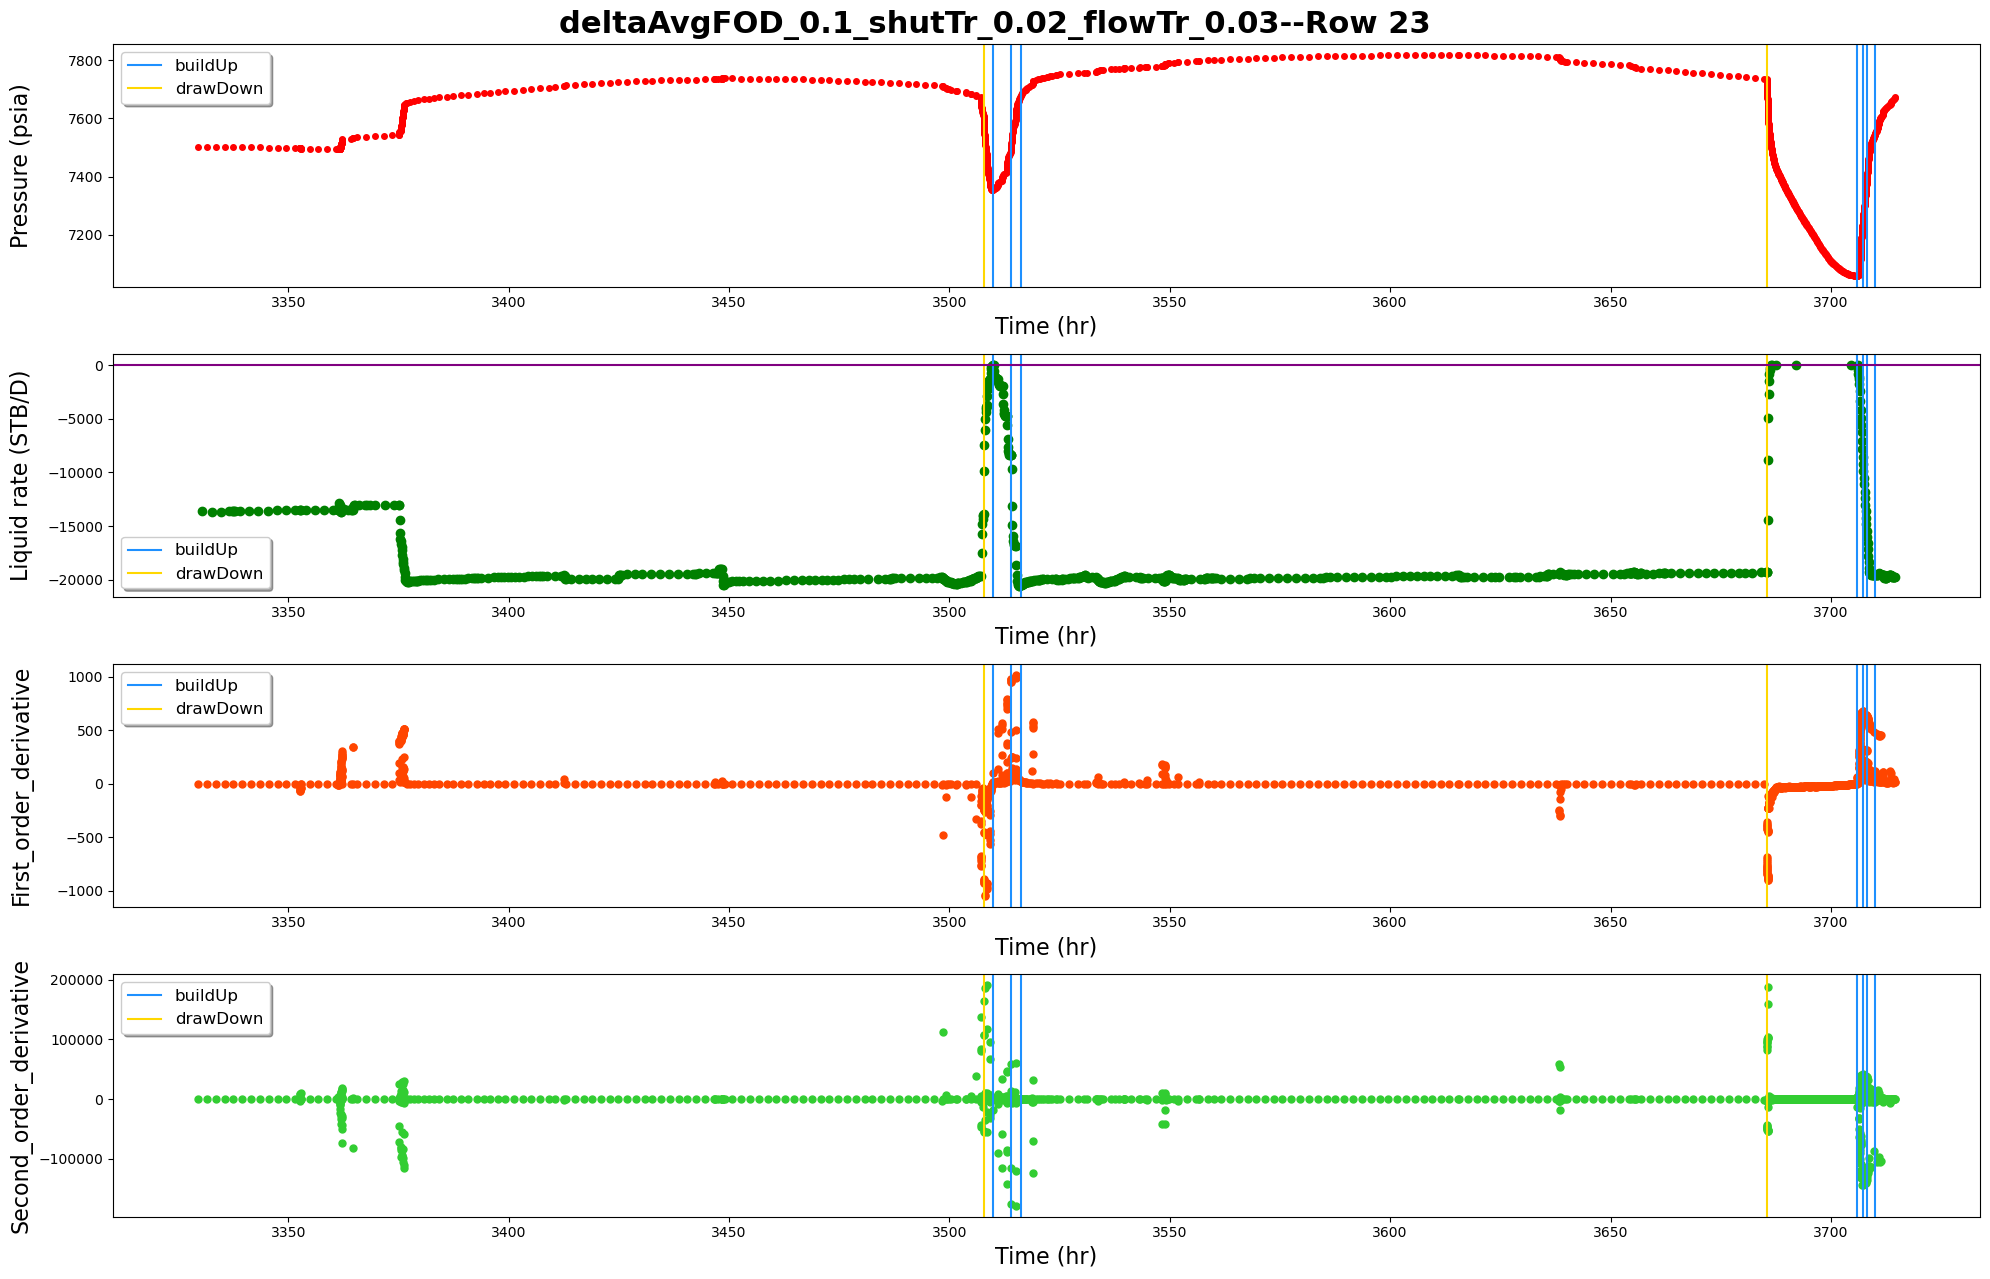

------row 24-----detected points:[27678, 27824, 27962, 28073, 28141, 28219, 28290, 28488, 28570, 28650, 28782]


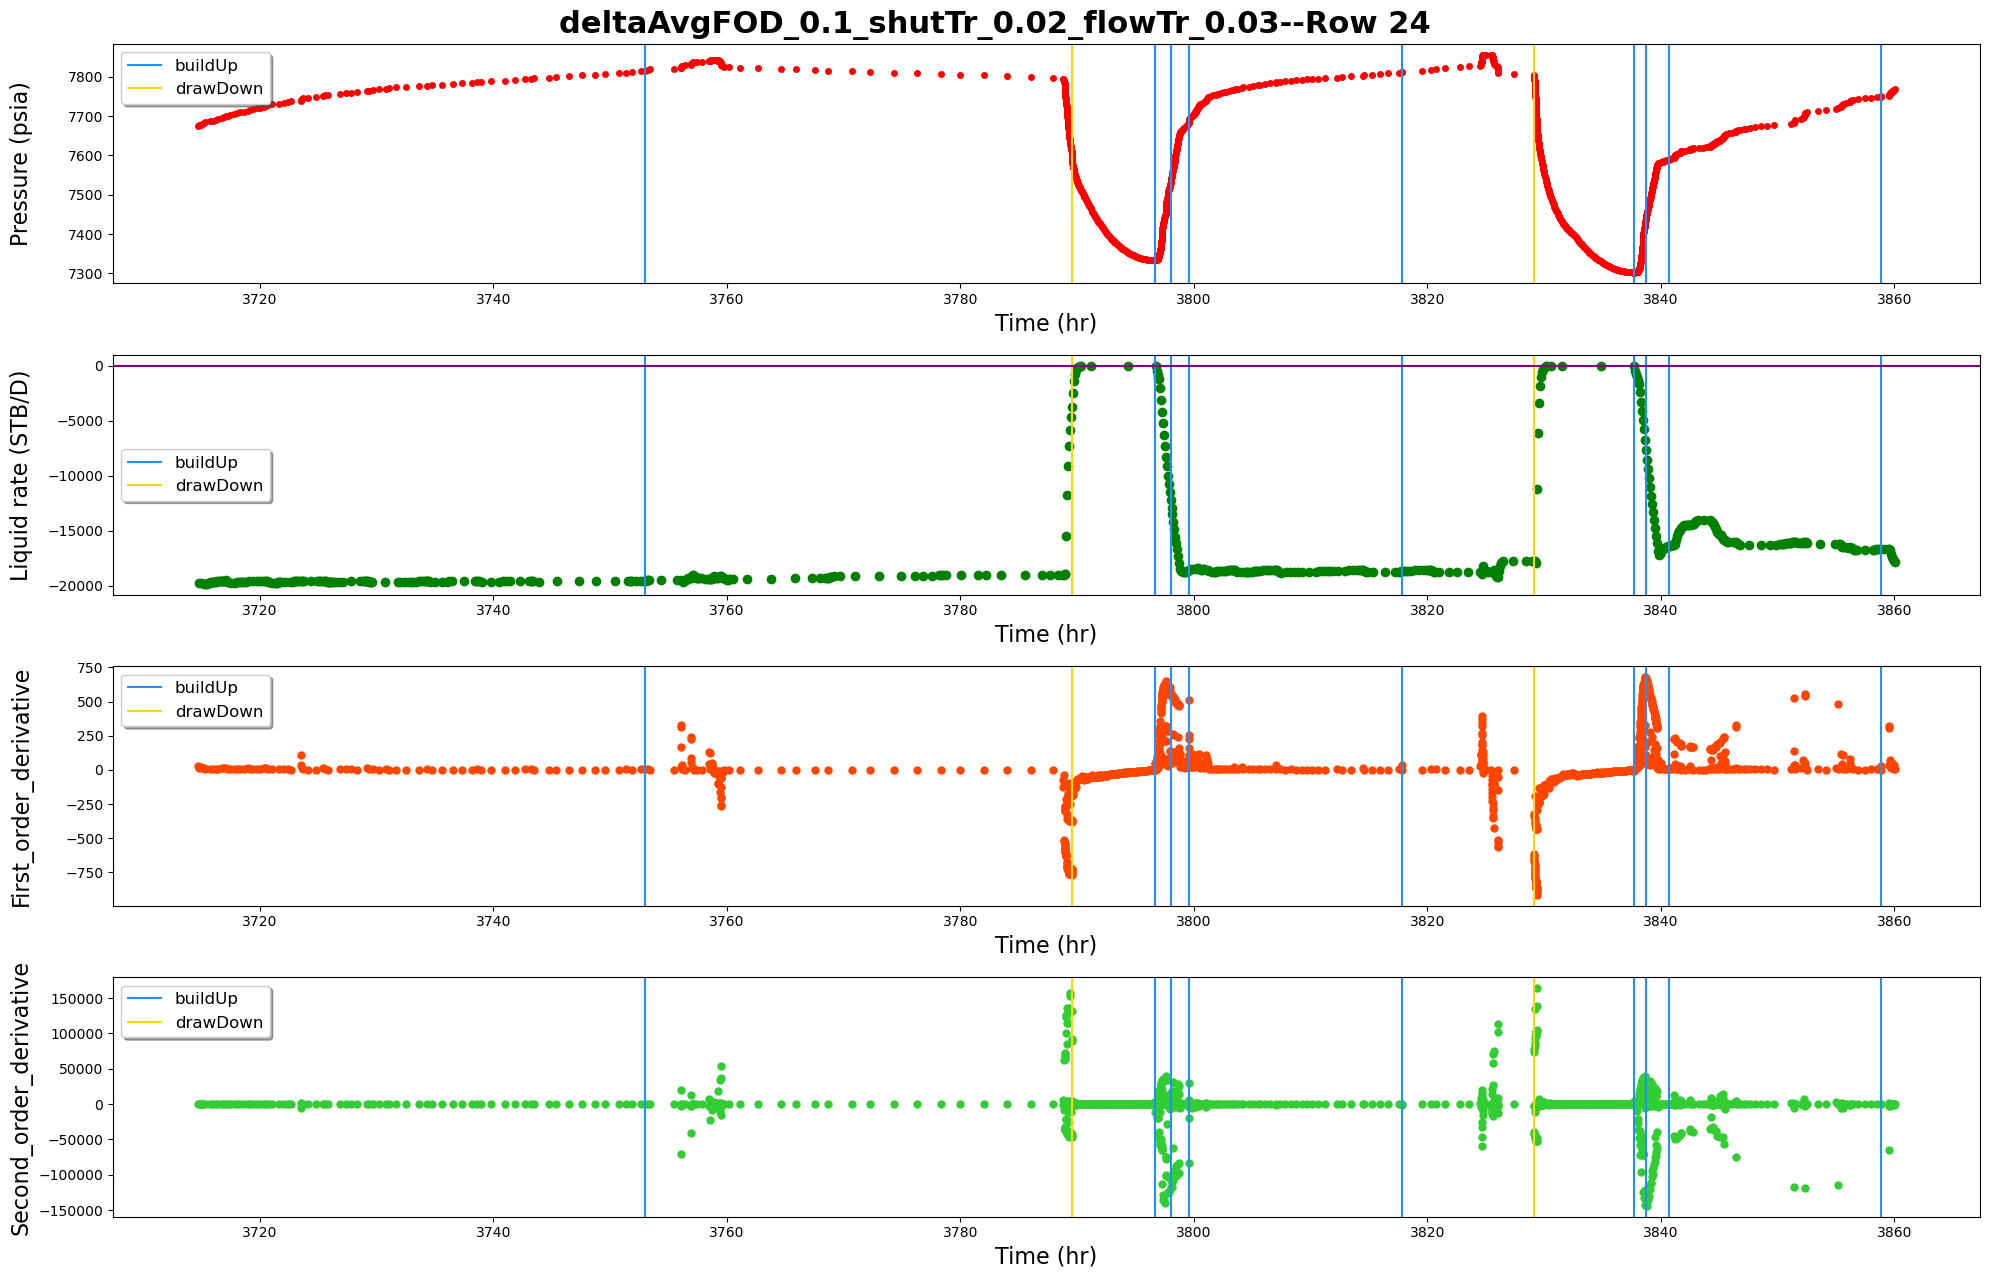

------row 25-----detected points:[28840, 29105, 29181, 29270, 29356, 29466, 29773]


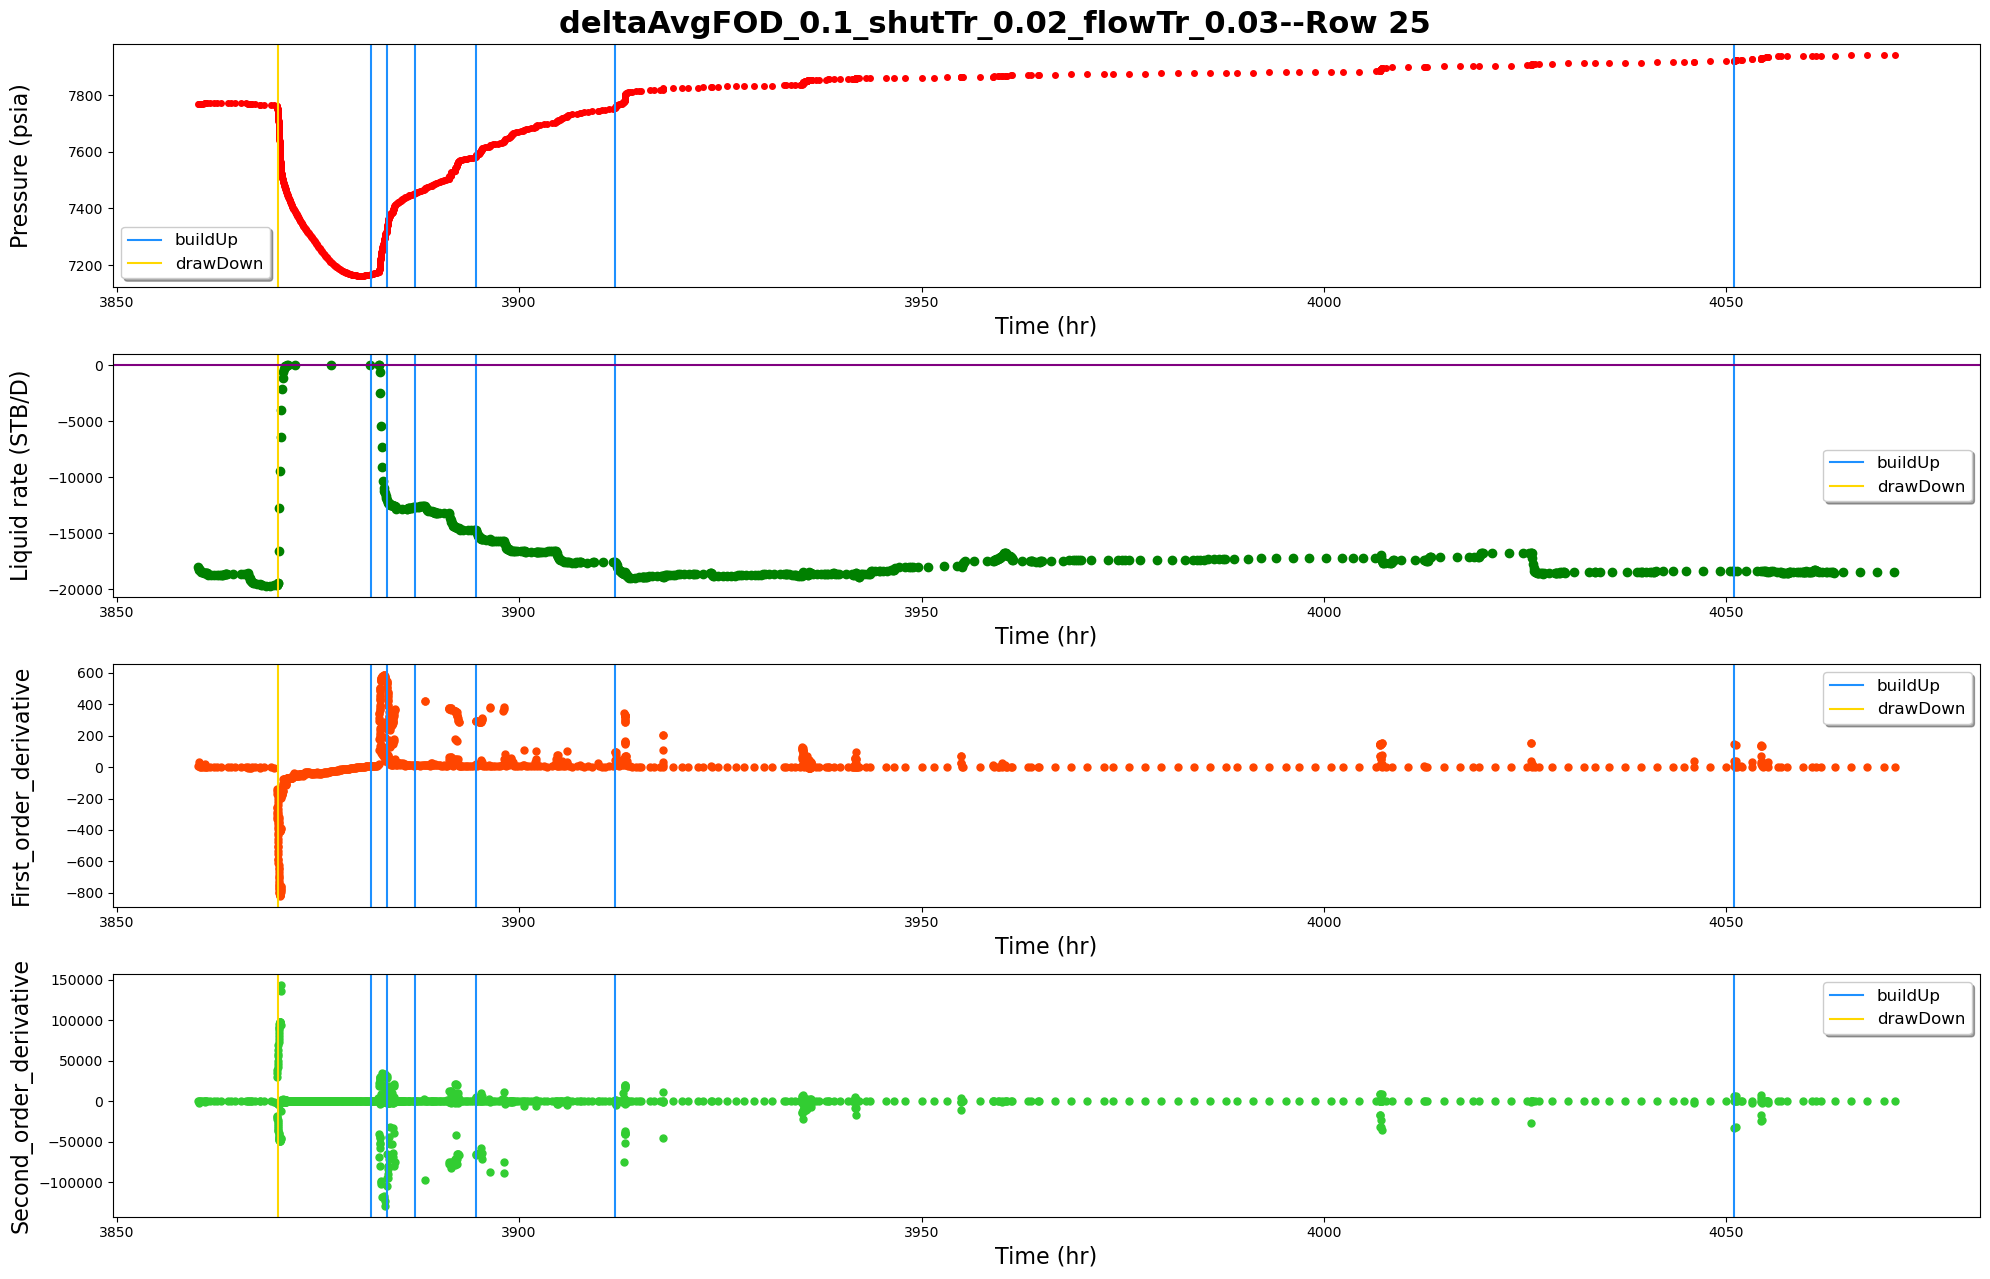

In [8]:
points_type="allPoints"
# points_type="majorTransients"
detect_points_dict=transients.allPointsStored

buildup=detect_points_dict["buildUp"]
drawdown=detect_points_dict["drawDown"]
txt=f"buildup:{len(buildup)}, drawdown:{len(drawdown)}"
pprint(txt)
plot_whole=True
plot_details=True
plot_statistics=False
save=True
folder_name=f"{method}/{points_type}/pointHalfWin_{point_halfWindow}_timeStep_{time_step}"
%run plot_N_save.ipynb